Degut a que hi ha persones amb més d'un ID únic crearem un nou ID únic a partir de la suma dels dos IDs.

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Persones.csv',encoding='utf-8',sep=';')
df.head()

Nom        Cognoms                                    ID Salutacio  \
0  GEORGINA    ZAMORA AMAT  c97185e7-9f0f-30e4-b1ff-5bb4a082147f       NaN   
1      LAIA    ZAMORA AMAT  c42ed7e9-f1ad-6ab2-80b0-5bb4a0b8c0f6       NaN   
2     CARME    VIDAL LOPEZ  c1285915-0512-7d67-ca24-5bb4a020d92c       NaN   
3   DOMINGO    VIDAL MATEU  c5d7f4c8-55b1-a5bb-ee4e-5bb4a06e8f9b       NaN   
4    ELVIRA  VIDAL NAVARRO  cb11488f-77db-7f36-3a00-5bb4a0cc9388       NaN   

  Càrrec Departament Organització Adreça de correu electrònic  \
0    NaN         NaN          NaN                         NaN   
1    NaN         NaN          NaN                         NaN   
2    NaN         NaN          NaN                         NaN   
3    NaN         NaN          NaN        vidalmateu@gmail.com   
4    NaN         NaN          NaN                         NaN   

  Correus electrònics no principals            Mòbil  ... Tipus accions 2  \
0                               NaN              NaN  ...             NaN   
1                               NaN              NaN  ...             NaN   
2                               NaN  34 686 75 68 15  ...             NaN   
3                               NaN              NaN  ...             NaN   
4                               NaN              NaN  ...             NaN   

  Perfil laboral 1 (tipus de feina que busca) Perfil laboral 3.1  \
0                                         NaN                NaN   
1                                         NaN                NaN   
2                                         NaN                NaN   
3                                         NaN                NaN   
4                                         NaN                NaN   

   Perfil laboral 4.1 Perfil laboral 5.1 Marca RCI (prov.) CNO N1 CNO N2  \
0                 NaN                NaN               NaN    NaN    NaN   
1                 NaN                NaN               NaN    NaN    NaN   
2                 NaN                NaN               NaN    NaN    NaN   
3                 NaN                NaN               NaN    NaN    NaN   
4                 NaN                NaN               NaN    NaN    NaN   

  CNO N3 Ubicació (Incorpora)  
0    NaN                  NaN  
1    NaN                  NaN  
2    NaN                  NaN  
3    NaN                  NaN  
4    NaN                  NaN  

[5 rows x 232 columns]

In [3]:
#Creem la columna IDP on hi ha el nomb i cognoms de les persones per tal de cercar duplicats
df["IDP"]=df["Nom"]+" "+df["Cognoms"]
df=df[['IDP',"Número d'identificació",'ID']]
df.head()

IDP Número d'identificació  \
0  GEORGINA ZAMORA AMAT                    NaN   
1      LAIA ZAMORA AMAT                    NaN   
2     CARME VIDAL LOPEZ                    NaN   
3   DOMINGO VIDAL MATEU              38707121F   
4  ELVIRA VIDAL NAVARRO              29200183G   

                                     ID  
0  c97185e7-9f0f-30e4-b1ff-5bb4a082147f  
1  c42ed7e9-f1ad-6ab2-80b0-5bb4a0b8c0f6  
2  c1285915-0512-7d67-ca24-5bb4a020d92c  
3  c5d7f4c8-55b1-a5bb-ee4e-5bb4a06e8f9b  
4  cb11488f-77db-7f36-3a00-5bb4a0cc9388

In [4]:
#creem la columna IDN on hi creem un nou ID a partir de la suma dels diferents ID presents persones duplicades
df['IDN'] = df.groupby('IDP')['ID'].transform('sum')
df.head()

IDP Número d'identificació  \
0  GEORGINA ZAMORA AMAT                    NaN   
1      LAIA ZAMORA AMAT                    NaN   
2     CARME VIDAL LOPEZ                    NaN   
3   DOMINGO VIDAL MATEU              38707121F   
4  ELVIRA VIDAL NAVARRO              29200183G   

                                     ID                                   IDN  
0  c97185e7-9f0f-30e4-b1ff-5bb4a082147f  c97185e7-9f0f-30e4-b1ff-5bb4a082147f  
1  c42ed7e9-f1ad-6ab2-80b0-5bb4a0b8c0f6  c42ed7e9-f1ad-6ab2-80b0-5bb4a0b8c0f6  
2  c1285915-0512-7d67-ca24-5bb4a020d92c  c1285915-0512-7d67-ca24-5bb4a020d92c  
3  c5d7f4c8-55b1-a5bb-ee4e-5bb4a06e8f9b  c5d7f4c8-55b1-a5bb-ee4e-5bb4a06e8f9b  
4  cb11488f-77db-7f36-3a00-5bb4a0cc9388  cb11488f-77db-7f36-3a00-5bb4a0cc9388

In [5]:
#seleccionem les columnes que ens interessen
df=df[['IDP',"Número d'identificació",'ID','IDN']]

In [6]:
#df a csv
df.to_csv('Dict.csv',index=False,encoding='utf-8')

Aquesta base de dades recull les dades principals de qualsevol de les persones usuàries o contactes de l’entitat.

Ens hem trobat en què hi ha varies persones amb més d’un ID únic per la qual  cosa crearem un nou ID únic a partir de la suma dels dos IDs. En totes les bases de dades posteriors el primer pas ha estat crear un nou ID a partir del diccionari creat anteriorment. 

In [7]:
import pandas as pd

In [8]:
df=pd.read_csv('Persones.csv',encoding='utf-8',sep=';')
df_dic=pd.read_csv('Dict.csv',encoding='utf-8',sep=',')

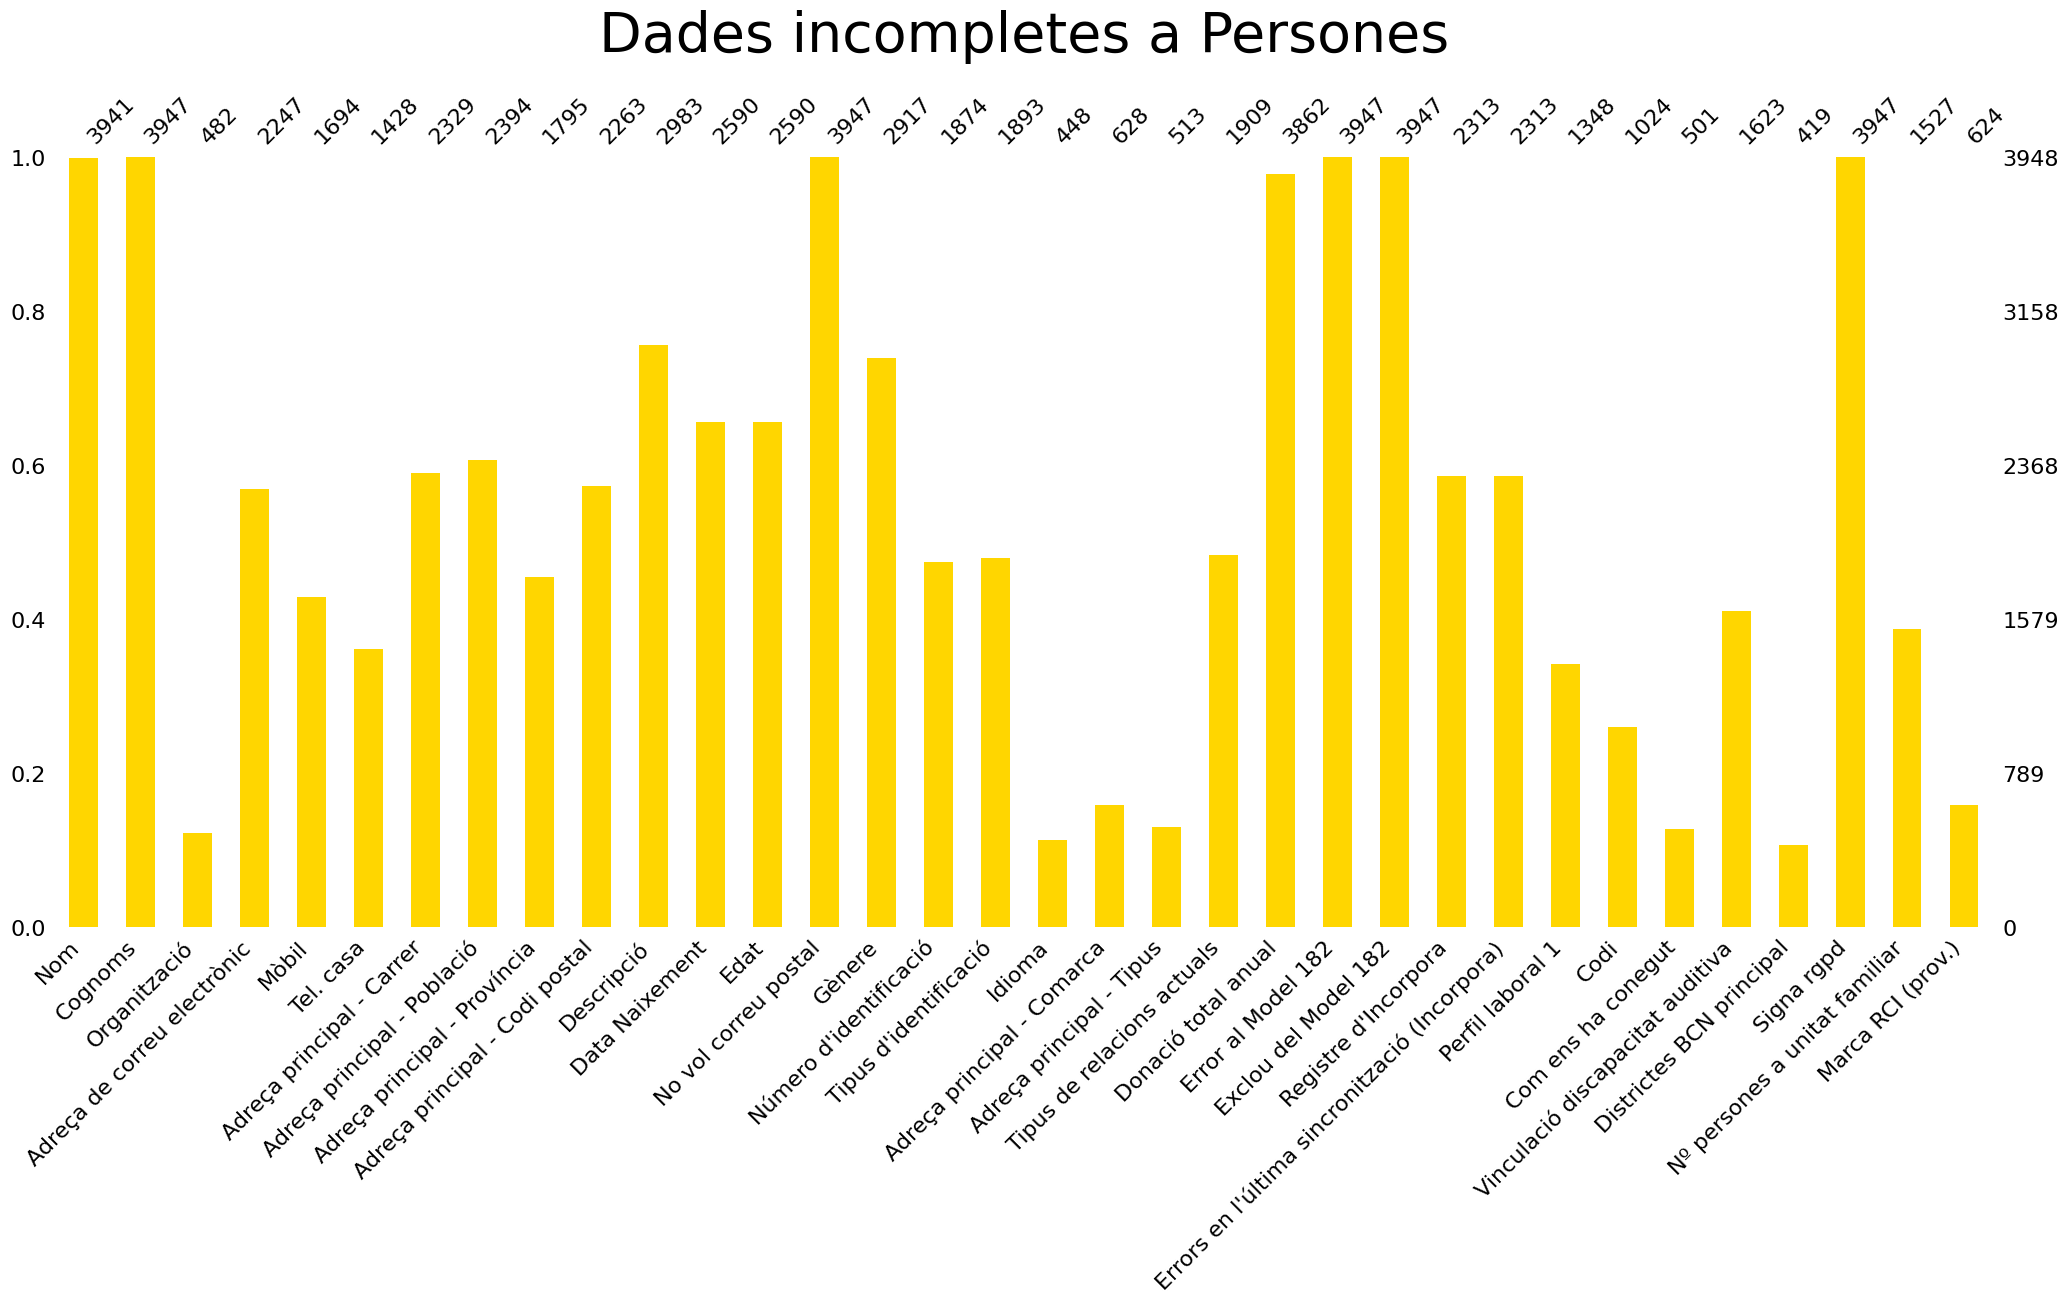

In [9]:
import missingno as msno
import matplotlib.pyplot as plt

# Obtén la lista de columnas que cumplen la condición de tener un máximo del 90% de valores nulos
selected_columns = []
for column in df.columns:
    null_percentage = df[column].isnull().mean()
    if null_percentage <= 0.9:
        selected_columns.append(column)

# Filtra el DataFrame original solo para las columnas seleccionadas
filtered_df = df[selected_columns]

# Elimina las columnas específicas que existan en el DataFrame
columns_to_exclude = ['ID', 'Usuari Assignat', 'Data de Creació', 'Última Modificació', 'Creat Per', 'Modificat Per',
                      'Eliminat', 'Gestió ACAPPS', 'Modificat Per Nom', 'modified_by_name_owner','Assignat a', 'Assignat a (ID)',
                      'modified_by_name_mod', 'Creat Per.1', 'created_by_name_owner', 'created_by_name_mod',
                      'assigned_user_name_owner', 'assigned_user_name_mod', 'No trucar', 'Data de Creació',
                      'Data de Modificació', 'Modificat per', 'Creat per', 'Eliminat', 'Compta desactivada',
                      'Tipus de portal d\'usuari']

filtered_df = filtered_df.drop(columns=[col for col in columns_to_exclude if col in filtered_df])

# Visualiza el número de valores nulos como un gráfico de barras
plt.title('Dades incompletes a Persones', fontsize=40, pad=30)
msno.bar(filtered_df, color='#ffD600')
plt.show()

In [10]:
#Seleccionem les columnes que ens interessen 
df=df[['ID','Adreça principal - Codi postal','Adreça principal - Població','Data Naixement','Gènere',"Tipus d'identificació",'Tipus de relacions actuals','Vinculació discapacitat auditiva','Nº persones a unitat familiar']]

In [11]:
#a partir del diccionari creat anteriorment, cambiem la ID per tal d'evitar duplicats
df['ID'] = df['ID'].map(df_dic.set_index('ID')['IDN'])
df.head()

ID Adreça principal - Codi postal  \
0  c97185e7-9f0f-30e4-b1ff-5bb4a082147f                            NaN   
1  c42ed7e9-f1ad-6ab2-80b0-5bb4a0b8c0f6                            NaN   
2  c1285915-0512-7d67-ca24-5bb4a020d92c                            NaN   
3  c5d7f4c8-55b1-a5bb-ee4e-5bb4a06e8f9b                          08329   
4  cb11488f-77db-7f36-3a00-5bb4a0cc9388                            NaN   

  Adreça principal - Població Data Naixement   Gènere Tipus d'identificació  \
0                         NaN     17/03/1983   Femení                   NaN   
1                         NaN     16/07/1987   Femení                   NaN   
2                         NaN     21/04/1986   Femení                   NaN   
3                        TEIA     20/10/1944  Masculí                   NIF   
4                         NaN     18/03/2013   Femení                   NIF   

                          Tipus de relacions actuals  \
0                 Persones Sòcies Familiars (Entorn)   
1                 Persones Sòcies Familiars (Entorn)   
2  Persones Sòcies Familiars (Nucli),Persones Vol...   
3                                                NaN   
4                 Persones Sòcies Familiars (Entorn)   

  Vinculació discapacitat auditiva  Nº persones a unitat familiar  
0                              NaN                            NaN  
1                              NaN                            NaN  
2                              NaN                            NaN  
3                              NaN                            1.0  
4                              NaN                            5.0

Ens trobem que hi ha forces entrades duplicades i valors faltants en diferents columnes però amb el mateix ID per la qual cosa procedima unir les files amb el mateix ID i omplir els valros faltants

In [12]:
#Unim les files duplicades per ID i omplir els valors faltants
df = df.groupby('ID').apply(lambda x: x.fillna(method='ffill')).reset_index(drop=True)
#eliminem duplicats
df.drop_duplicates(subset='ID',keep='first',inplace=True)
df.head()


ID Adreça principal - Codi postal  \
0  10031d51-3654-6bdd-ad97-5f69f0cdf888                          08172   
1  100bd161-388c-f2d6-36b5-6054936fb1e4                            NaN   
2  100cad7c-e055-a06d-8770-5e0dc51435f4                            NaN   
3  101ebe57-34cd-a613-32e2-5bb4a0f4213e                          08020   
4  10282577-d5e4-2335-86d9-5bb49fa12f90                          08072   

  Adreça principal - Població Data Naixement   Gènere Tipus d'identificació  \
0       SANT CUGAT DEL VALLES     03/03/1979   Femení                   NIF   
1                         NaN            NaN      NaN                   NaN   
2                         NaN     12/01/2016      NaN                   NaN   
3                   BARCELONA     07/06/1962  Masculí                   NIF   
4       SANT FRUITOS DE BAGES     10/06/1981  Masculí                   NaN   

  Tipus de relacions actuals Vinculació discapacitat auditiva  \
0           Participant SAES                       Afectat/da   
1                        NaN                              NaN   
2                        NaN                       Afectat/da   
3          Persones Usuàries                              NaN   
4                        NaN                              NaN   

   Nº persones a unitat familiar  
0                            NaN  
1                            NaN  
2                            NaN  
3                            1.0  
4                            4.0

In [13]:
#busquem valors únics a tipus de relacions actuals
df['Tipus de relacions actuals'].unique()

array(['Participant SAES', nan, 'Persones Usuàries',
       'Persona Socia Familiar(Titular)',
       'Persones Sòcies Familiars (Nucli),Participant SAAF',
       'Persones Sòcies Familiars (Entorn)',
       'Persones Sòcies Familiars (Nucli)', 'Participant SAAF',
       'Persones Sòcies Individuals',
       'Persones Usuàries,Persones Sòcies Familiars (Nucli)',
       'Persones Sòcies Individuals,Participant Xarxa de Dones,Participant SASP',
       'Pre-Participants SAAF',
       'Persones Usuàries,Persones Sòcies Individuals,Participant Grups de Suport,Participant SAES',
       'Participant Xarxa de Dones',
       'Persones Usuàries,Persones Sòcies Individuals,Participant SAES,Participant SASP,Persones Voluntàries',
       'Persones Sòcies Individuals,Participant SASP',
       'Persones Usuàries,Participant SAES',
       'Professionals Externs Logopedes',
       'Participant Grups de Suport,Participant Xarxa de Dones,Participant SAES',
       'Pre-Participants SAES,Participant SAES',

<Axes: title={'center': 'Dades incompletes a Persones'}>

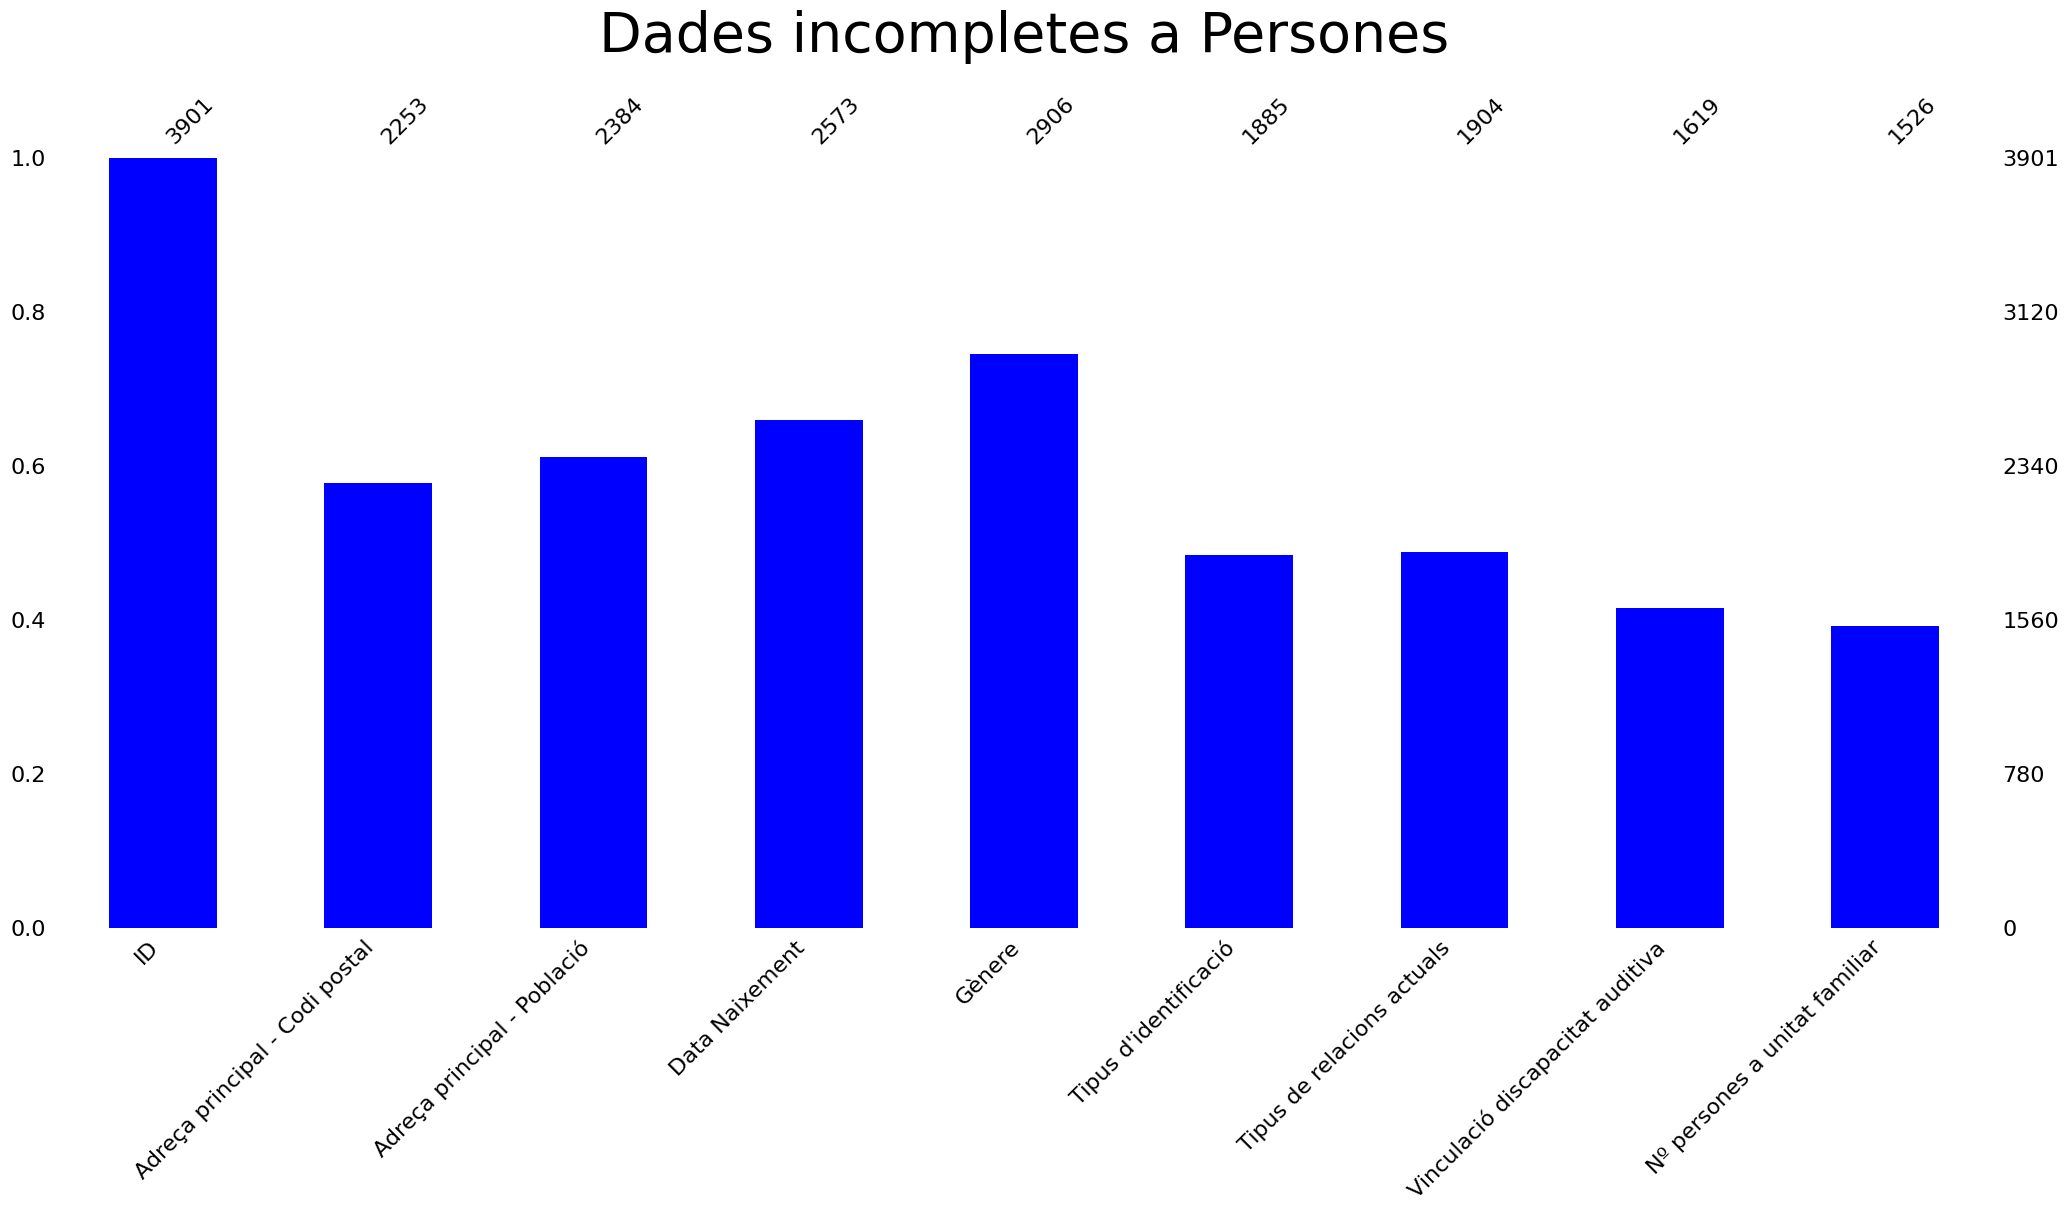

In [14]:
#detectem el nombre de dades inclompletes
import missingno as msno
import matplotlib.pyplot as plt
# Visualize the number of missing values as a bar chart
plt.title('Dades incompletes a Persones',fontsize=40, pad=30)
msno.bar(df, color='b')


Com podem veure hi ha moltes dades faltants, degut en gran part a que hi ha una gran varietat de persones a qui es recullen les dades i no totes amb els mateixos criteris, per la qual cosa mantindrem les columnes

<Axes: >

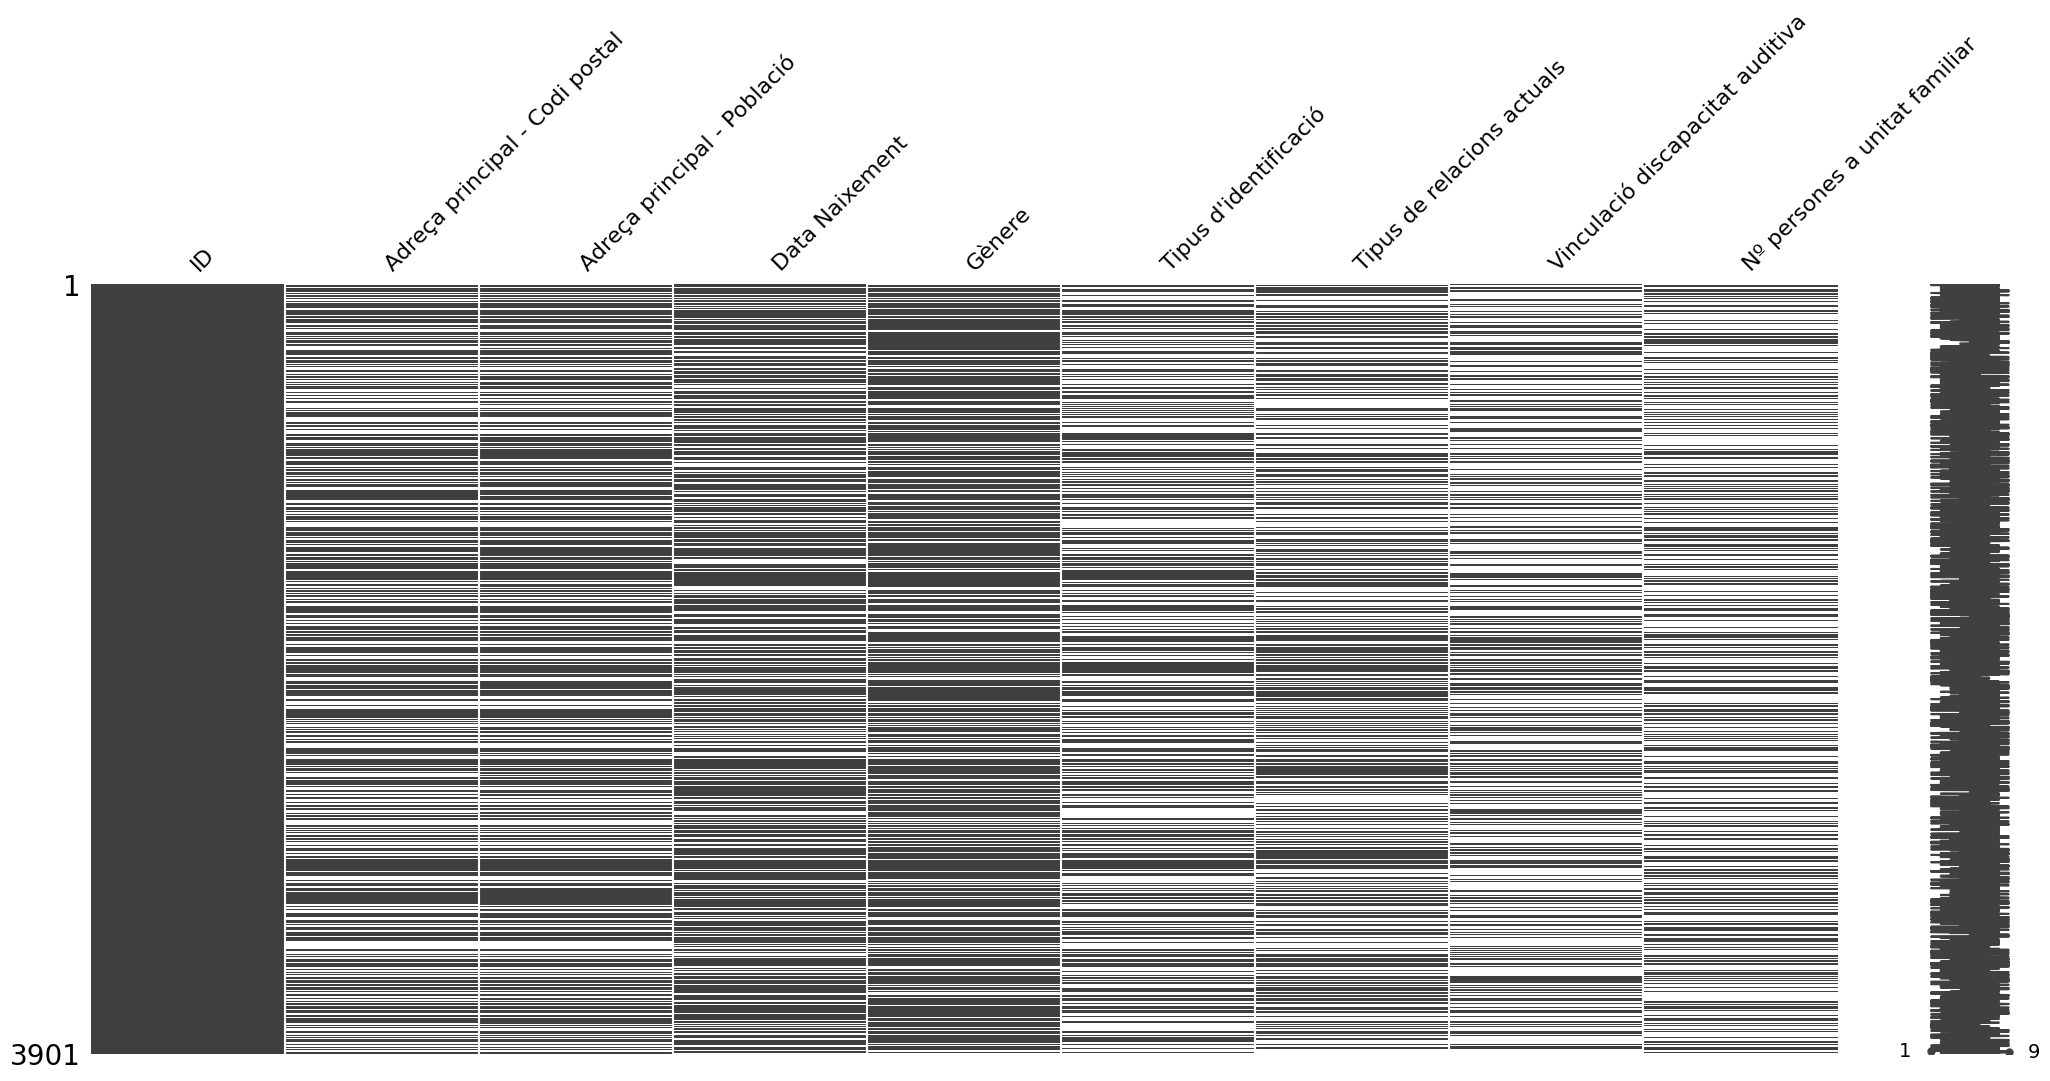

In [15]:
msno.matrix(df)

In [16]:
#pasar df_persones a csv
df.to_csv('dades_persones_final.csv', index=False, encoding='utf-8')

Aquesta base de dades recull les dades relacionades amb la discapacitat de la persona

En aquesta base de dades ens hem trobat en què hi ha vàries entrades duplicades per ID però en les que hi ha diferents camps no omplerts en una i si en una altra, per la qual cosa hem deduït que el programa ha introduït una nova entrada quan s’han introduït nous camps i per tant hem unit les entrades per ID unint els valors faltants per als introduïts.

In [17]:
import pandas as pd

In [18]:
df=pd.read_csv('Dades Discapacitat.csv',encoding='utf-8',sep=';')
df_dic=pd.read_csv('Dict.csv',encoding='utf-8',sep=',')

In [19]:
# Encuentra las columnas sin valores nulos
columns_without_nan = df.columns[df.isnull().sum() == 0]

# Muestra el nombre de las columnas sin valores nulos
for column in columns_without_nan:
    print(column)

Inicials i Data
ID
Data de Creació
Última Modificació
Creat Per
Modificat Per
Eliminat
Data registre dades
Modificat Per Nom
modified_by_name_mod
Creat Per.1
created_by_name_mod
assigned_user_name_mod


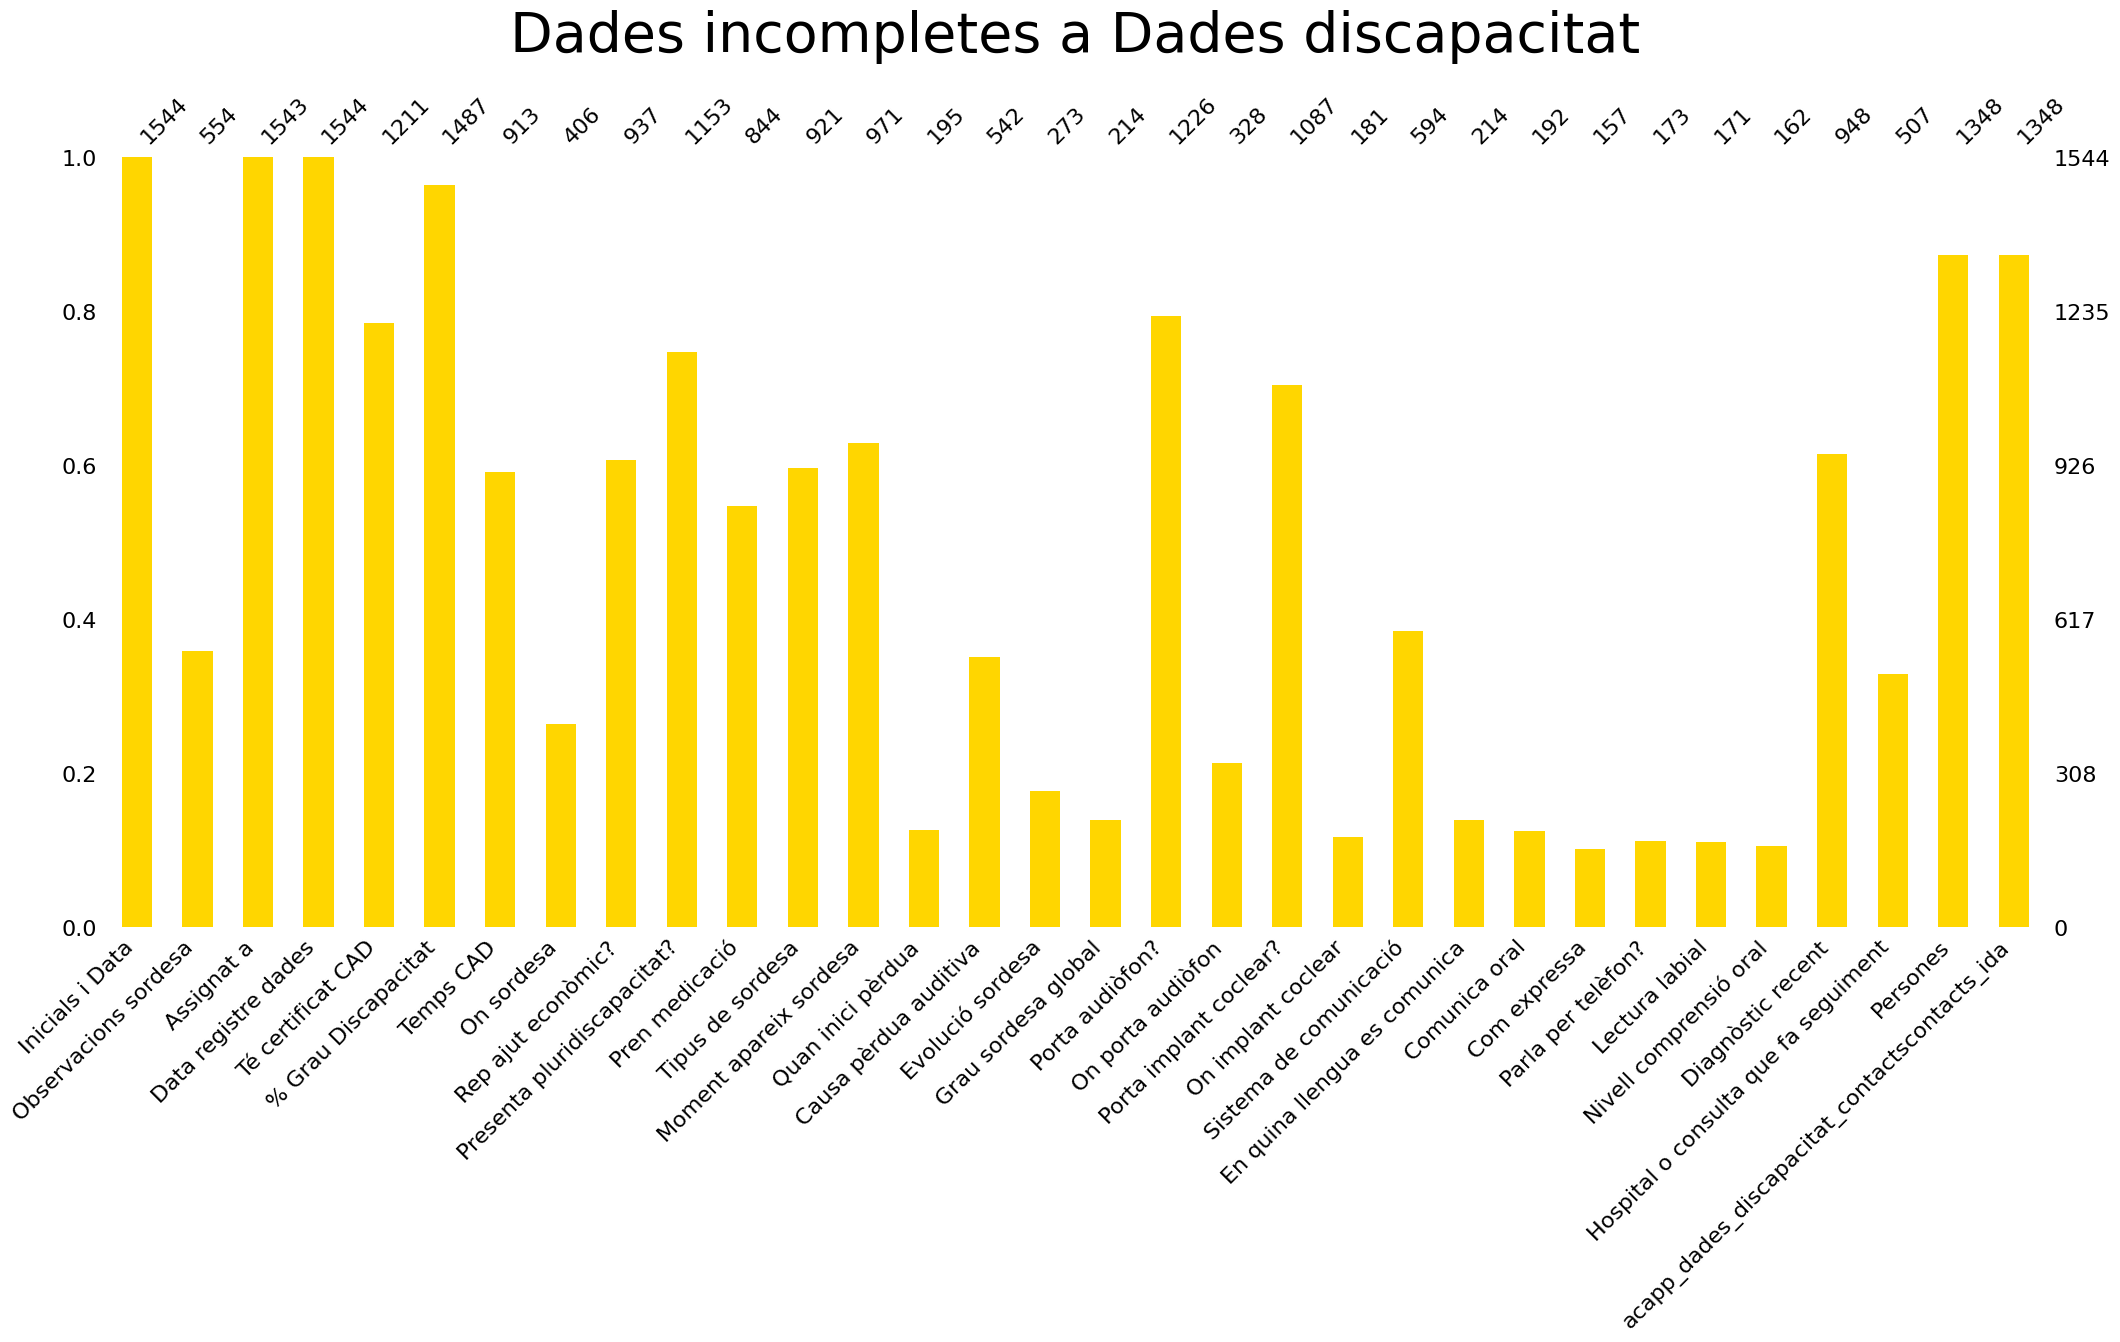

In [20]:
import missingno as msno
import matplotlib.pyplot as plt

# Obtén la lista de columnas que cumplen la condición de tener un máximo del 90% de valores nulos
selected_columns = []
for column in df.columns:
    null_percentage = df[column].isnull().mean()
    if null_percentage <= 0.9:
        selected_columns.append(column)

# Filtra el DataFrame original solo para las columnas seleccionadas
filtered_df = df[selected_columns]

# Elimina las columnas específicas que existan en el DataFrame
columns_to_exclude = ['ID', 'Usuari Assignat', 'Data de Creació', 'Última Modificació', 'Creat Per', 'Modificat Per',
                      'Eliminat', 'Gestió ACAPPS', 'Modificat Per Nom', 'modified_by_name_owner',
                      'modified_by_name_mod', 'Creat Per.1', 'created_by_name_owner', 'created_by_name_mod',
                      'assigned_user_name_owner', 'assigned_user_name_mod', 'No trucar', 'Data de Creació',
                      'Data de Modificació', 'Modificat per', 'Creat per', 'Eliminat', 'Compta desactivada',
                      'Tipus de portal d\'usuari']

filtered_df = filtered_df.drop(columns=[col for col in columns_to_exclude if col in filtered_df])

# Visualiza el número de valores nulos como un gráfico de barras
plt.title('Dades incompletes a Dades discapacitat', fontsize=40, pad=30)
msno.bar(filtered_df, color='#ffD600')
plt.show()


In [21]:
#seleccionem columnes
df=df[['acapp_dades_discapacitat_contactscontacts_ida','Té certificat CAD','% Grau Discapacitat','Temps CAD','On sordesa','Rep ajut econòmic?','Presenta pluridiscapacitat?','Tipus pluridiscapacitat','Pren medicació','Tipus de sordesa','Moment apareix sordesa','Quan inici pèrdua','Causa pèrdua auditiva','Porta audiòfon?','Porta implant coclear?','On implant coclear','Sistema de comunicació','Hospital o consulta que fa seguiment']]
#cambiar nom acapp_dades_discapacitat_contactscontacts_ida per ID
df.rename(columns={'acapp_dades_discapacitat_contactscontacts_ida':'ID'},inplace=True)



In [22]:
#a partir del diccionari creat anteriorment, cambiem la ID per tal d'evitar duplicats
df['ID'] = df['ID'].map(df_dic.set_index('ID')['IDN'])
df.head()

ID Té certificat CAD  \
0                                   NaN               NaN   
1  19c7d363-71c1-f441-5e47-5e0dc5e4a1fd                Sí   
2  73e5a12f-3169-8bb5-8181-60b8a4df5100                Sí   
3  c8a7044c-a15e-6426-be3a-5bf7c9e43700               NaN   
4  9b49d2b7-97eb-a44a-fe3a-5f7b14f2400d                Sí   

   % Grau Discapacitat  Temps CAD     On sordesa Rep ajut econòmic?  \
0                 45.0        NaN  Unilateral OD                NaN   
1                 34.0  Permanent            NaN                 Sí   
2                 34.0        NaN     Biilateral                NaN   
3                 74.0        NaN            NaN                NaN   
4                 78.0        NaN     Biilateral                NaN   

  Presenta pluridiscapacitat? Tipus pluridiscapacitat Pren medicació  \
0                          Sí                     NaN            NaN   
1                          Sí                     NaN             Sí   
2                         NaN                     NaN            NaN   
3                          Sí                     NaN            NaN   
4                         NaN                     NaN            NaN   

  Tipus de sordesa Moment apareix sordesa Quan inici pèrdua  \
0              NaN            Prelocutiva               NaN   
1   Neurosensorial            Prelocutiva               NaN   
2   Neurosensorial            Prelocutiva         neixement   
3              NaN            Prelocutiva         Naixement   
4   Neurosensorial            Prelocutiva               NaN   

  Causa pèrdua auditiva Porta audiòfon? Porta implant coclear?  \
0              Genètica              Sí                     No   
1                   NaN              No                     Sí   
2           Desconeguda              No                     Sí   
3             Adquirida              No                     No   
4           Desconeguda              No                    NaN   

  On implant coclear Sistema de comunicació  \
0                NaN                   Oral   
1                NaN                    NaN   
2      Ambdues oïdes                   Oral   
3                NaN                    NaN   
4                NaN                 Signes   

  Hospital o consulta que fa seguiment  
0                                  NaN  
1            Hospital Sant Joan de Déu  
2                                  NaN  
3                                  NaN  
4                                  NaN

In [23]:
#nulls a ID
df['ID'].isnull().sum()

196

Eliminem entrades sense ID, ja que no podrem treballar amb elles

In [24]:
df = df.dropna(subset=["ID"])

In [25]:
#quantitat de duplicats a per la columna ID
df['ID'].duplicated().sum()

194

Ens trobem que hi ha forces entrades duplicades i valors faltants en diferents columnes però amb el mateix ID per la qual cosa procedima unir les files amb el mateix ID i omplir els valros faltants

In [26]:
#Unim les files duplicades per ID i omplir els valors faltants
df = df.groupby('ID').apply(lambda x: x.fillna(method='ffill')).reset_index(drop=True)


In [27]:
#eliminem duplicats
df.drop_duplicates(subset='ID',keep='first',inplace=True)
df.head()

ID Té certificat CAD  \
0  10031d51-3654-6bdd-ad97-5f69f0cdf888                Sí   
1  100cad7c-e055-a06d-8770-5e0dc51435f4                No   
2  101ebe57-34cd-a613-32e2-5bb4a0f4213e               NaN   
3  1092f675-085b-7bab-684e-5e0dc5cd578f                No   
4  10d07499-2ea4-2962-1c0a-5e0dc583cf10                No   

   % Grau Discapacitat  Temps CAD     On sordesa Rep ajut econòmic?  \
0                 33.0        NaN            NaN                 No   
1                  0.0  Permanent            NaN                 Sí   
2                 65.0  Permanent  Unilateral OD                NaN   
3                  0.0  Permanent            NaN                 Sí   
4                  0.0  Permanent            NaN                 Sí   

  Presenta pluridiscapacitat? Tipus pluridiscapacitat Pren medicació  \
0                          No                     NaN            NaN   
1                          Sí                     NaN             Sí   
2                          Sí                  Física            NaN   
3                          Sí                     NaN             Sí   
4                          Sí                     NaN             Sí   

  Tipus de sordesa Moment apareix sordesa Quan inici pèrdua  \
0   Neurosensorial            Prelocutiva               NaN   
1   Neurosensorial            Prelocutiva               NaN   
2              NaN           Postlocutiva               NaN   
3              NaN                    NaN               NaN   
4       Conductiva           Postlocutiva               NaN   

  Causa pèrdua auditiva Porta audiòfon? Porta implant coclear?  \
0           Desconeguda              Sí                    NaN   
1                   NaN              Sí                     No   
2             Adquirida              Sí                     No   
3                   NaN              Sí                     No   
4                   NaN              Sí                     No   

  On implant coclear Sistema de comunicació  \
0                NaN                   Oral   
1                NaN                    NaN   
2                NaN                   Oral   
3                NaN                    NaN   
4                NaN                    NaN   

  Hospital o consulta que fa seguiment  
0                                  NaN  
1                     SANT JOAND E DEU  
2                                  NaN  
3                                  NaN  
4       Hospital Municipal de Badalona

<Axes: title={'center': 'Dades incompletes a Dades Discapacitat'}>

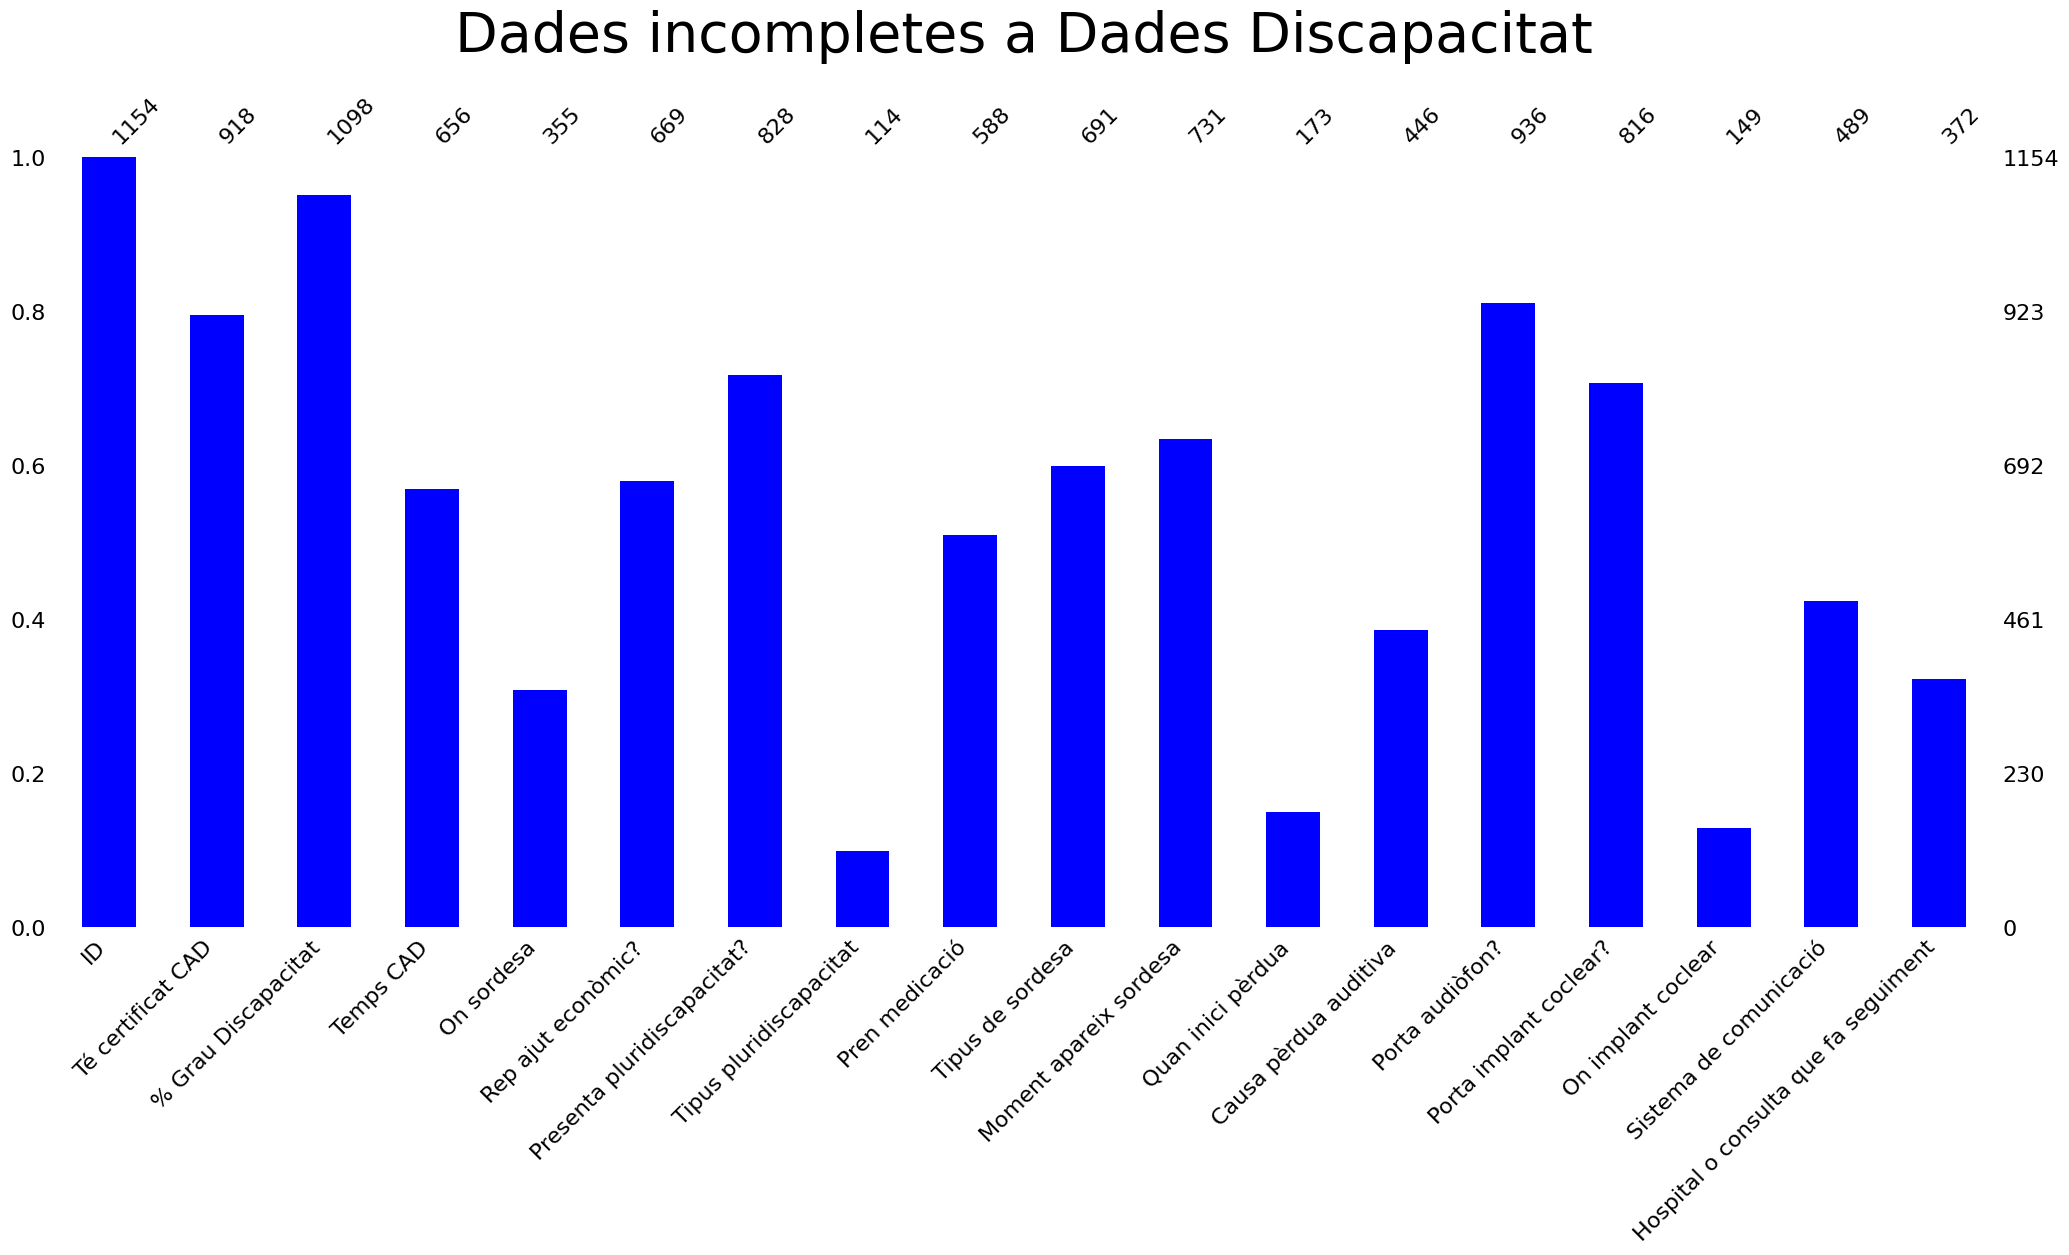

In [28]:
#detectem el nombre de dades inclompletes
import missingno as msno
import matplotlib.pyplot as plt
# Visualize the number of missing values as a bar chart
plt.title('Dades incompletes a Dades Discapacitat',fontsize=40, pad=30)
msno.bar(df, color='b')

En aquest cas ens trobem que hi ha moltes dades faltants que es deuen a que certa informació depèn de si presenta una característica prèvia o no. Per exemple el tipus de pluridiscapacitat només serà contestada per a personses que hagin contestat que si a si presenta pluridiscapacitat. És possible que altres dades incompletes es deguina que són preguntes no obligatòries o que la persona que introdueix les dades assumeix que no contestant es suposa que la resposta és negativa.

In [29]:
#pasar df_dades_discapacitat a csv
df.to_csv('dades_discapacitat_final.csv', index=False, encoding='utf-8')

Aquesta base de dades recull totes les dades relacionades amb la formació de les persones usuàries.

En aquest cas ens hem trobat que hi ha una entrada per a cada formació diferent que ha realitzat la persona. Hem cregut interessant mantenir la formació amb un nivell superior, ja que ens indica el nivell formatiu de la persona (la columna de nivell formatiu recollida ens indica el nivell formatiu de cadascuna de les formacions que ha realitzat la persona). Per a realitzar-ho hem creat un diccionari ordenant els diferents valors de la columna nivell formatiu, per tal de mantenir només el nivell formatiu superior.

In [30]:
import pandas as pd

In [31]:
#importar csv utf8
df=pd.read_csv('Dades Formatives.csv',encoding='utf-8',sep=';')
df_dic=pd.read_csv('Dict.csv',encoding='utf-8',sep=',')

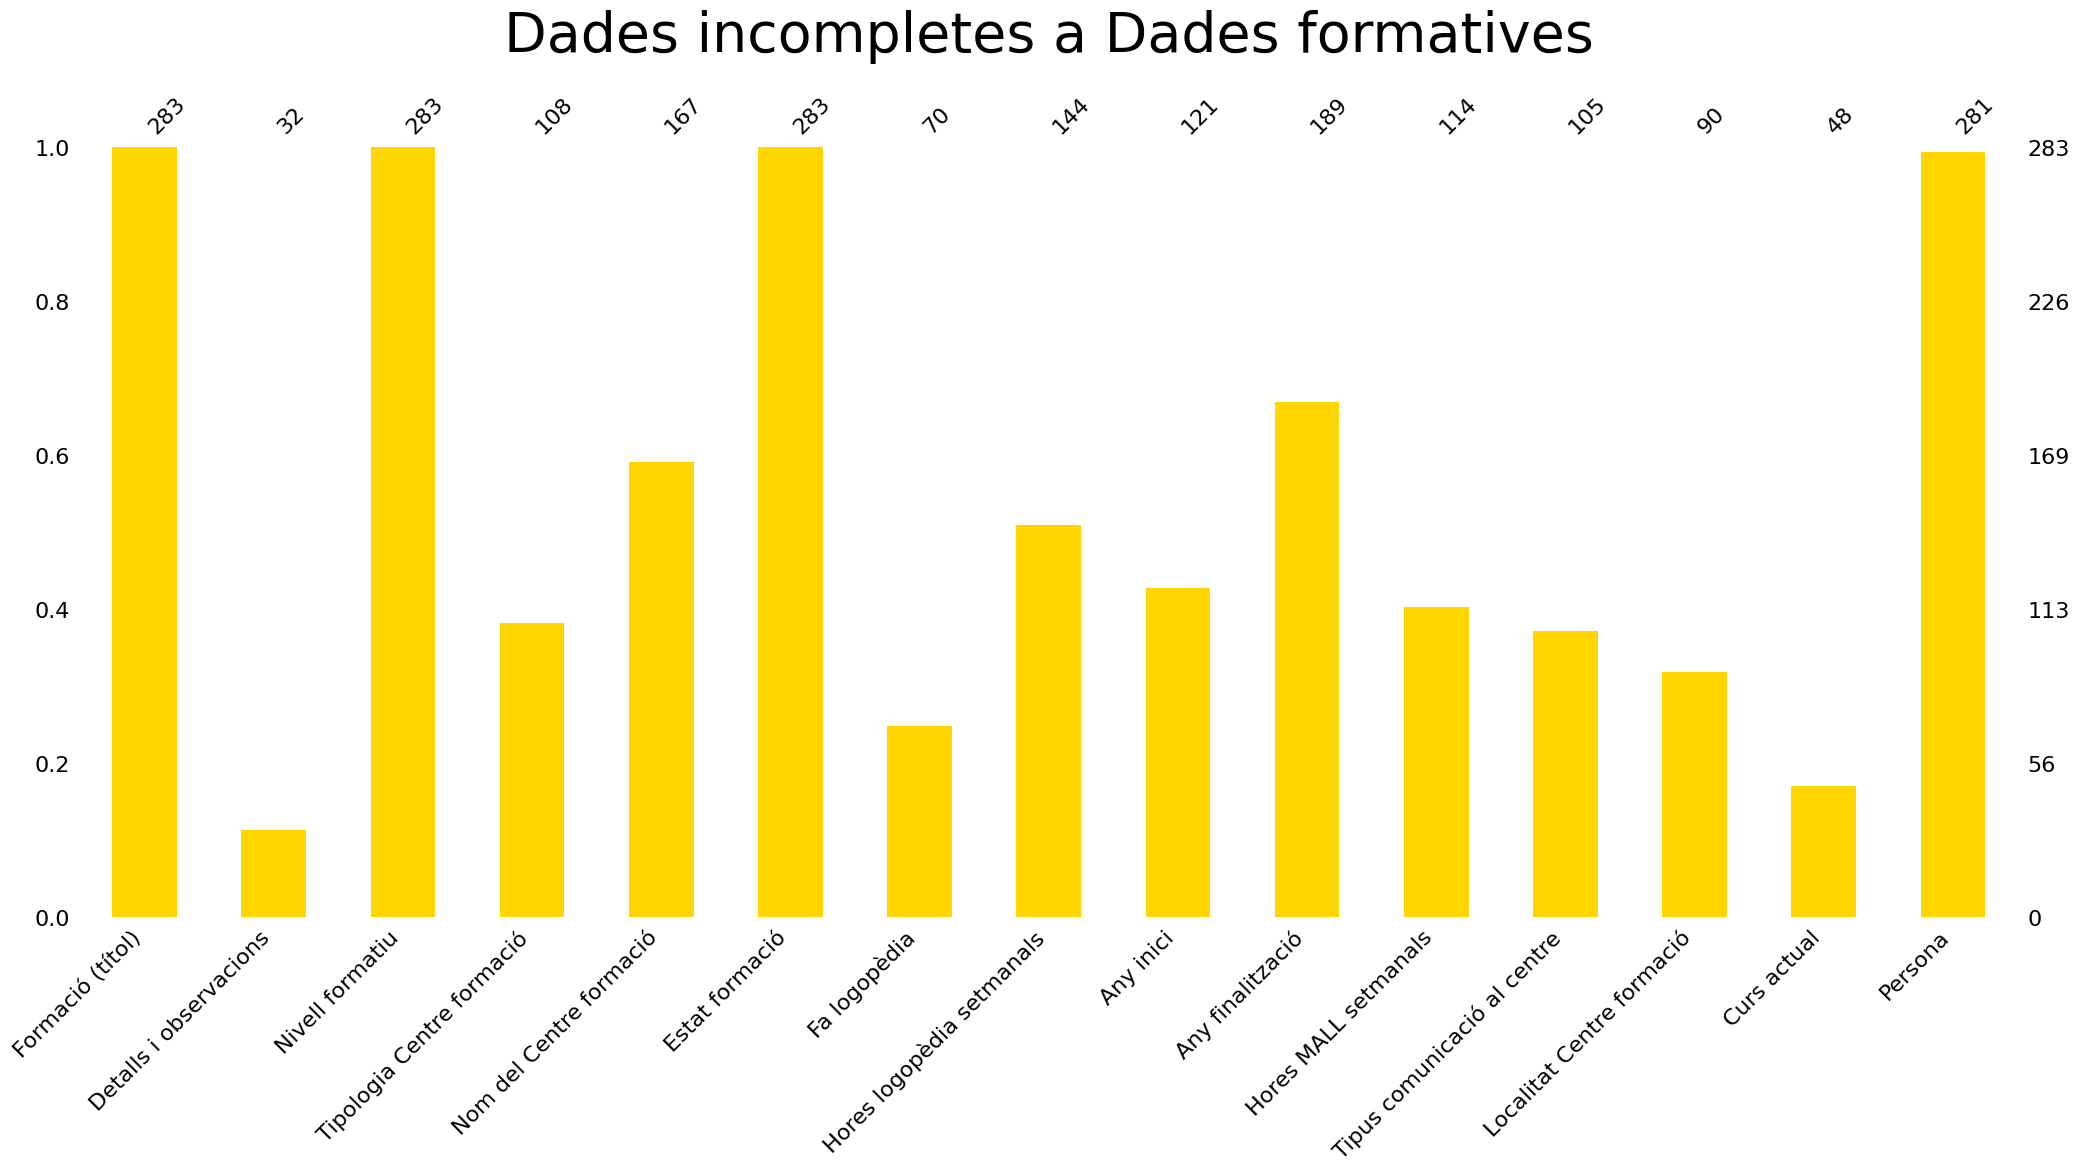

In [32]:
import missingno as msno
import matplotlib.pyplot as plt

# Obtén la lista de columnas que cumplen la condición de tener un máximo del 90% de valores nulos
selected_columns = []
for column in df.columns:
    null_percentage = df[column].isnull().mean()
    if null_percentage <= 0.9:
        selected_columns.append(column)

# Filtra el DataFrame original solo para las columnas seleccionadas
filtered_df = df[selected_columns]

# Elimina las columnas específicas que existan en el DataFrame
columns_to_exclude = ['ID', 'Usuari Assignat', 'Data de Creació', 'Última Modificació', 'Creat Per', 'Modificat Per',
                      'Eliminat', 'Gestió ACAPPS', 'Modificat Per Nom', 'modified_by_name_owner','Assignat a', 'Assignat a (ID)',
                      'modified_by_name_mod', 'Creat Per.1', 'created_by_name_owner', 'created_by_name_mod',
                      'assigned_user_name_owner', 'assigned_user_name_mod', 'No trucar', 'Data de Creació','stic_dades_formatives_contactscontacts_ida',
                      'Data de Modificació', 'Modificat per', 'Creat per', 'Eliminat', 'Compta desactivada',
                      'Tipus de portal d\'usuari']

filtered_df = filtered_df.drop(columns=[col for col in columns_to_exclude if col in filtered_df])

# Visualiza el número de valores nulos como un gráfico de barras
plt.title('Dades incompletes a Dades formatives', fontsize=40, pad=30)
msno.bar(filtered_df, color='#ffD600')
plt.show()

In [33]:


df_i=df
#seleccionem columnes que volem
df=df[['stic_dades_formatives_contactscontacts_ida','Formació (títol)','Nivell formatiu','Tipologia Centre formació','Estat formació','Nom del Centre formació','Fa logopèdia','Tipus comunicació al centre','Localitat Centre formació']]
#canviar nom stic_dades_formatives_contactscontacts_ida per ID
df.rename(columns={'stic_dades_formatives_contactscontacts_ida':'ID'},inplace=True)


/tmp/ipykernel_35743/3112965060.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'stic_dades_formatives_contactscontacts_ida':'ID'},inplace=True)


In [34]:
#a partir del diccionari creat anteriorment, cambiem la ID per tal d'evitar duplicats
df['ID'] = df['ID'].map(df_dic.set_index('ID')['IDN'])
df.head()

/tmp/ipykernel_35743/4012389730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ID'] = df['ID'].map(df_dic.set_index('ID')['IDN'])


ID                      Formació (títol)  \
0  df399c5e-a898-e1f5-f738-5eb1456dd3c7                              ESTETICA   
1  f1d56290-d2b4-17e9-77b2-5dd7e988de2d                               TURISME   
2  1350ea25-b70f-e703-8caa-5bf42e3dfcf9                     educació primària   
3  af15117e-0c18-15a5-f4c5-5ce3ce9ec0d9                      ALISSON BARBIERI   
4  59d03389-1bd5-9fd0-b72e-5f96f735507d  CICLE DE GRAU SUPERIOR ADMINISTRACIÓ   

             Nivell formatiu Tipologia Centre formació Estat formació  \
0      Formació Professional                       NaN     Finalitzat   
1                Universitat                       NaN        En curs   
2  Educació Primària (i EGB)                       NaN     Finalitzat   
3  Educació Primària (i EGB)              Ed. Especial        En curs   
4      Formació Professional                    Públic     Finalitzat   

             Nom del Centre formació Fa logopèdia Tipus comunicació al centre  \
0                                NaN          NaN                        Oral   
1                                NaN          NaN                         NaN   
2  Escuela de Virrei Amat. Barcelona          NaN                         NaN   
3                          JOSEP PLA           Sí                         NaN   
4                IES Vallera de Salt          NaN                        Oral   

  Localitat Centre formació  
0                       NaN  
1                       NaN  
2                       NaN  
3                 BARCELONA  
4                    GIRONA

Tenint en compte els valors faltants i la importància de les variables seleccionem les següents columnes


In [35]:
df=df[['ID','Nivell formatiu','Tipologia Centre formació', 'Estat formació', 'Fa logopèdia','Tipus comunicació al centre', 'Localitat Centre formació']]


In [36]:
#valors único a Nivell formatiu
df['Nivell formatiu'].unique()

array(['Formació Professional', 'Universitat',
       'Educació Primària (i EGB)', 'Educació Infantil',
       'Formació no reglada', 'Altres (no categoritzat)',
       'Batxillerat (i COU)', 'Educació Secundària',
       'Altra formació reglada', 'Llar infants'], dtype=object)

Creem un diccionari per tal de mantenir les formacions de més nivell

In [37]:
niveles = {
    'Llar infants':0,
    'Educació Infantil':1,
    'Altres (no categoritzat)': 2,
    'Formació no reglada':3,
    'Altra formació reglada': 4,
    'Educació Primària (i EGB)': 5,
    'Educació Secundària': 6,
    'Batxillerat (i COU)': 7,
    'Formació Professional': 8,
    'Universitat': 9,
}

# Creem la columna "nivell estudis" utilizant la funció map
df['nivell estudis'] = df['Nivell formatiu'].map(niveles)
df.head()

ID            Nivell formatiu  \
0  df399c5e-a898-e1f5-f738-5eb1456dd3c7      Formació Professional   
1  f1d56290-d2b4-17e9-77b2-5dd7e988de2d                Universitat   
2  1350ea25-b70f-e703-8caa-5bf42e3dfcf9  Educació Primària (i EGB)   
3  af15117e-0c18-15a5-f4c5-5ce3ce9ec0d9  Educació Primària (i EGB)   
4  59d03389-1bd5-9fd0-b72e-5f96f735507d      Formació Professional   

  Tipologia Centre formació Estat formació Fa logopèdia  \
0                       NaN     Finalitzat          NaN   
1                       NaN        En curs          NaN   
2                       NaN     Finalitzat          NaN   
3              Ed. Especial        En curs           Sí   
4                    Públic     Finalitzat          NaN   

  Tipus comunicació al centre Localitat Centre formació  nivell estudis  
0                        Oral                       NaN               8  
1                         NaN                       NaN               9  
2                         NaN                       NaN               5  
3                         NaN                 BARCELONA               5  
4                        Oral                    GIRONA               8

In [38]:
#unim files duplicades y mantenim el valor més alt en nivell d'estudis
indices_max =df.groupby('ID')['nivell estudis'].idxmax()
df=df.loc[indices_max]
df.head()

ID            Nivell formatiu  \
23   10031d51-3654-6bdd-ad97-5f69f0cdf888  Educació Primària (i EGB)   
142  118cbd91-8e15-1a15-b3e3-5f6b37902fff      Formació Professional   
234  129f1ccc-bcb6-1e15-b3d3-621c846a594f      Formació Professional   
14   12cb5f09-14e2-185e-ee1d-5f69c44f499a  Educació Primària (i EGB)   
233  130f8822-368d-f3d8-f843-5da710debfb2                Universitat   

    Tipologia Centre formació Estat formació Fa logopèdia  \
23                        NaN     Finalitzat          NaN   
142                       NaN     Finalitzat          NaN   
234                       NaN     Finalitzat          NaN   
14                  Concertat        En curs           Sí   
233                       NaN     Finalitzat          NaN   

    Tipus comunicació al centre Localitat Centre formació  nivell estudis  
23                         Oral     SANT CUGAT DEL VALLÈS               5  
142           Llengua de signes                       NaN               8  
234                         NaN                       NaN               8  
14                         Oral    SANTA COLOMA DE FARNES               5  
233                        Oral                       NaN               9

In [39]:
#eliminem columna nivell estudis ja que la tenim duplicada
df = df.drop(['nivell estudis'], axis=1)
df.head()

ID            Nivell formatiu  \
23   10031d51-3654-6bdd-ad97-5f69f0cdf888  Educació Primària (i EGB)   
142  118cbd91-8e15-1a15-b3e3-5f6b37902fff      Formació Professional   
234  129f1ccc-bcb6-1e15-b3d3-621c846a594f      Formació Professional   
14   12cb5f09-14e2-185e-ee1d-5f69c44f499a  Educació Primària (i EGB)   
233  130f8822-368d-f3d8-f843-5da710debfb2                Universitat   

    Tipologia Centre formació Estat formació Fa logopèdia  \
23                        NaN     Finalitzat          NaN   
142                       NaN     Finalitzat          NaN   
234                       NaN     Finalitzat          NaN   
14                  Concertat        En curs           Sí   
233                       NaN     Finalitzat          NaN   

    Tipus comunicació al centre Localitat Centre formació  
23                         Oral     SANT CUGAT DEL VALLÈS  
142           Llengua de signes                       NaN  
234                         NaN                       NaN  
14                         Oral    SANTA COLOMA DE FARNES  
233                        Oral                       NaN

<Axes: title={'center': 'Dades incompletes a Dades Formatives'}>

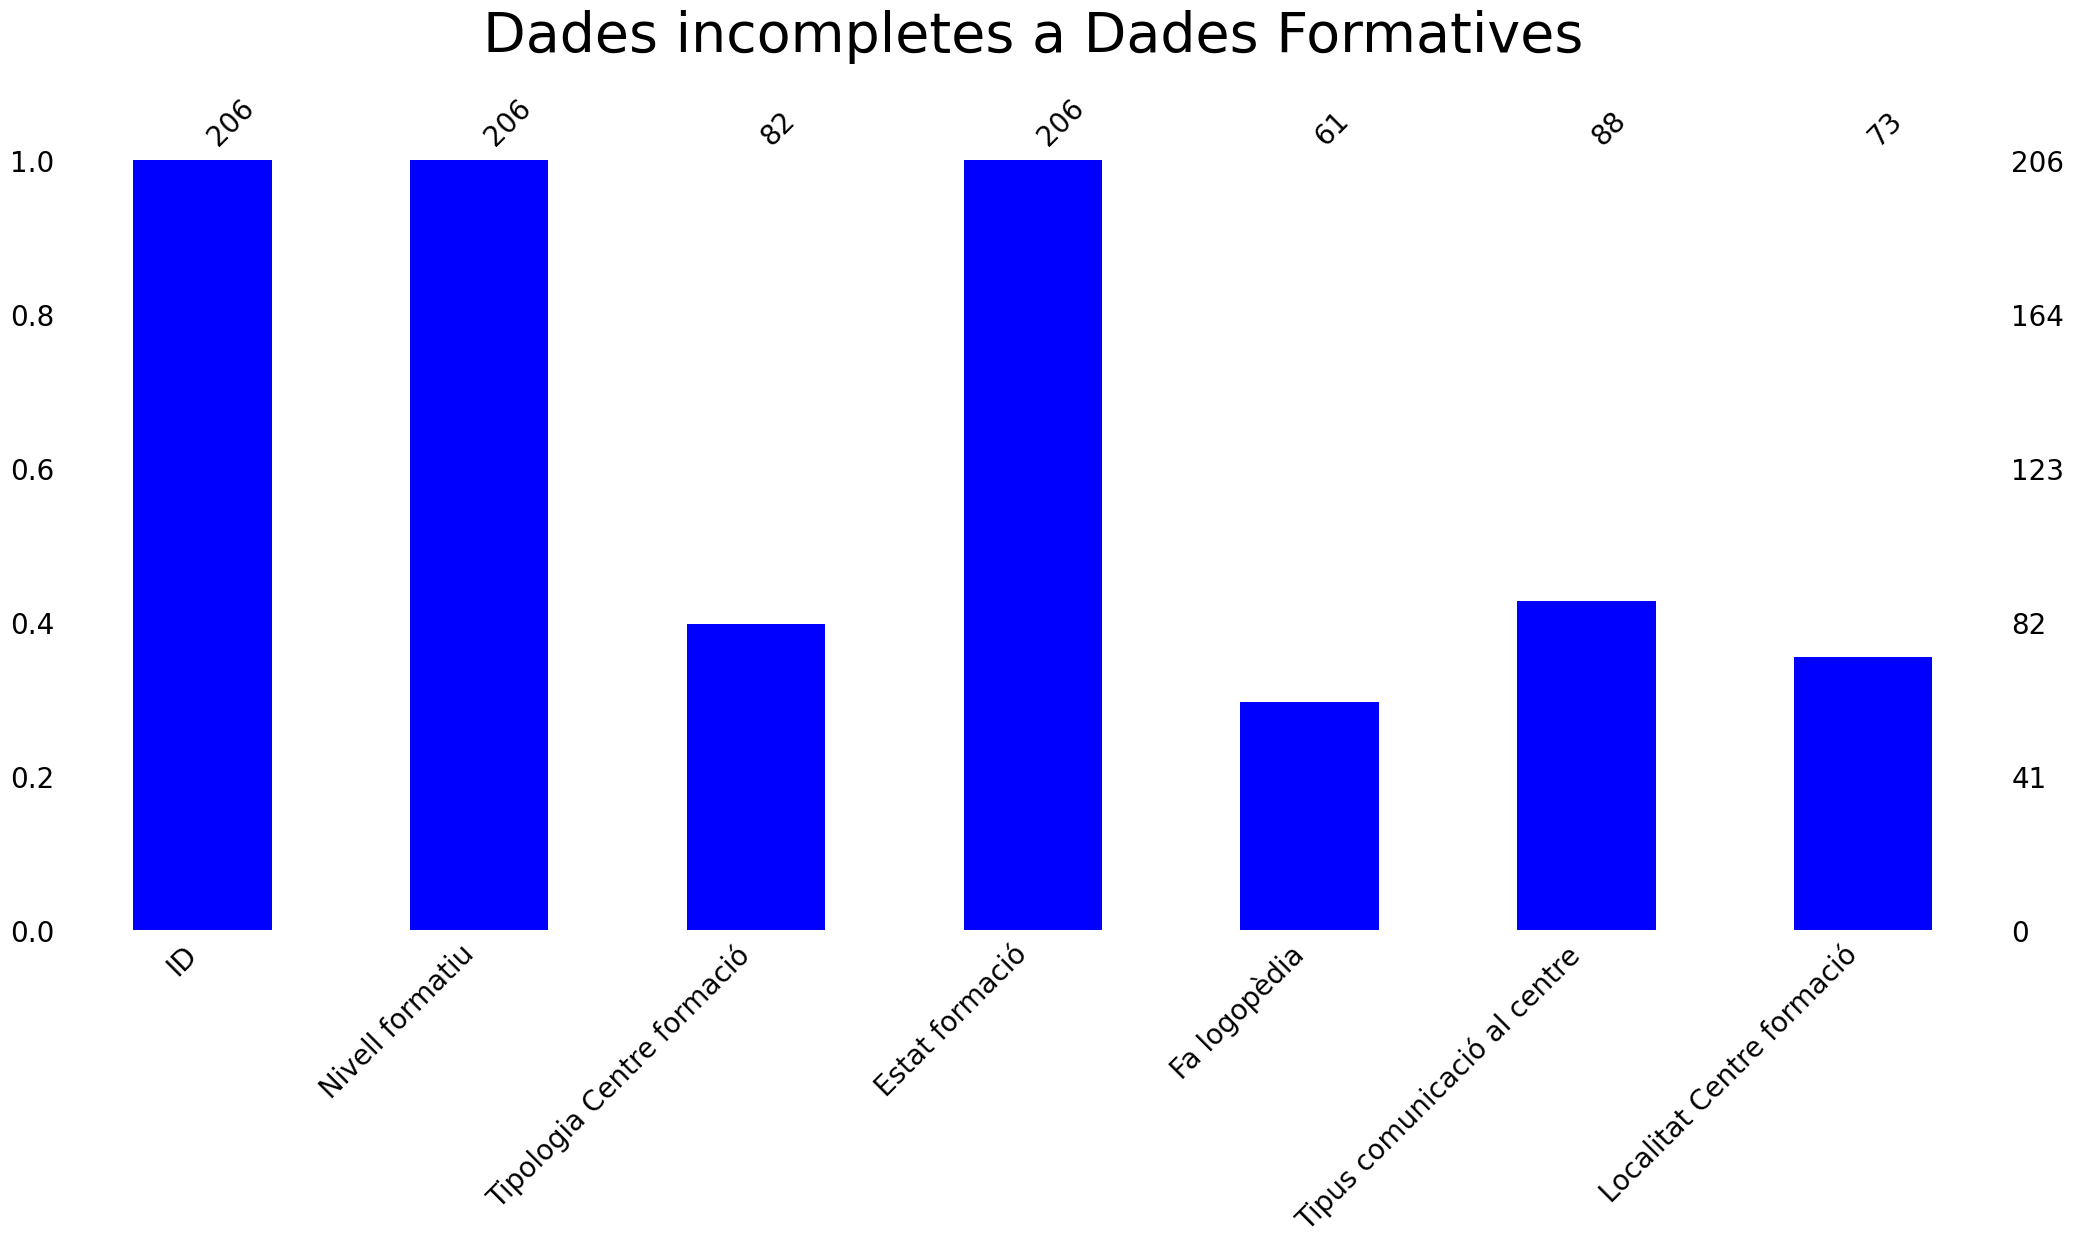

In [40]:
#detectem el nombre de dades inclompletes
import missingno as msno
import matplotlib.pyplot as plt
# Visualize the number of missing values as a bar chart
plt.title('Dades incompletes a Dades Formatives',fontsize=40, pad=30)
msno.bar(df, color='b',fontsize=20)

No és determinant el nombre de nulls, ja que inclou usuaris sense formació (infants).

Eliminem Estat formació, ja que no està actualitzat i ens podria portar a errors

In [41]:
df=df[['ID','Nivell formatiu','Tipologia Centre formació', 'Fa logopèdia','Tipus comunicació al centre', 'Localitat Centre formació']]

In [42]:
#pasar df_dadesformatives a csv
df.to_csv('dades_formatives_f.csv', index=False, encoding='utf-8')

Aquesta base de dades recull les experiències laborals que han tingut les persones usuàries del servei.

En aquest cas hem creat les següents columnes:

a.	**Data incorporació mercat laboral** on hem introduït la  primera data d’inici de contracte de les diferents experiències laborals

b.	**Temps total experiència** on hem recollit el temps total de de les diferents experiències laborals

c.	**Nombre d’experiències** on hem recollit el nombre d’experiències laborals que ha tingut la persona

In [43]:
import pandas as pd

In [44]:
df=pd.read_csv('Experiència Laboral.csv',encoding='utf-8',sep=';')
df_dic=pd.read_csv('Dict.csv',encoding='utf-8',sep=',')

df_i=df

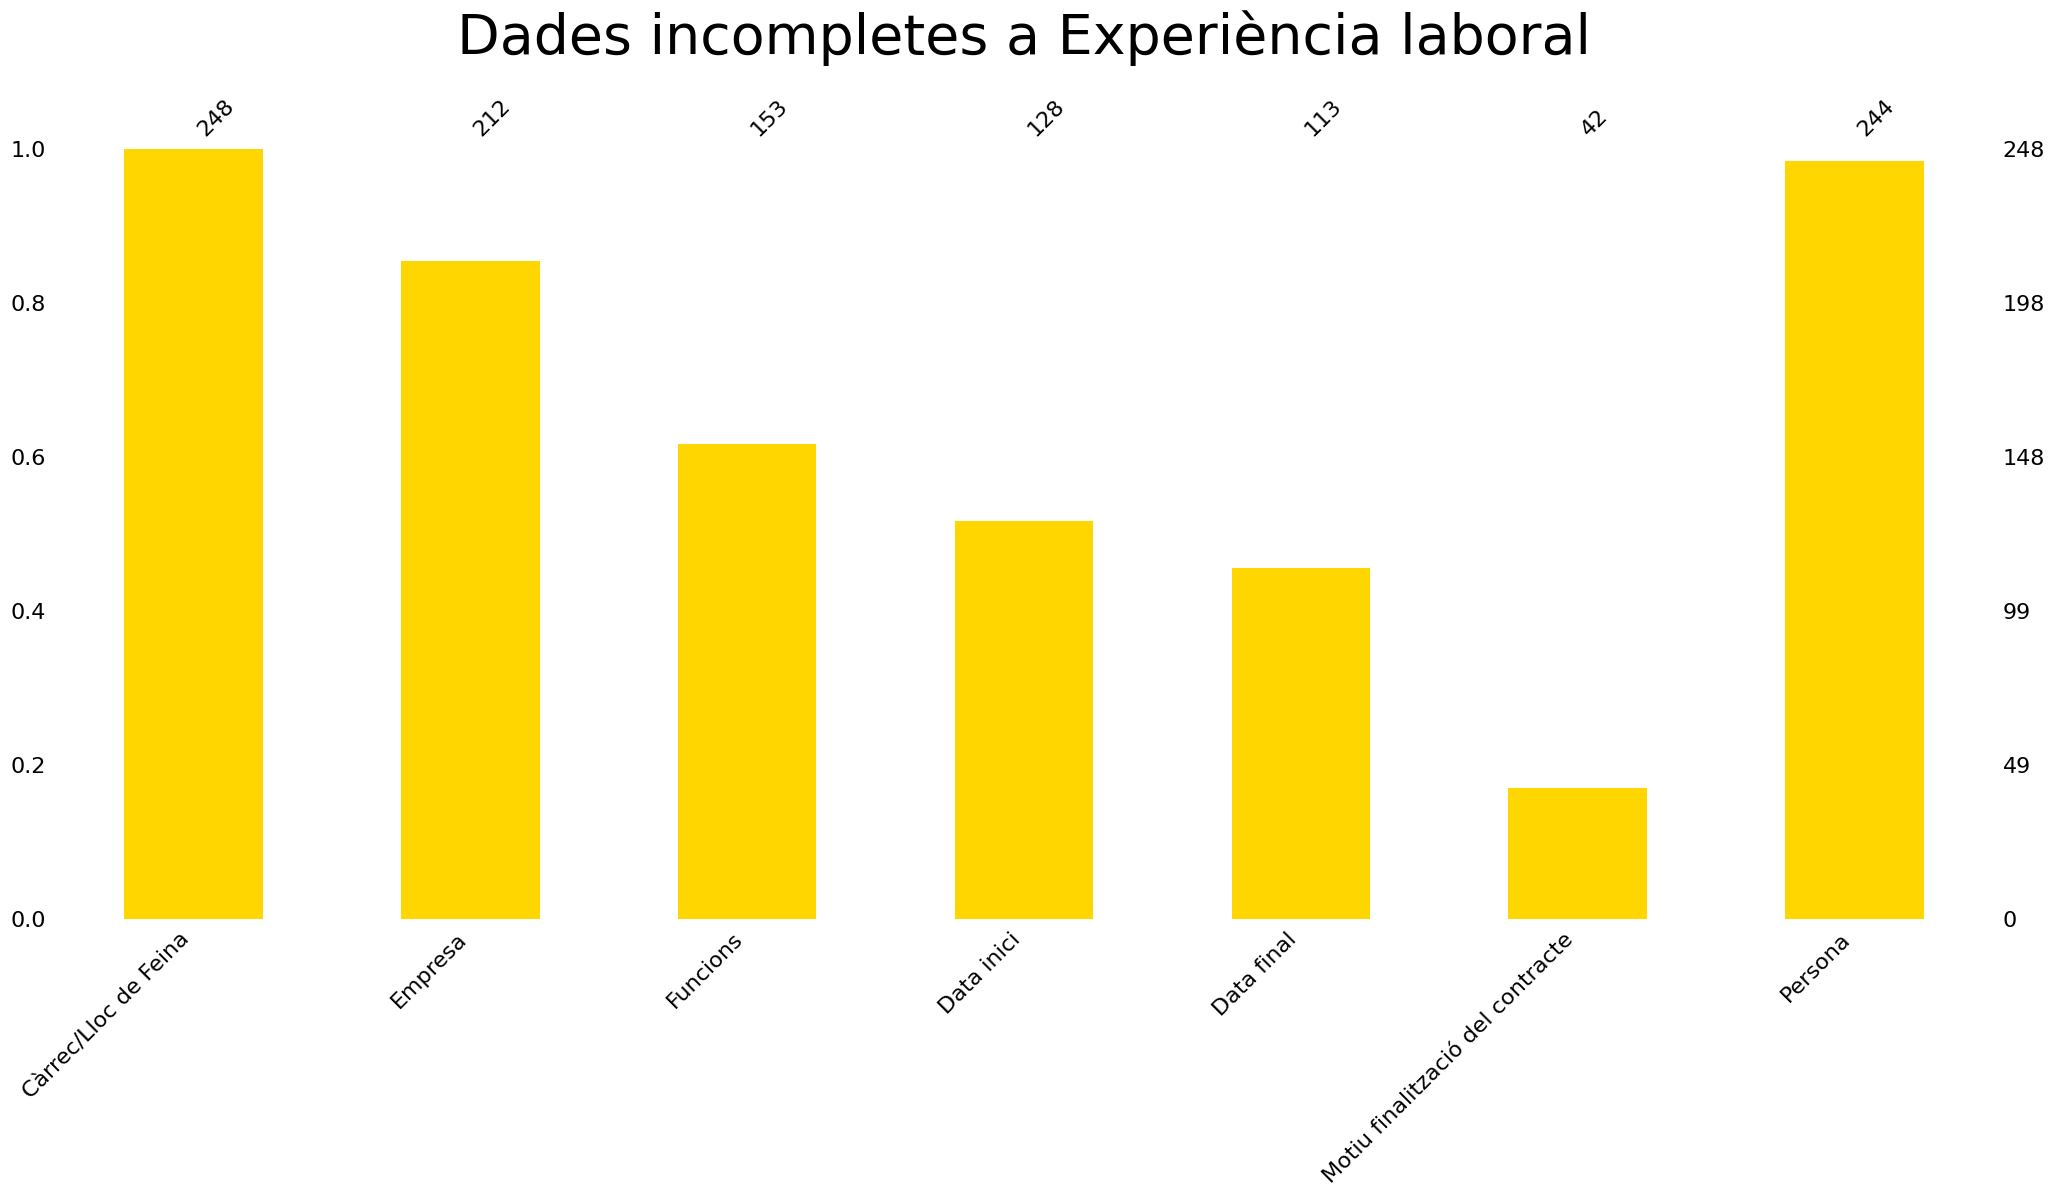

In [45]:
import missingno as msno
import matplotlib.pyplot as plt

# Obtén la lista de columnas que cumplen la condición de tener un máximo del 90% de valores nulos
selected_columns = []
for column in df.columns:
    null_percentage = df[column].isnull().mean()
    if null_percentage <= 0.9:
        selected_columns.append(column)

# Filtra el DataFrame original solo para las columnas seleccionadas
filtered_df = df[selected_columns]

# Elimina las columnas específicas que existan en el DataFrame
columns_to_exclude = ['ID', 'Usuari Assignat', 'Data de Creació', 'Última Modificació', 'Creat Per', 'Modificat Per',
                      'Eliminat', 'Gestió ACAPPS', 'Modificat Per Nom', 'modified_by_name_owner','Assignat a', 'Assignat a (ID)',
                      'modified_by_name_mod', 'Creat Per.1', 'created_by_name_owner', 'created_by_name_mod',
                      'assigned_user_name_owner', 'assigned_user_name_mod', 'No trucar', 'Data de Creació','stic_dades_formatives_contactscontacts_ida',
                      'Data de Modificació', 'Modificat per', 'Creat per', 'Eliminat', 'Compta desactivada','stic_experiencia_laboral_contactscontacts_ida',
                      'Tipus de portal d\'usuari']

filtered_df = filtered_df.drop(columns=[col for col in columns_to_exclude if col in filtered_df])

# Visualiza el número de valores nulos como un gráfico de barras
plt.title('Dades incompletes a Experiència laboral', fontsize=40, pad=30)
msno.bar(filtered_df, color='#ffD600')
plt.show()


In [46]:
#seleccionem columnes
df=df[['stic_experiencia_laboral_contactscontacts_ida','Càrrec/Lloc de Feina','Empresa','Data inici','Data final','Motiu finalització del contracte']]

In [47]:
#cambiem el nom de la columna stic_experiencia_laboral_contactscontacts_ida per ID
df.rename(columns={'stic_experiencia_laboral_contactscontacts_ida':'ID'},inplace=True)

/tmp/ipykernel_35743/3394776135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'stic_experiencia_laboral_contactscontacts_ida':'ID'},inplace=True)


In [48]:
#a partir del diccionari creat anteriorment, cambiem la ID per tal d'evitar duplicats
df['ID'] = df['ID'].map(df_dic.set_index('ID')['IDN'])
df.head()

/tmp/ipykernel_35743/4012389730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ID'] = df['ID'].map(df_dic.set_index('ID')['IDN'])


ID  \
0  f0b9fa20-6d46-3e2b-8d75-5df772cb28d5   
1  707b42d9-47ae-6a7b-e5f9-5bf42ebfa31e   
2  192c9601-2996-00a7-2904-5cee874ded1e   
3  b71063b1-c757-200e-69ee-5d9c7a934efd   
4  755a0d82-65a9-f11d-9d91-5e01e6fee9e1   

                                Càrrec/Lloc de Feina  \
0                               PRÀCTIQUES SOLDADURA   
1  Auxiliar Administrativa Institut Català de la ...   
2                            AUXILIAR ADMINISTRATIVO   
3                                         REPARTIDOR   
4                                             gerent   

                       Empresa  Data inici  Data final  \
0           ESCOLA DEL TREBALL  07/01/2019         NaN   
1  Institut català de la salut         NaN         NaN   
2                          NaN         NaN         NaN   
3                       AMAZON  01/01/2018         NaN   
4               VINE I QUEDA'T  01/01/2008  01/01/2012   

  Motiu finalització del contracte  
0                              NaN  
1                              NaN  
2                              NaN  
3                              NaN  
4                  canvi de negoci

In [49]:
#Eliminem entrades sense 'ID'
df = df.dropna(subset=["ID"])

<Axes: title={'center': 'Dades incompletes a Experiència laboral'}>

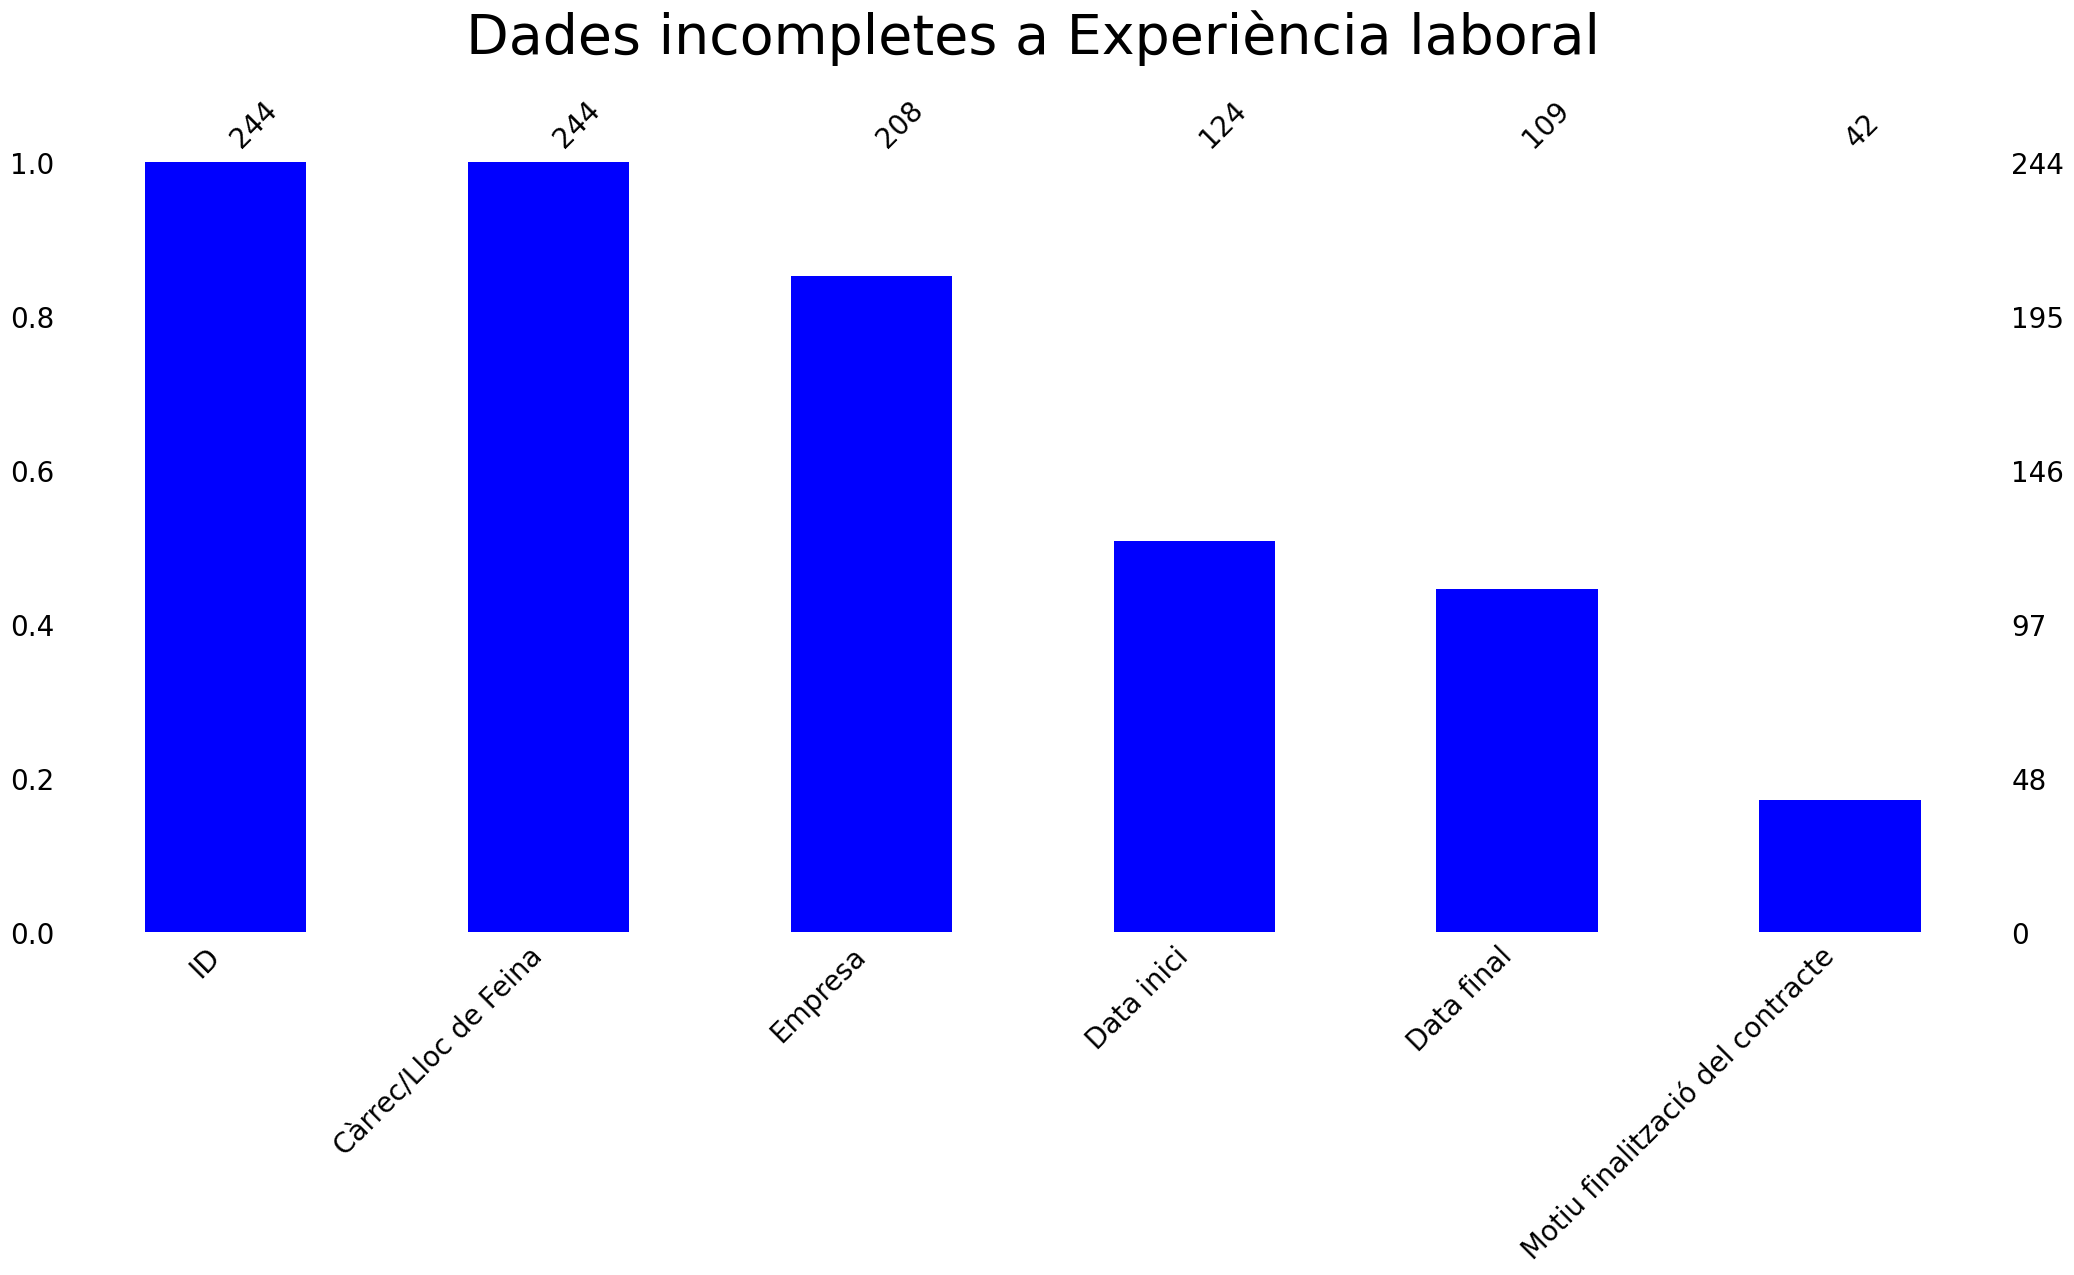

In [50]:
#detectem el nombre de dades inclompletes
import missingno as msno
import matplotlib.pyplot as plt
# Visualize the number of missing values as a bar chart
plt.title('Dades incompletes a Experiència laboral',fontsize=40, pad=30)
msno.bar(df, color='b',fontsize=20)

Segons la la quanitat de nans i la importància de la informació seleccionem les següents variables


In [51]:
df=df[['ID','Càrrec/Lloc de Feina','Empresa','Data inici','Data final']]

In [52]:
#ver fila 49
df.iloc[49]


ID                      b4fe2ea2-abea-bc3c-172c-601053fd008f
Càrrec/Lloc de Feina                   AJUDANT DE JARDINERIA
Empresa                                   TREBALLS FORESTALS
Data inici                                        01/01/2013
Data final                                        31/12/2014
Name: 50, dtype: object

In [53]:
#pasar Data inici y Data final a forma datetime
df['Data inici']=pd.to_datetime(df['Data inici'],format='%d/%m/%Y')
df['Data final']=pd.to_datetime(df['Data final'],format='%d/%m/%Y')
df.head()

ID  \
0  f0b9fa20-6d46-3e2b-8d75-5df772cb28d5   
1  707b42d9-47ae-6a7b-e5f9-5bf42ebfa31e   
2  192c9601-2996-00a7-2904-5cee874ded1e   
3  b71063b1-c757-200e-69ee-5d9c7a934efd   
4  755a0d82-65a9-f11d-9d91-5e01e6fee9e1   

                                Càrrec/Lloc de Feina  \
0                               PRÀCTIQUES SOLDADURA   
1  Auxiliar Administrativa Institut Català de la ...   
2                            AUXILIAR ADMINISTRATIVO   
3                                         REPARTIDOR   
4                                             gerent   

                       Empresa Data inici Data final  
0           ESCOLA DEL TREBALL 2019-01-07        NaT  
1  Institut català de la salut        NaT        NaT  
2                          NaN        NaT        NaT  
3                       AMAZON 2018-01-01        NaT  
4               VINE I QUEDA'T 2008-01-01 2012-01-01

A partir de les dades que tenim creiem que calcular el temps de duració del contracte ens podrà ajudar a en la predicció del temps que triga una persona a trobar feina

In [54]:
#crear columna amb nombre Temps para calcular el temps de duració del contracte
df['Temps']=df['Data final']-df['Data inici']
df['Temps']=df['Temps'].dt.days
df.head()

ID  \
0  f0b9fa20-6d46-3e2b-8d75-5df772cb28d5   
1  707b42d9-47ae-6a7b-e5f9-5bf42ebfa31e   
2  192c9601-2996-00a7-2904-5cee874ded1e   
3  b71063b1-c757-200e-69ee-5d9c7a934efd   
4  755a0d82-65a9-f11d-9d91-5e01e6fee9e1   

                                Càrrec/Lloc de Feina  \
0                               PRÀCTIQUES SOLDADURA   
1  Auxiliar Administrativa Institut Català de la ...   
2                            AUXILIAR ADMINISTRATIVO   
3                                         REPARTIDOR   
4                                             gerent   

                       Empresa Data inici Data final   Temps  
0           ESCOLA DEL TREBALL 2019-01-07        NaT     NaN  
1  Institut català de la salut        NaT        NaT     NaN  
2                          NaN        NaT        NaT     NaN  
3                       AMAZON 2018-01-01        NaT     NaN  
4               VINE I QUEDA'T 2008-01-01 2012-01-01  1461.0

In [55]:
#sumem els valors de Temps per tal de calcular el temps total d'experiència de la persona
df['Temps total experiència'] = df.groupby('ID')['Temps'].transform('sum')
df.head()

ID  \
0  f0b9fa20-6d46-3e2b-8d75-5df772cb28d5   
1  707b42d9-47ae-6a7b-e5f9-5bf42ebfa31e   
2  192c9601-2996-00a7-2904-5cee874ded1e   
3  b71063b1-c757-200e-69ee-5d9c7a934efd   
4  755a0d82-65a9-f11d-9d91-5e01e6fee9e1   

                                Càrrec/Lloc de Feina  \
0                               PRÀCTIQUES SOLDADURA   
1  Auxiliar Administrativa Institut Català de la ...   
2                            AUXILIAR ADMINISTRATIVO   
3                                         REPARTIDOR   
4                                             gerent   

                       Empresa Data inici Data final   Temps  \
0           ESCOLA DEL TREBALL 2019-01-07        NaT     NaN   
1  Institut català de la salut        NaT        NaT     NaN   
2                          NaN        NaT        NaT     NaN   
3                       AMAZON 2018-01-01        NaT     NaN   
4               VINE I QUEDA'T 2008-01-01 2012-01-01  1461.0   

   Temps total experiència  
0                    385.0  
1                      0.0  
2                      0.0  
3                   1461.0  
4                   8311.0

La data a la que una persona s'incorpora al mercat laboral també hem pensat que ens pot donar una informació rellevant per la qual cosa creem aquesta variable

In [56]:
#creem la coluna Data incorporació mercat laboral seleccionant el valor mínim de la data d'inici
df['Data incorporació mercat laboral'] = df.groupby('ID')['Data inici'].transform('min')
df.head()


ID  \
0  f0b9fa20-6d46-3e2b-8d75-5df772cb28d5   
1  707b42d9-47ae-6a7b-e5f9-5bf42ebfa31e   
2  192c9601-2996-00a7-2904-5cee874ded1e   
3  b71063b1-c757-200e-69ee-5d9c7a934efd   
4  755a0d82-65a9-f11d-9d91-5e01e6fee9e1   

                                Càrrec/Lloc de Feina  \
0                               PRÀCTIQUES SOLDADURA   
1  Auxiliar Administrativa Institut Català de la ...   
2                            AUXILIAR ADMINISTRATIVO   
3                                         REPARTIDOR   
4                                             gerent   

                       Empresa Data inici Data final   Temps  \
0           ESCOLA DEL TREBALL 2019-01-07        NaT     NaN   
1  Institut català de la salut        NaT        NaT     NaN   
2                          NaN        NaT        NaT     NaN   
3                       AMAZON 2018-01-01        NaT     NaN   
4               VINE I QUEDA'T 2008-01-01 2012-01-01  1461.0   

   Temps total experiència Data incorporació mercat laboral  
0                    385.0                       2018-08-03  
1                      0.0                              NaT  
2                      0.0                              NaT  
3                   1461.0                       2001-01-01  
4                   8311.0                       1997-01-01

La quantitat d'experiències laborals també ens pot donar més informació i ajudar a la predicció, per la qual cosa creem dita variable

In [57]:
#crear columna amb la quantitat d'experiències laborals
counts = df['ID'].value_counts()
df["Nombre d'experiències"] = df['ID'].map(counts)
df.head()

ID  \
0  f0b9fa20-6d46-3e2b-8d75-5df772cb28d5   
1  707b42d9-47ae-6a7b-e5f9-5bf42ebfa31e   
2  192c9601-2996-00a7-2904-5cee874ded1e   
3  b71063b1-c757-200e-69ee-5d9c7a934efd   
4  755a0d82-65a9-f11d-9d91-5e01e6fee9e1   

                                Càrrec/Lloc de Feina  \
0                               PRÀCTIQUES SOLDADURA   
1  Auxiliar Administrativa Institut Català de la ...   
2                            AUXILIAR ADMINISTRATIVO   
3                                         REPARTIDOR   
4                                             gerent   

                       Empresa Data inici Data final   Temps  \
0           ESCOLA DEL TREBALL 2019-01-07        NaT     NaN   
1  Institut català de la salut        NaT        NaT     NaN   
2                          NaN        NaT        NaT     NaN   
3                       AMAZON 2018-01-01        NaT     NaN   
4               VINE I QUEDA'T 2008-01-01 2012-01-01  1461.0   

   Temps total experiència Data incorporació mercat laboral  \
0                    385.0                       2018-08-03   
1                      0.0                              NaT   
2                      0.0                              NaT   
3                   1461.0                       2001-01-01   
4                   8311.0                       1997-01-01   

   Nombre d'experiències  
0                      3  
1                      4  
2                      4  
3                      3  
4                      3

In [58]:
#seleccionem les columnes que ens serveixen per a treballar, ja que la columna Càrrec i Empresa tenen valors no classificats que no ens donen informació rellevant
df=df[['ID','Data incorporació mercat laboral','Temps total experiència',"Nombre d'experiències"]]
df.head()

ID Data incorporació mercat laboral  \
0  f0b9fa20-6d46-3e2b-8d75-5df772cb28d5                       2018-08-03   
1  707b42d9-47ae-6a7b-e5f9-5bf42ebfa31e                              NaT   
2  192c9601-2996-00a7-2904-5cee874ded1e                              NaT   
3  b71063b1-c757-200e-69ee-5d9c7a934efd                       2001-01-01   
4  755a0d82-65a9-f11d-9d91-5e01e6fee9e1                       1997-01-01   

   Temps total experiència  Nombre d'experiències  
0                    385.0                      3  
1                      0.0                      4  
2                      0.0                      4  
3                   1461.0                      3  
4                   8311.0                      3

In [59]:
#pasar Data incorporació mercat laboral a datetime
df['Data incorporació mercat laboral']=pd.to_datetime(df['Data incorporació mercat laboral'])

In [60]:
#mantenim les entrades amb la data incorporació al mercat laboral més antiga
# Ordenar el DataFrame por la columna "Data incorporació mercat laboral"
df = df.sort_values('Data incorporació mercat laboral')

# Eliminar las filas duplicadas por la columna "ID" manteniendo la primera aparición de cada valor en dicha columna
df = df.drop_duplicates('ID', keep='first')


<Axes: title={'center': 'Dades incompletes a Experiència laboral'}>

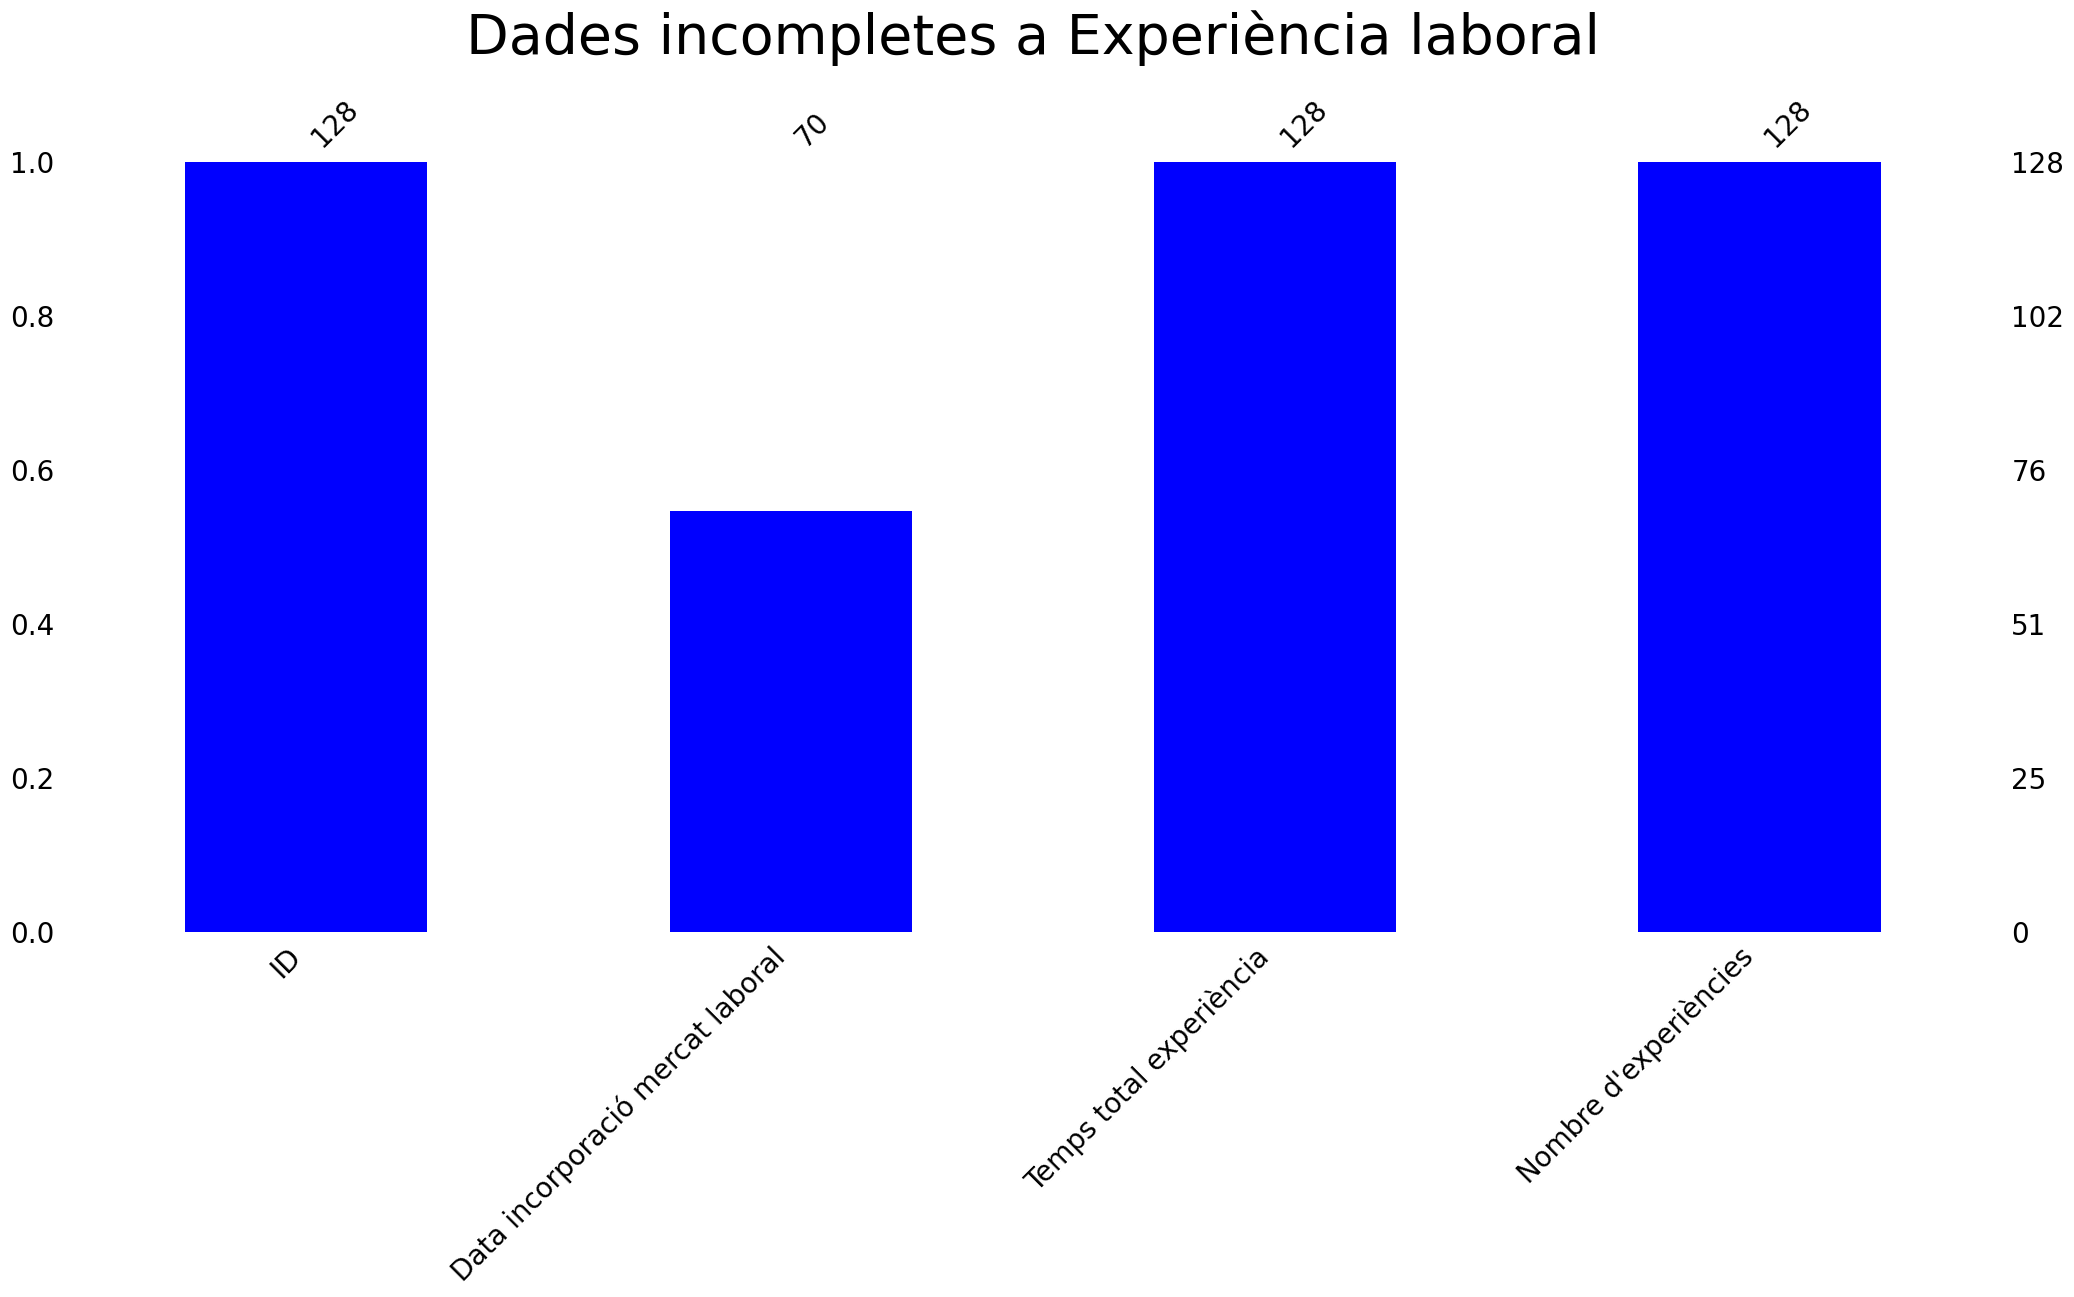

In [61]:
#detectem el nombre de dades inclompletes
import missingno as msno
import matplotlib.pyplot as plt
# Visualize the number of missing values as a bar chart
plt.title('Dades incompletes a Experiència laboral',fontsize=40, pad=30)
msno.bar(df, color='b',fontsize=20)

Encara que no tenim dades faltants en el temps total d'experiència de la persona podem deduir que en faltar gairebé la meitat de les dade en la data d'incorporació al mercat laboral tindrem molts valors a zero en el temps total d'experiència

In [62]:
#observem el percentage de valors 0 a Temps total experiència per tal de detectar possibles valors faltants
(df['Temps total experiència'] == 0).sum()/df.shape[0]*100

53.125

Tal com havíem previst un gran nombre de les entrades (un 53%) tenen un temps total d'experiència igual a 0 la qual cosa indica que falten les dades per poder fer aquest càlcul

In [63]:
#pasar df_experiencia_laboral a csv
df.to_csv('experiencia_laboral_final.csv', index=False, encoding='utf-8')

Aquesta base de dades recull les diferents accions de seguiment que ha rebut la persona

En aquest cas hem creat la columna:

a.	**Quantitat de seguiments** on hem recollit el nombre de seguiments que ha rebut la persona.


In [64]:
import pandas as pd

In [65]:
df=pd.read_csv ('Seguiments.csv',encoding='utf-8',sep=';')
df_dic=pd.read_csv('Dict.csv',encoding='utf-8',sep=',')

In [66]:
# Obtén el nombre de las columnas sin valores nulos
columns_without_nans = df.columns[df.notnull().all()]

# Imprime el nombre de las columnas sin valores nulos
for column in columns_without_nans:
    print(column)

Nom
ID
Data de Creació
Data de Modificació
Creat per
Modificat per
Suprimit
Modificat per.1
modified_by_name_mod
Creat per.1
created_by_name_mod
assigned_user_name_mod


findfont: Font family 'Agrandir' not found.
findfont: Font family 'Agrandir' not found.
findfont: Font family 'Agrandir' not found.
findfont: Font family 'Agrandir' not found.
findfont: Font family 'Agrandir' not found.


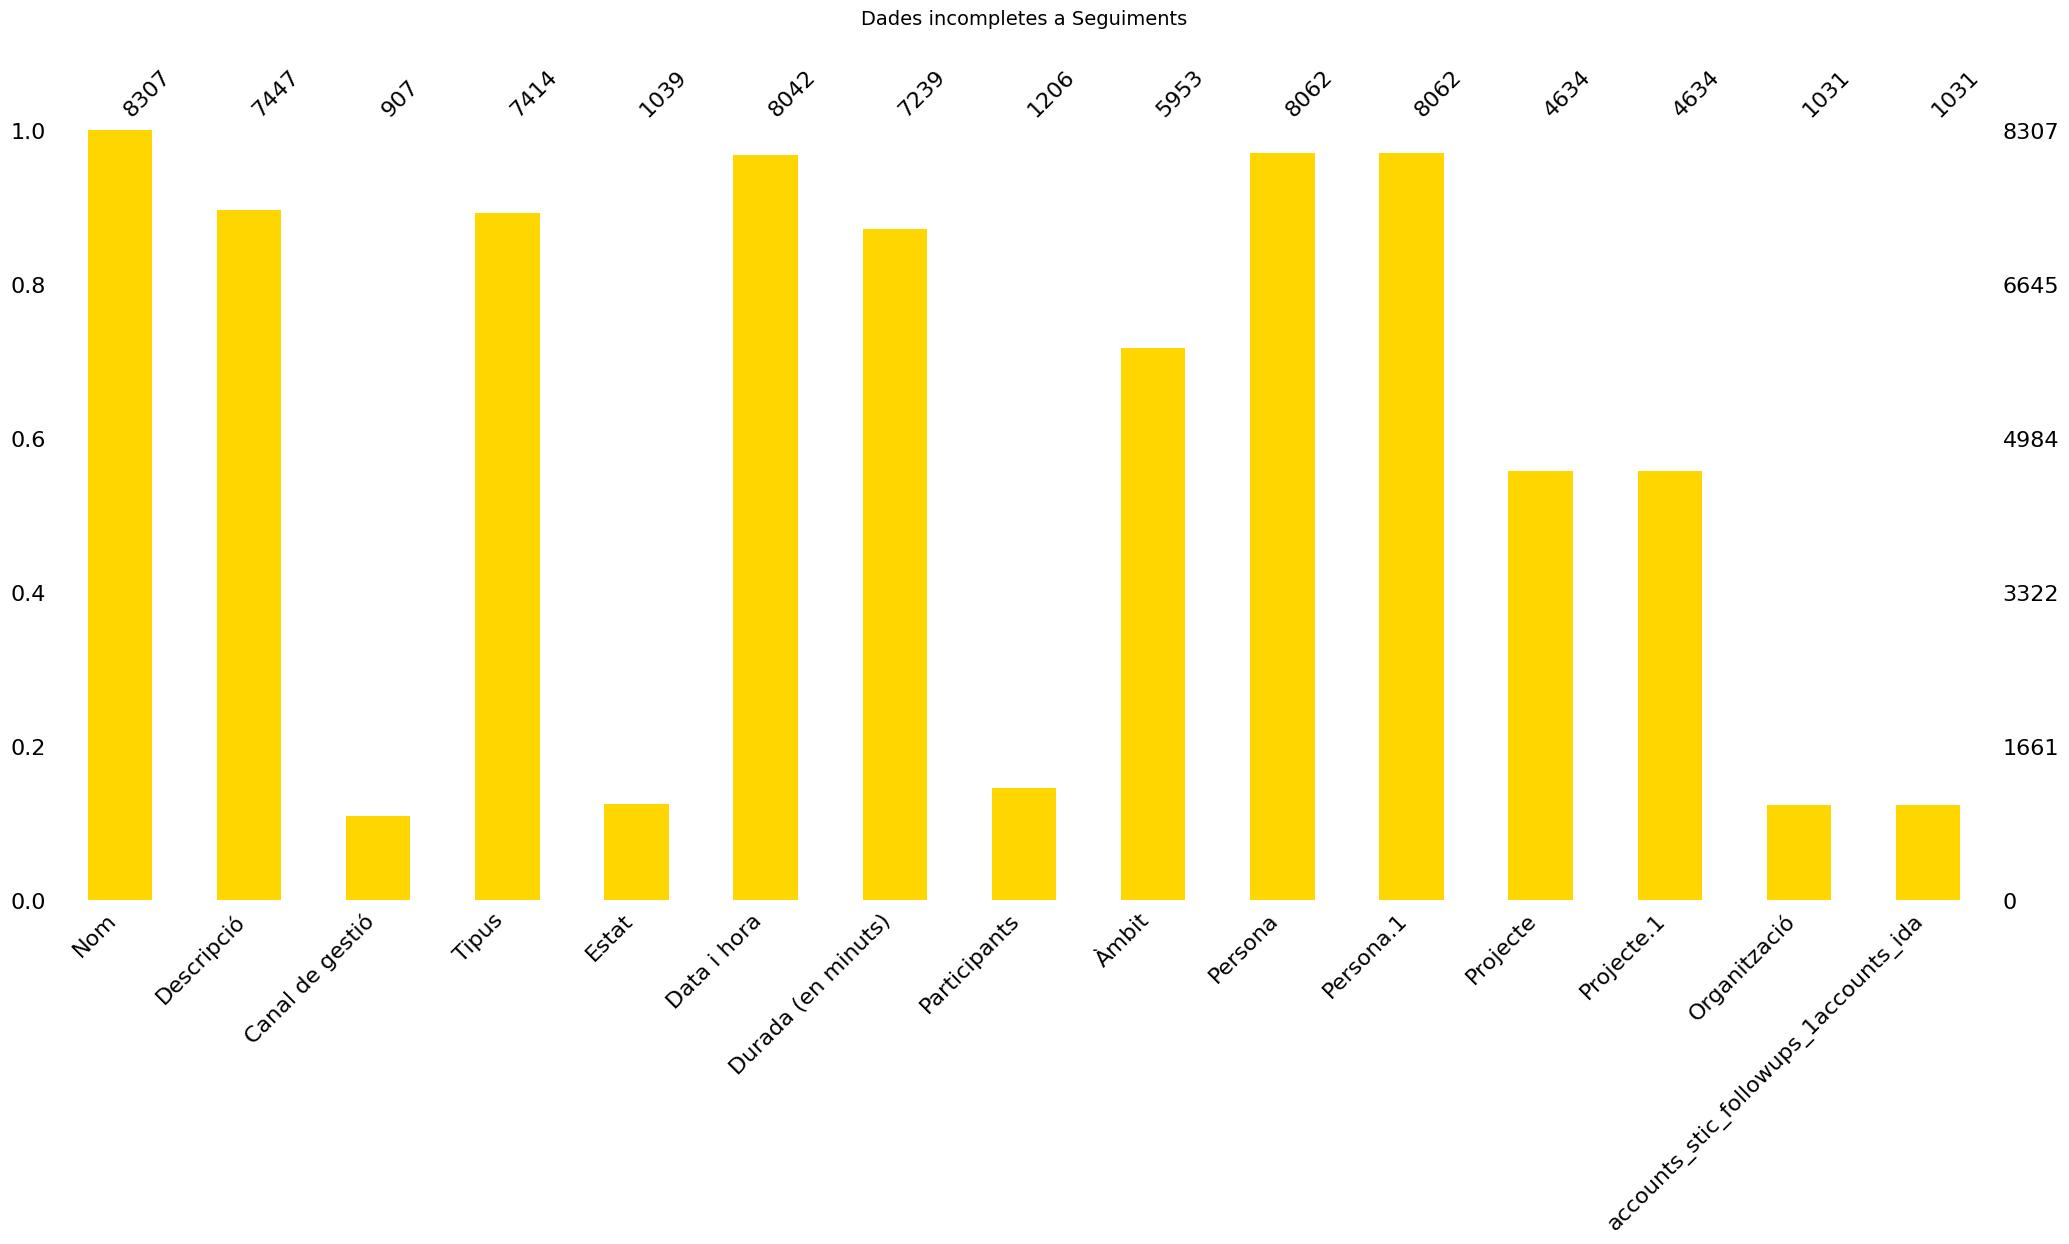

In [67]:
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager


# Obtén la lista de columnas que cumplen la condición de tener un máximo del 90% de valores nulos
selected_columns = []
for column in df.columns:
    null_percentage = df[column].isnull().mean()
    if null_percentage <= 0.9:
        selected_columns.append(column)

# Filtra el DataFrame original solo para las columnas seleccionadas
filtered_df = df[selected_columns]

# Elimina las columnas específicas que existan en el DataFrame
columns_to_exclude = ['ID', 'Usuari Assignat', 'Data de Creació', 'Última Modificació', 'Creat Per', 'Modificat Per',
                      'Eliminat', 'Gestió ACAPPS', 'Modificat Per Nom', 'modified_by_name_owner','Assignat a', 'Assignat a (ID)',
                      'modified_by_name_mod', 'Creat Per.1', 'created_by_name_owner', 'created_by_name_mod',
                      'assigned_user_name_owner', 'assigned_user_name_mod', 'No trucar', 'Data de Creació','stic_dades_formatives_contactscontacts_ida',
                      'Data de Modificació', 'Modificat per', 'Creat per', 'Eliminat', 'Compta desactivada','stic_experiencia_laboral_contactscontacts_ida',
                      'Tipus de portal d\'usuari', 'Suprimit', 'Modificat per.1', 'modified_by_name_mod', 'Creat per.1',
                      'created_by_name_mod', 'assigned_user_name_mod']

filtered_df = filtered_df.drop(columns=[col for col in columns_to_exclude if col in filtered_df])
font_prop = font_manager.FontProperties(family='Agrandir', size=14)  # Tamaño de fuente ajustable

# Visualiza el número de valores nulos como un gráfico de barras
plt.title('Dades incompletes a Seguiments', fontsize=40, pad=30, fontproperties=font_prop)
msno.bar(filtered_df, color='#ffD600')
plt.show()


In [68]:
#seleccionem columnes amb informació interessant
df=df[['Tipus','Durada (en minuts)','Participants','Persona.1','Canal de gestió','Projecte','Àmbit','Estat']]
df.head()

Tipus  Durada (en minuts)   Participants  \
0          Tramitació                20.0        Família   
1  Entrevista inicial                60.0  Persona atesa   
2          Tramitació                45.0  Persona atesa   
3              Altres                 5.0  Persona atesa   
4          Tramitació                 5.0        Família   

                              Persona.1         Canal de gestió  \
0  608d79c8-45a4-8ef8-7ef7-5bb4a0cc3130                 Telèfon   
1  14d55c40-355c-dd4c-4459-5e0dc50e2155                     NaN   
2  505fc9eb-9f43-7354-1df5-5bb4a039c663  Presencial a l'entitat   
3  5c7050e6-4049-2055-0cef-5f83361fa157       Correu electrònic   
4  217ec157-74cd-8caf-664c-5f06d2bbc38b       Correu electrònic   

                                 Projecte Àmbit      Estat  
0                Acompanyament a famílies   NaN  Realitzat  
1                                     NaN   NaN  Derivat a  
2  Acompanyament a la Persona amb Sordesa   NaN  Realitzat  
3  Acompanyament a la Persona amb Sordesa   NaN  Realitzat  
4                Acompanyament a famílies   NaN  Realitzat

In [69]:
#cambem Persona.1 a ID
df.rename(columns={'Persona.1':'ID'},inplace=True)

In [70]:
#a partir del diccionari creat anteriorment, cambiem la ID per tal d'evitar duplicats
df['ID'] = df['ID'].map(df_dic.set_index('ID')['IDN'])
df.head()

Tipus  Durada (en minuts)   Participants  \
0          Tramitació                20.0        Família   
1  Entrevista inicial                60.0  Persona atesa   
2          Tramitació                45.0  Persona atesa   
3              Altres                 5.0  Persona atesa   
4          Tramitació                 5.0        Família   

                                     ID         Canal de gestió  \
0  608d79c8-45a4-8ef8-7ef7-5bb4a0cc3130                 Telèfon   
1  14d55c40-355c-dd4c-4459-5e0dc50e2155                     NaN   
2  505fc9eb-9f43-7354-1df5-5bb4a039c663  Presencial a l'entitat   
3  5c7050e6-4049-2055-0cef-5f83361fa157       Correu electrònic   
4  217ec157-74cd-8caf-664c-5f06d2bbc38b       Correu electrònic   

                                 Projecte Àmbit      Estat  
0                Acompanyament a famílies   NaN  Realitzat  
1                                     NaN   NaN  Derivat a  
2  Acompanyament a la Persona amb Sordesa   NaN  Realitzat  
3  Acompanyament a la Persona amb Sordesa   NaN  Realitzat  
4                Acompanyament a famílies   NaN  Realitzat

<Axes: title={'center': 'Dades incompletes a Seguiments'}>

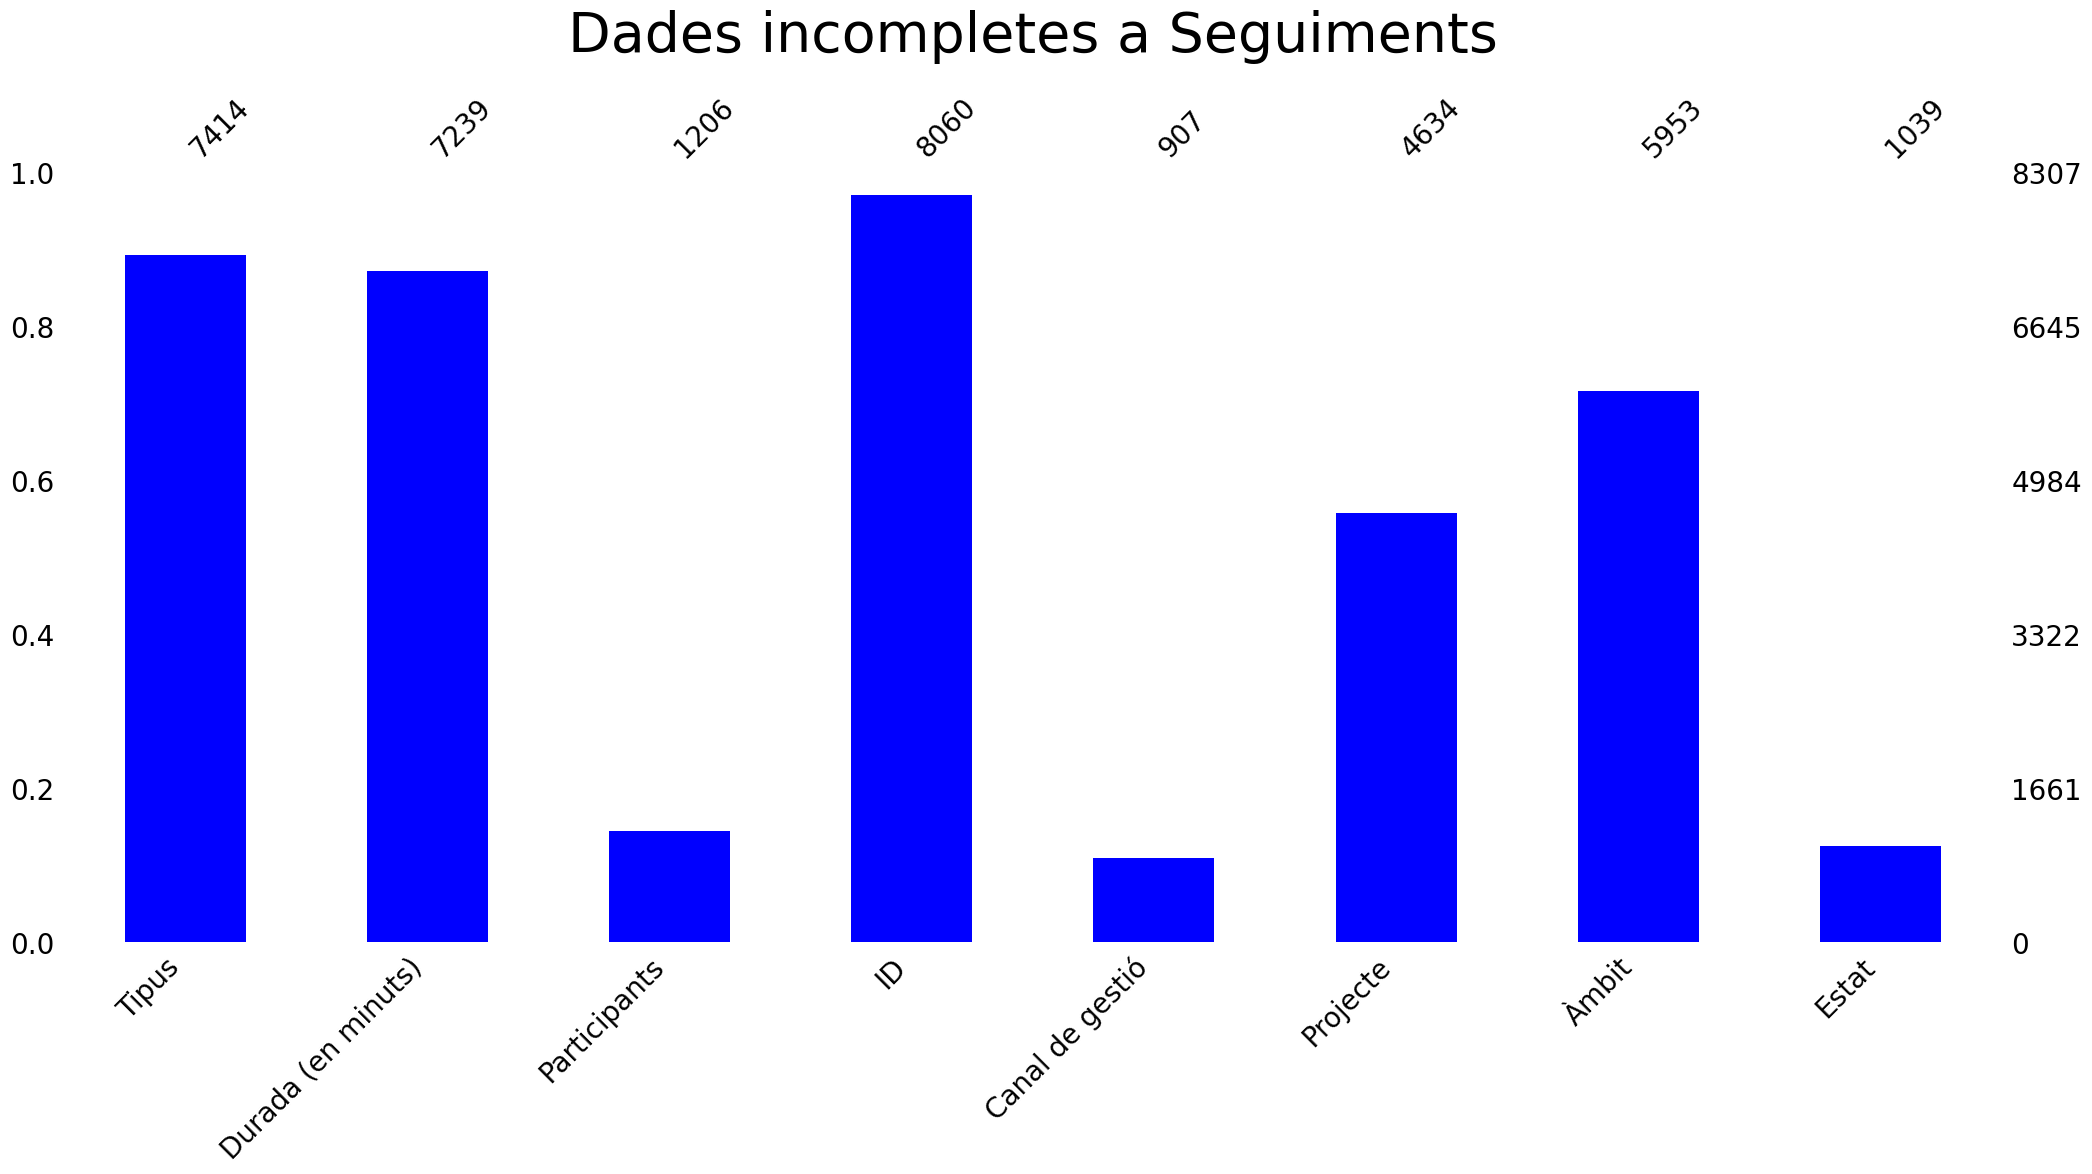

In [71]:
#detectem el nombre de dades inclompletes
import missingno as msno
import matplotlib.pyplot as plt
# Visualize the number of missing values as a bar chart
plt.title('Dades incompletes a Seguiments',fontsize=40, pad=30)
msno.bar(df, color='b',fontsize=20)

In [72]:
#percentatge de valors 0 a Durada en minuts, ens serveix per detectar possibles nans a la columna
(df['Durada (en minuts)'] == 0).sum()/df.shape[0]*100


59.0465872156013

Degut a la baixa quantitat de dades recollides de diferents variables i que el 59% de les dades de la durada és 0,ens quedem només amb les columnes ID i Tipus

In [73]:
#seleccionem columnes
df=df[['ID','Tipus']]

No ens interessa tant el tipus de seguiment que ha realitzat la persona com la quanitat de seguiments que ha realizat

In [74]:
#creem columna amb quantitat de sessions per ID
counts = df['ID'].value_counts()
df['Quantitat seguiments'] = df['ID'].map(counts)

In [75]:
#eliminem la columna Tipus
df=df[['ID','Quantitat seguiments']]

In [76]:
#eliminem dupicats per ID
df.drop_duplicates(subset='ID',keep='first',inplace=True)
df.head()

ID  Quantitat seguiments
0  608d79c8-45a4-8ef8-7ef7-5bb4a0cc3130                   1.0
1  14d55c40-355c-dd4c-4459-5e0dc50e2155                  29.0
2  505fc9eb-9f43-7354-1df5-5bb4a039c663                   3.0
3  5c7050e6-4049-2055-0cef-5f83361fa157                   7.0
4  217ec157-74cd-8caf-664c-5f06d2bbc38b                   6.0

In [77]:
#eliminar nulls a la columna ID
df.dropna(subset=['ID'],inplace=True)

In [78]:
#pasar df a csv
df.to_csv ('Seguiments_final.csv',index=False,encoding='utf-8')

Aquesta base de dades recull les diferents candidatures a llocs de feina i quina persona hi ha accedit.

En aquest cas mantenim tan sols la columna **ata d’inici de contracte** més recent per posteriorment calcular el temps que ha trigat la persona a trobar feina.

In [79]:
import pandas as pd

In [80]:
df=pd.read_csv ('Candidatures.csv',encoding='utf-8',sep=';')
df_dic=pd.read_csv('Dict.csv',encoding='utf-8',sep=',')

In [81]:
# Obtén el nombre de las columnas sin valores nulos
columns_without_nans = df.columns[df.notnull().all()]

# Imprime el nombre de las columnas sin valores nulos
for column in columns_without_nans:
    print(column)


Nom
ID
Assignat a
Assignat a (ID)
Data de Creació
Data de Modificació
Creat per
Modificat per
Suprimit
Estat
Modificat per.1
modified_by_name_owner
modified_by_name_mod
Creat per.1
created_by_name_owner
created_by_name_mod
assigned_user_name_owner
assigned_user_name_mod


findfont: Font family 'Agrandir' not found.
findfont: Font family 'Agrandir' not found.
findfont: Font family 'Agrandir' not found.
findfont: Font family 'Agrandir' not found.
findfont: Font family 'Agrandir' not found.


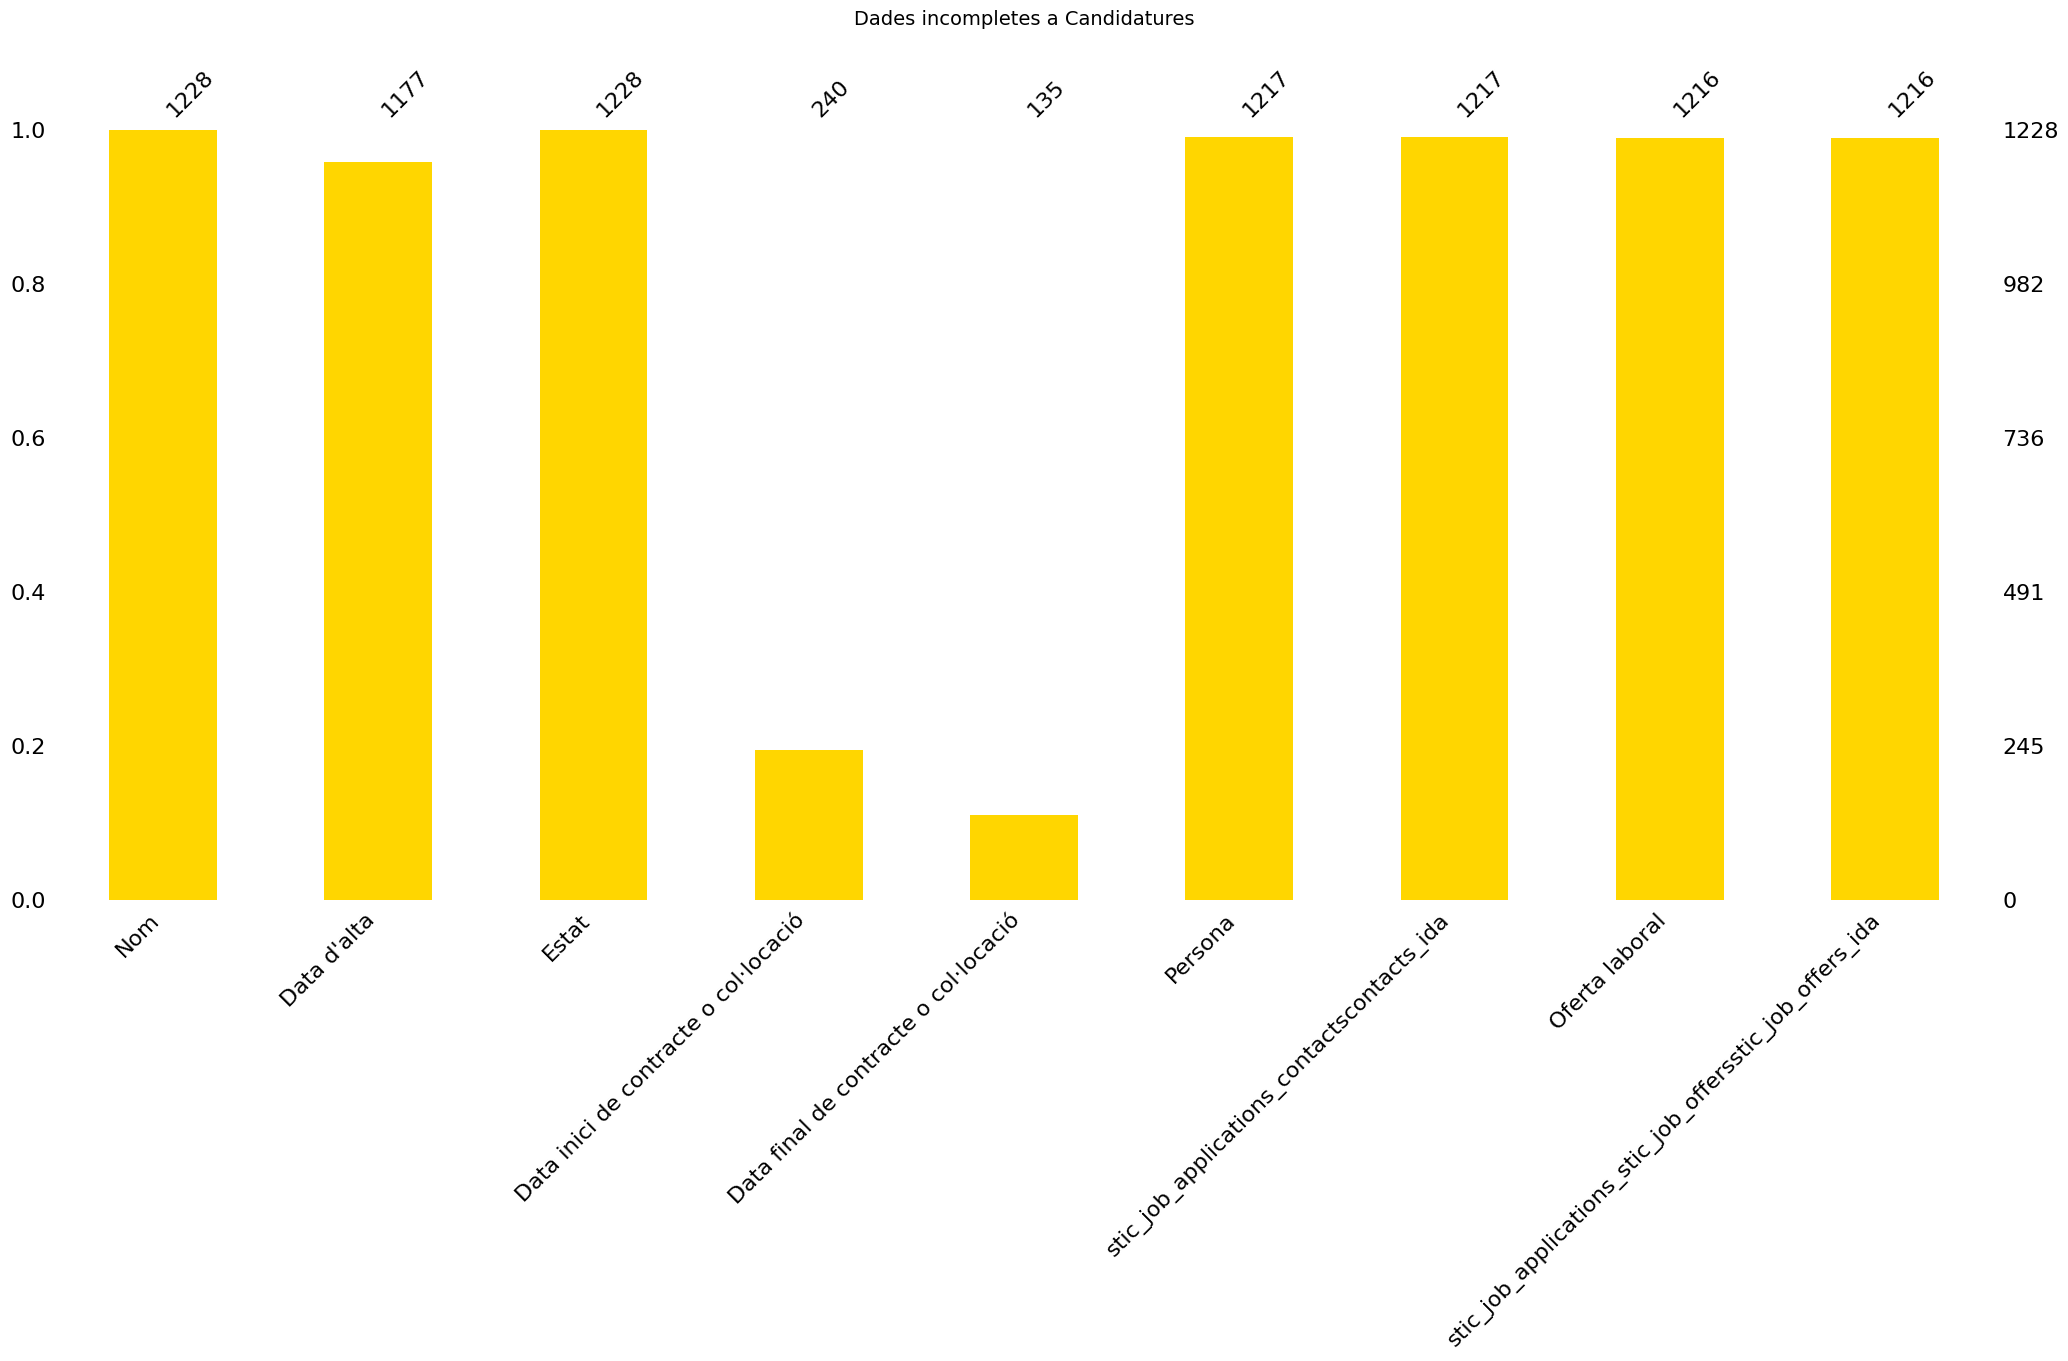

In [82]:
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager


# Obtén la lista de columnas que cumplen la condición de tener un máximo del 90% de valores nulos
selected_columns = []
for column in df.columns:
    null_percentage = df[column].isnull().mean()
    if null_percentage <= 0.9:
        selected_columns.append(column)

# Filtra el DataFrame original solo para las columnas seleccionadas
filtered_df = df[selected_columns]

# Elimina las columnas específicas que existan en el DataFrame
columns_to_exclude = ['ID', 'Usuari Assignat', 'Data de Creació', 'Última Modificació', 'Creat Per', 'Modificat Per',
                      'Eliminat', 'Gestió ACAPPS', 'Modificat Per Nom', 'modified_by_name_owner','Assignat a', 'Assignat a (ID)',
                      'modified_by_name_mod', 'Creat Per.1', 'created_by_name_owner', 'created_by_name_mod',
                      'assigned_user_name_owner', 'assigned_user_name_mod', 'No trucar', 'Data de Creació','stic_dades_formatives_contactscontacts_ida',
                      'Data de Modificació', 'Modificat per', 'Creat per', 'Eliminat', 'Compta desactivada','stic_experiencia_laboral_contactscontacts_ida',
                      'Tipus de portal d\'usuari', 'Suprimit', 'Modificat per.1', 'modified_by_name_mod', 'Creat per.1',
                      'created_by_name_mod', 'assigned_user_name_mod']

filtered_df = filtered_df.drop(columns=[col for col in columns_to_exclude if col in filtered_df])
font_prop = font_manager.FontProperties(family='Agrandir', size=14)  # Tamaño de fuente ajustable

# Visualiza el número de valores nulos como un gráfico de barras
plt.title('Dades incompletes a Candidatures', fontsize=40, pad=30, fontproperties=font_prop)
msno.bar(filtered_df, color='#ffD600')
plt.show()


In [83]:
#seleccionem columnes
df=df[['stic_job_applications_contactscontacts_ida','Estat','Data inici de contracte o col·locació']]
df.head()

stic_job_applications_contactscontacts_ida                 Estat  \
0       704479ea-d2a7-181c-b77b-5db827b9a0ea             Acceptada   
1       1d7ef175-9a25-2d41-3f92-5ebcfb9c2d92             Acceptada   
2       d7366cf1-3ddd-9d0f-8809-5db6c6aab2e3             Acceptada   
3       1c7da56d-7fe8-9075-871e-5e0dc54da398            Presentada   
4       c1142452-aaf4-4e8b-dd93-5fd336468e08  Prevista presentació   

  Data inici de contracte o col·locació  
0                            19/11/2018  
1                            22/04/2021  
2                            31/12/2019  
3                                   NaN  
4                                   NaN

In [84]:
#cambiar nombre stic_job_applications_contactscontacts_ida a ID
df.rename(columns={'stic_job_applications_contactscontacts_ida':'ID'},inplace=True)


In [85]:
#a partir del diccionari creat anteriorment, cambiem la ID per tal d'evitar duplicats
df['ID'] = df['ID'].map(df_dic.set_index('ID')['IDN'])
df.head()

ID                 Estat  \
0  704479ea-d2a7-181c-b77b-5db827b9a0ea             Acceptada   
1  1d7ef175-9a25-2d41-3f92-5ebcfb9c2d92             Acceptada   
2  d7366cf1-3ddd-9d0f-8809-5db6c6aab2e3             Acceptada   
3  1c7da56d-7fe8-9075-871e-5e0dc54da398            Presentada   
4  c1142452-aaf4-4e8b-dd93-5fd336468e08  Prevista presentació   

  Data inici de contracte o col·locació  
0                            19/11/2018  
1                            22/04/2021  
2                            31/12/2019  
3                                   NaN  
4                                   NaN

Ja que hi ha diferents estats en que pot estar una candidatura seleccionarem només aquelles acceptades ja que representen les ofertes de feina a les quals s'ha presentat una persona i que ha guanyat la plaça

In [86]:
#seleccionem files amb estat = Acceptada en df per escollir les dades de candidatures acceptades i eliminem la columna
df=df[df['Estat']=='Acceptada']
df=df[['ID', 'Data inici de contracte o col·locació']]

<Axes: title={'center': 'Dades incompletes a Candidatures'}>

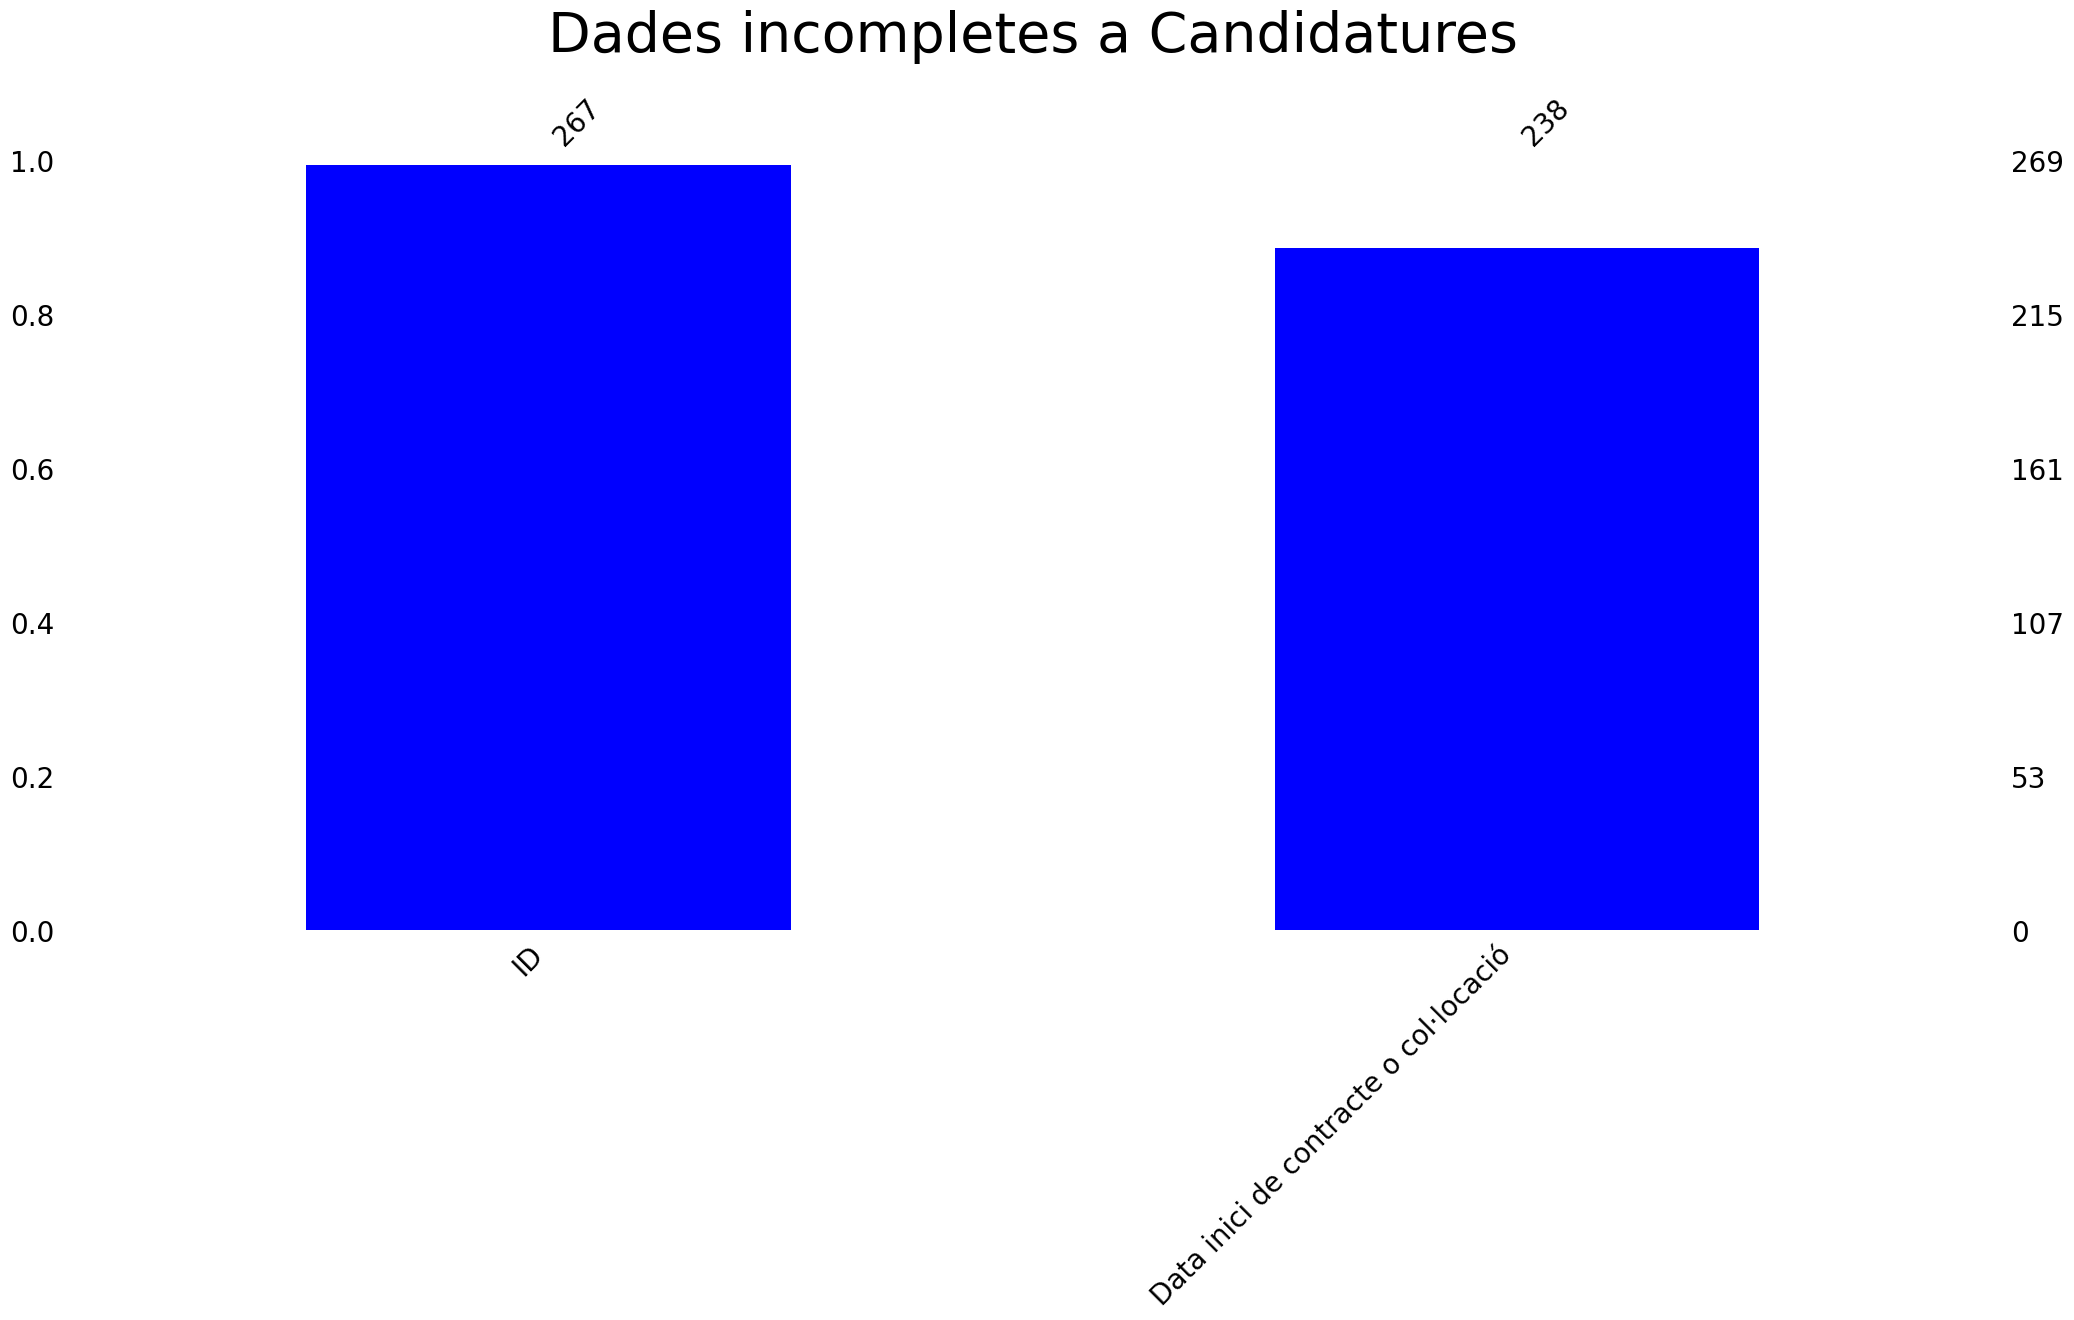

In [87]:
#detectem el nombre de dades inclompletes
import missingno as msno
import matplotlib.pyplot as plt
# Visualize the number of missing values as a bar chart
plt.title('Dades incompletes a Candidatures',fontsize=40, pad=30)
msno.bar(df, color='b',fontsize=20)

In [88]:
#eliminar nulls a Data inici de contracte
df=df.dropna(subset=['Data inici de contracte o col·locació'])

In [89]:
#eliminem files amb nulls a ID
df=df.dropna(subset=['ID'])


In [90]:
#Data inici de contracte o col·locació a datatime
df['Data inici de contracte o col·locació']=pd.to_datetime(df['Data inici de contracte o col·locació'])

/tmp/ipykernel_35743/1420689585.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Data inici de contracte o col·locació']=pd.to_datetime(df['Data inici de contracte o col·locació'])


Per tal de recollir la última data d'inici de contracte mantindrem només la més recent

In [91]:
#Mantenim els valors de Data inici de contracte o col·locació més recent
#ordenem per Data inici de contracte o col·locació
df = df.sort_values(by=['ID', 'Data inici de contracte o col·locació'], ascending=False)

In [92]:
# Eliminem els duplicats, mantenint només el primer registre
df = df.drop_duplicates(subset=['ID'], keep='first') 

In [93]:
#seleccionem columnes
df=df[[ 'ID','Data inici de contracte o col·locació']]

In [94]:
df.head()

ID  \
954   f3df28a7-263c-adc9-b014-5df777fa7700   
955   f239a3c4-c428-3ce1-ec5a-5ce6862fc33c   
1100  ee94feb1-9faf-014c-7827-620508e2e108   
749   e3e8045e-e684-b056-3187-5bf7c92c95f0   
338   e159ebc7-8ae6-7d4e-d55b-5e0dc54d0640   

     Data inici de contracte o col·locació  
954                             2022-05-15  
955                             2022-05-23  
1100                            2022-10-24  
749                             2022-03-21  
338                             2019-09-17

In [95]:
#pasar df a csv
df.to_csv ('Candidatures_final.csv',index=False,encoding='utf-8')

Aquesta base de dades recull en quins projectes de l’entitat han estat relacionades les persones, incloent la data d’alta i baixa dels mencionats projectes.

Escollim la columna data d’alta, ja que és la que ens permetrà analitzar el temps que ha trigat la persona a trobar feina.

Hem escollit la data d'alta més recent per calcular posteriorment el temps que triga una persona a trobar feina


In [96]:
import pandas as pd

In [97]:
df=pd.read_csv('Relacions amb Persones.csv',encoding='utf-8',sep=';')
df_dic=pd.read_csv('Dict.csv',encoding='utf-8',sep=',')

In [98]:
# Obtén el nombre de las columnas sin valores nulos
columns_without_nans = df.columns[df.notnull().all()]

# Imprime el nombre de las columnas sin valores nulos
for column in columns_without_nans:
    print(column)

Nom
ID
Data de Creació
Data de Modificació
Creat per
Modificat per
Suprimit
Tipus de relació
Actiu
Modificat per.1
modified_by_name_mod
Creat per.1
created_by_name_mod
assigned_user_name_mod


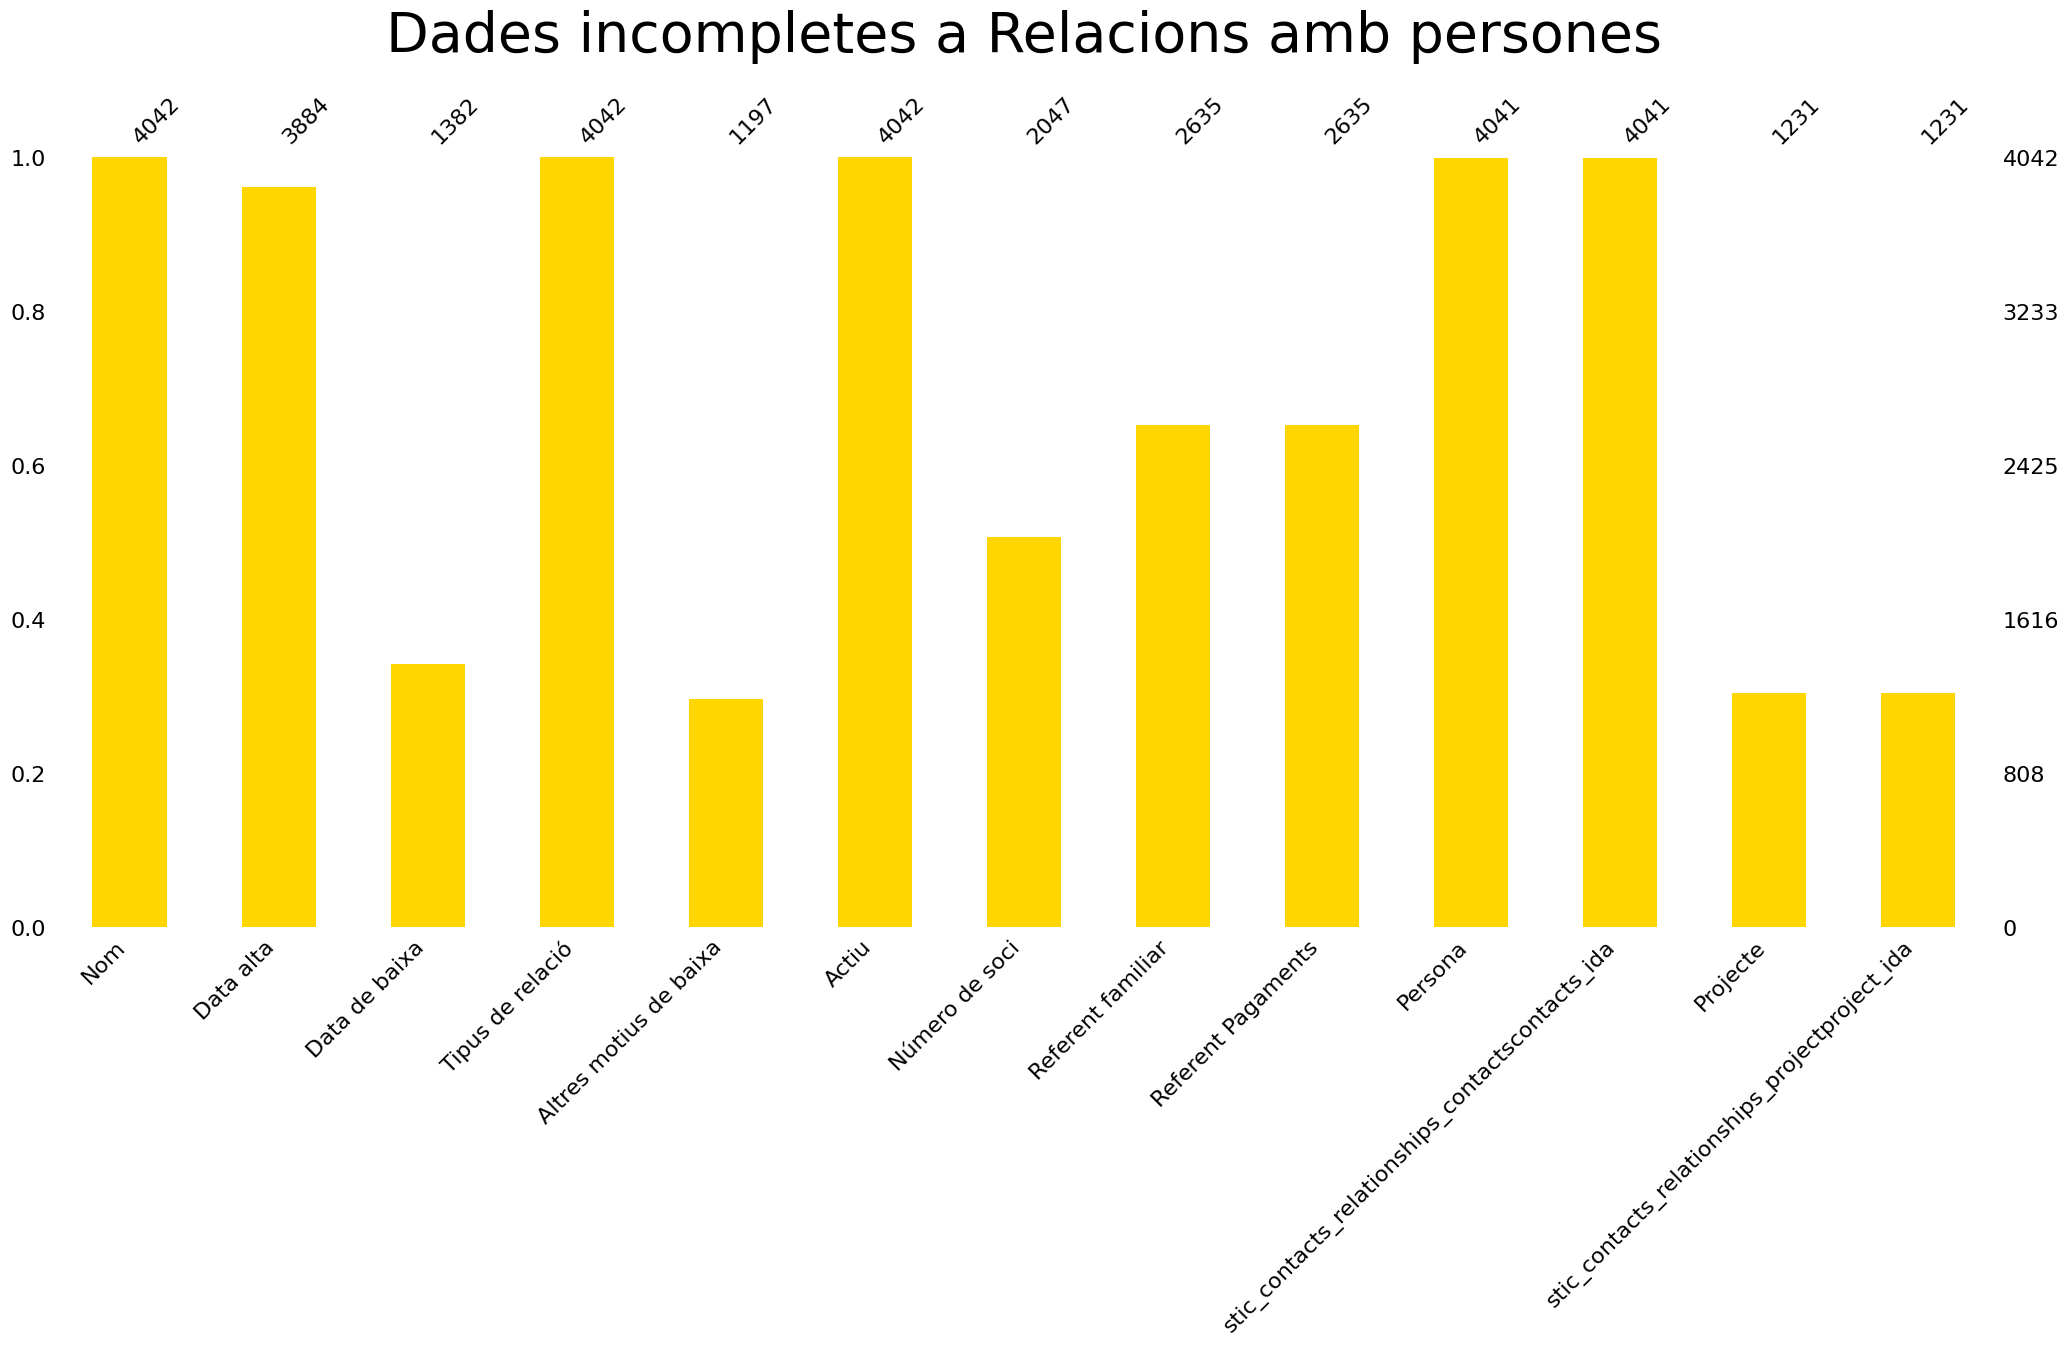

In [99]:
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager


# Obtén la lista de columnas que cumplen la condición de tener un máximo del 90% de valores nulos
selected_columns = []
for column in df.columns:
    null_percentage = df[column].isnull().mean()
    if null_percentage <= 0.9:
        selected_columns.append(column)

# Filtra el DataFrame original solo para las columnas seleccionadas
filtered_df = df[selected_columns]

# Elimina las columnas específicas que existan en el DataFrame
columns_to_exclude = ['ID', 'Usuari Assignat', 'Data de Creació', 'Última Modificació', 'Creat Per', 'Modificat Per',
                      'Eliminat', 'Gestió ACAPPS', 'Modificat Per Nom', 'modified_by_name_owner','Assignat a', 'Assignat a (ID)',
                      'modified_by_name_mod', 'Creat Per.1', 'created_by_name_owner', 'created_by_name_mod',
                      'assigned_user_name_owner', 'assigned_user_name_mod', 'No trucar', 'Data de Creació','stic_dades_formatives_contactscontacts_ida',
                      'Data de Modificació', 'Modificat per', 'Creat per', 'Eliminat', 'Compta desactivada','stic_experiencia_laboral_contactscontacts_ida',
                      'Tipus de portal d\'usuari', 'Suprimit', 'Modificat per.1', 'modified_by_name_mod', 'Creat per.1',
                      'created_by_name_mod', 'assigned_user_name_mod']

filtered_df = filtered_df.drop(columns=[col for col in columns_to_exclude if col in filtered_df])

# Visualiza el número de valores nulos como un gráfico de barras
plt.title('Dades incompletes a Relacions amb persones', fontsize=40, pad=30)
msno.bar(filtered_df, color='#ffD600')
plt.show()


In [100]:
#seleccionem columnes
df=df[['stic_contacts_relationships_contactscontacts_ida','Data alta','Tipus de relació']]
df.head()

stic_contacts_relationships_contactscontacts_ida   Data alta  \
0             7011976b-a6e9-2a99-518e-5bb49fd88dad         NaN   
1             7b5a0c72-e23a-2d2c-e977-5bb49f4871c6         NaN   
2             80142d92-50e0-ec6a-9700-5bb49fc13f0d  04/11/2015   
3             84be3325-c46b-4095-6934-5bb49fd40811  17/05/2012   
4             896e2b3d-6b79-9f39-98ee-5bb49f55ad4f  17/05/2012   

                     Tipus de relació  
0         Persones Sòcies Individuals  
1         Persones Sòcies Individuals  
2         Persones Sòcies Individuals  
3  Persones Sòcies Familiars (Entorn)  
4  Persones Sòcies Familiars (Entorn)

In [101]:
#renombrar stic_contacts_relationships_contactscontacts_ida a ID
df.rename(columns={'stic_contacts_relationships_contactscontacts_ida':'ID'},inplace=True)

In [102]:
#a partir del diccionari creat anteriorment, cambiem la ID per tal d'evitar duplicats
df['ID'] = df['ID'].map(df_dic.set_index('ID')['IDN'])
df.head()

ID   Data alta  \
0  7011976b-a6e9-2a99-518e-5bb49fd88dad         NaN   
1  7b5a0c72-e23a-2d2c-e977-5bb49f4871c6         NaN   
2  80142d92-50e0-ec6a-9700-5bb49fc13f0d  04/11/2015   
3  84be3325-c46b-4095-6934-5bb49fd40811  17/05/2012   
4  896e2b3d-6b79-9f39-98ee-5bb49f55ad4f  17/05/2012   

                     Tipus de relació  
0         Persones Sòcies Individuals  
1         Persones Sòcies Individuals  
2         Persones Sòcies Individuals  
3  Persones Sòcies Familiars (Entorn)  
4  Persones Sòcies Familiars (Entorn)

In [103]:
#eliminar nulls a Data alta
df=df.dropna(subset=['Data alta'])

In [104]:
from datetime import datetime


# Convertim la columna "Data alta" a format "any/mes/dia"
df['Data alta'] = df['Data alta'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y').strftime('%Y/%m/%d'))

df.head()


ID   Data alta  \
2  80142d92-50e0-ec6a-9700-5bb49fc13f0d  2015/11/04   
3  84be3325-c46b-4095-6934-5bb49fd40811  2012/05/17   
4  896e2b3d-6b79-9f39-98ee-5bb49f55ad4f  2012/05/17   
5  8e5be378-556c-cb29-d414-5bb49f67ccd4  2012/05/17   
6  934bb5e9-4e0d-3ad2-2518-5bb49fb95005  2012/05/17   

                     Tipus de relació  
2         Persones Sòcies Individuals  
3  Persones Sòcies Familiars (Entorn)  
4  Persones Sòcies Familiars (Entorn)  
5   Persones Sòcies Familiars (Nucli)  
6     Persona Socia Familiar(Titular)

In [105]:
#df a csv
df.to_csv('Relacions_final.csv',index=False)

En aquest cas hem unit els csv creats anteriorment (Persones, Discapacitat, Formació, Experiència laboral, Seguiments, Candidatures, Relacions amb persones) creant un nou csv amb una entrada per persona. 

S'han creat dos csv més, on s'inclou les persones pertanyents al servei d'inserció laboral (SAES) i un altre on s'inclou les persones pertanyents al servei d'inserció laboral que tenen registrada una data d'inici de contracte, la qual cosa ens permet treballar per a fer la previsió del temps que trigaran a trobar feina.

In [106]:
import pandas as pd

Importem els datasets creats anteriorment

In [107]:
df_persones=pd.read_csv('dades_persones_final.csv',encoding='utf-8')
df_persones.head()

ID Adreça principal - Codi postal  \
0  10031d51-3654-6bdd-ad97-5f69f0cdf888                          08172   
1  100bd161-388c-f2d6-36b5-6054936fb1e4                            NaN   
2  100cad7c-e055-a06d-8770-5e0dc51435f4                            NaN   
3  101ebe57-34cd-a613-32e2-5bb4a0f4213e                          08020   
4  10282577-d5e4-2335-86d9-5bb49fa12f90                          08072   

  Adreça principal - Població Data Naixement   Gènere Tipus d'identificació  \
0       SANT CUGAT DEL VALLES     03/03/1979   Femení                   NIF   
1                         NaN            NaN      NaN                   NaN   
2                         NaN     12/01/2016      NaN                   NaN   
3                   BARCELONA     07/06/1962  Masculí                   NIF   
4       SANT FRUITOS DE BAGES     10/06/1981  Masculí                   NaN   

  Tipus de relacions actuals Vinculació discapacitat auditiva  \
0           Participant SAES                       Afectat/da   
1                        NaN                              NaN   
2                        NaN                       Afectat/da   
3          Persones Usuàries                              NaN   
4                        NaN                              NaN   

   Nº persones a unitat familiar  
0                            NaN  
1                            NaN  
2                            NaN  
3                            1.0  
4                            4.0

In [108]:
df_discapacitat=pd.read_csv('dades_discapacitat_final.csv',encoding='utf-8')
df_discapacitat.head()

ID Té certificat CAD  \
0  10031d51-3654-6bdd-ad97-5f69f0cdf888                Sí   
1  100cad7c-e055-a06d-8770-5e0dc51435f4                No   
2  101ebe57-34cd-a613-32e2-5bb4a0f4213e               NaN   
3  1092f675-085b-7bab-684e-5e0dc5cd578f                No   
4  10d07499-2ea4-2962-1c0a-5e0dc583cf10                No   

   % Grau Discapacitat  Temps CAD     On sordesa Rep ajut econòmic?  \
0                 33.0        NaN            NaN                 No   
1                  0.0  Permanent            NaN                 Sí   
2                 65.0  Permanent  Unilateral OD                NaN   
3                  0.0  Permanent            NaN                 Sí   
4                  0.0  Permanent            NaN                 Sí   

  Presenta pluridiscapacitat? Tipus pluridiscapacitat Pren medicació  \
0                          No                     NaN            NaN   
1                          Sí                     NaN             Sí   
2                          Sí                  Física            NaN   
3                          Sí                     NaN             Sí   
4                          Sí                     NaN             Sí   

  Tipus de sordesa Moment apareix sordesa Quan inici pèrdua  \
0   Neurosensorial            Prelocutiva               NaN   
1   Neurosensorial            Prelocutiva               NaN   
2              NaN           Postlocutiva               NaN   
3              NaN                    NaN               NaN   
4       Conductiva           Postlocutiva               NaN   

  Causa pèrdua auditiva Porta audiòfon? Porta implant coclear?  \
0           Desconeguda              Sí                    NaN   
1                   NaN              Sí                     No   
2             Adquirida              Sí                     No   
3                   NaN              Sí                     No   
4                   NaN              Sí                     No   

  On implant coclear Sistema de comunicació  \
0                NaN                   Oral   
1                NaN                    NaN   
2                NaN                   Oral   
3                NaN                    NaN   
4                NaN                    NaN   

  Hospital o consulta que fa seguiment  
0                                  NaN  
1                     SANT JOAND E DEU  
2                                  NaN  
3                                  NaN  
4       Hospital Municipal de Badalona

In [109]:
df_formatives=pd.read_csv('dades_formatives_f.csv')
df_formatives.head()

ID            Nivell formatiu  \
0  10031d51-3654-6bdd-ad97-5f69f0cdf888  Educació Primària (i EGB)   
1  118cbd91-8e15-1a15-b3e3-5f6b37902fff      Formació Professional   
2  129f1ccc-bcb6-1e15-b3d3-621c846a594f      Formació Professional   
3  12cb5f09-14e2-185e-ee1d-5f69c44f499a  Educació Primària (i EGB)   
4  130f8822-368d-f3d8-f843-5da710debfb2                Universitat   

  Tipologia Centre formació Fa logopèdia Tipus comunicació al centre  \
0                       NaN          NaN                        Oral   
1                       NaN          NaN           Llengua de signes   
2                       NaN          NaN                         NaN   
3                 Concertat           Sí                        Oral   
4                       NaN          NaN                        Oral   

  Localitat Centre formació  
0     SANT CUGAT DEL VALLÈS  
1                       NaN  
2                       NaN  
3    SANTA COLOMA DE FARNES  
4                       NaN

In [110]:
df_experiencia=pd.read_csv('experiencia_laboral_final.csv')
df_experiencia.head()

ID Data incorporació mercat laboral  \
0  1350ea25-b70f-e703-8caa-5bf42e3dfcf9                       1973-01-01   
1  73cdac6b-08ba-a222-a40c-5e1c7f019eba                       1984-01-01   
2  3a3d06c2-bb7c-8950-f1c6-5bf42e2462bb                       1987-02-02   
3  39f4a1f5-2888-c6f3-08a5-6045f9ae0c08                       1988-01-01   
4  c048bc39-7722-1cb8-9fc7-5ee8e1447f18                       1988-03-01   

   Temps total experiència  Nombre d'experiències  
0                  17531.0                      3  
1                   6511.0                      2  
2                  11658.0                      3  
3                  14244.0                      2  
4                  11441.0                      2

df_assistencies=pd.read_csv('Assistències_sessions_final.csv')
df_assistencies.head()

In [111]:
df_seguiments=pd.read_csv('Seguiments_final.csv')
df_seguiments.head()

ID  Quantitat seguiments
0  608d79c8-45a4-8ef8-7ef7-5bb4a0cc3130                   1.0
1  14d55c40-355c-dd4c-4459-5e0dc50e2155                  29.0
2  505fc9eb-9f43-7354-1df5-5bb4a039c663                   3.0
3  5c7050e6-4049-2055-0cef-5f83361fa157                   7.0
4  217ec157-74cd-8caf-664c-5f06d2bbc38b                   6.0

In [112]:
df_candidatures=pd.read_csv('Candidatures_final.csv')
df_candidatures.head()

ID Data inici de contracte o col·locació
0  f3df28a7-263c-adc9-b014-5df777fa7700                            2022-05-15
1  f239a3c4-c428-3ce1-ec5a-5ce6862fc33c                            2022-05-23
2  ee94feb1-9faf-014c-7827-620508e2e108                            2022-10-24
3  e3e8045e-e684-b056-3187-5bf7c92c95f0                            2022-03-21
4  e159ebc7-8ae6-7d4e-d55b-5e0dc54d0640                            2019-09-17

In [113]:
df_relacions=pd.read_csv('Relacions_final.csv')
df_relacions.head()

ID   Data alta  \
0  80142d92-50e0-ec6a-9700-5bb49fc13f0d  2015/11/04   
1  84be3325-c46b-4095-6934-5bb49fd40811  2012/05/17   
2  896e2b3d-6b79-9f39-98ee-5bb49f55ad4f  2012/05/17   
3  8e5be378-556c-cb29-d414-5bb49f67ccd4  2012/05/17   
4  934bb5e9-4e0d-3ad2-2518-5bb49fb95005  2012/05/17   

                     Tipus de relació  
0         Persones Sòcies Individuals  
1  Persones Sòcies Familiars (Entorn)  
2  Persones Sòcies Familiars (Entorn)  
3   Persones Sòcies Familiars (Nucli)  
4     Persona Socia Familiar(Titular)

Unim els df relacions i candidatures per a calcular el temps que triga una persona a trobar feina

In [114]:
df=df_relacions.merge(df_candidatures, on="ID", how="left")
df.head()

ID   Data alta  \
0  80142d92-50e0-ec6a-9700-5bb49fc13f0d  2015/11/04   
1  84be3325-c46b-4095-6934-5bb49fd40811  2012/05/17   
2  896e2b3d-6b79-9f39-98ee-5bb49f55ad4f  2012/05/17   
3  8e5be378-556c-cb29-d414-5bb49f67ccd4  2012/05/17   
4  934bb5e9-4e0d-3ad2-2518-5bb49fb95005  2012/05/17   

                     Tipus de relació Data inici de contracte o col·locació  
0         Persones Sòcies Individuals                                   NaN  
1  Persones Sòcies Familiars (Entorn)                                   NaN  
2  Persones Sòcies Familiars (Entorn)                                   NaN  
3   Persones Sòcies Familiars (Nucli)                                   NaN  
4     Persona Socia Familiar(Titular)                                   NaN

Per tal de quedar-nos amb les últimes insercions i les dates d'inici anteriors a aquesta, eliminem les entrades en què Data inici és major a Data alta i eliminem duplicats quedant-nos amb la data d'alta més recent

In [115]:
#ordenar df por Data alta
df.sort_values(by="Data alta",ascending=False, inplace=True)
df.head(25)

ID   Data alta  \
525   b93875b5-6468-b60f-a1d0-63f5c61ed242  2023/03/10   
1299  1bca6d1c-9480-34ba-1bd6-5c2dfdc5e023  2023/03/09   
1319  1af61f54-2699-f38d-4102-5bb4a0783060  2023/03/09   
1802  262fa50b-9a6e-26c3-5757-6368cb645f27  2023/03/08   
1797  adb6d4fe-b48e-bfb5-10b9-5bf44312e2c3  2023/03/08   
1796  6e7b74d8-4a00-5c75-6c11-640887c5d97a  2023/03/08   
2311  c14e5070-5e64-999c-6115-5c6a8ada999f  2023/03/07   
3186                                   NaN  2023/03/07   
2591  8ac4d672-7025-6685-87d9-6405bf9ed654  2023/03/07   
2636  b5de2643-2a41-473b-e40e-6357f85f57b4  2023/03/07   
3190  5fa63af9-ad6f-8d3c-d48c-63bc03c2cd7c  2023/03/06   
3416  45752278-9939-7269-585f-640604e6daff  2023/03/06   
3286  1d1b28e9-7b1f-b22c-1bd0-63dbea3789d1  2023/03/06   
3266  54fd6fae-3615-d2b7-b676-640603ef26a3  2023/03/06   
3582  23860d8a-61be-65a3-b635-63fdd2b22ae5  2023/03/03   
3594  90b3fcff-fdea-4e9f-01d6-6329b0ea4778  2023/03/02   
3609  5c76df00-c0d4-061e-ae29-5ce3fd86c2db  2023/02/27   
3607  3cfc4568-9c81-bdf3-d994-63fcafc60e16  2023/02/27   
3606  623dae8c-7532-5d69-c316-63cfbde23abe  2023/02/27   
3608  e1d50d21-13a3-4b85-ab67-63cfbd1f5bda  2023/02/27   
3883  b1f14d75-bb7e-d52b-8381-63ee4df6c830  2023/02/20   
3882  86bfbc72-0187-ad97-c92c-5e0dc556c0bc  2023/02/20   
3876  9b697dc4-4e40-9e46-8075-63ef5c0874a4  2023/02/17   
3879  cf6be710-e6f1-21c4-e2a1-63d0dba13fe9  2023/02/17   
3878  c2e32cd9-fc6f-29a8-bc53-63ef6989de46  2023/02/17   

                        Tipus de relació Data inici de contracte o col·locació  
525          Persones Sòcies Individuals                                   NaN  
1299         Persones Sòcies Individuals                                   NaN  
1319         Persones Sòcies Individuals                                   NaN  
1802         Persones Sòcies Individuals                                   NaN  
1797         Persones Sòcies Individuals                                   NaN  
1796                    Participant SASP                                   NaN  
2311                    Participant SAES                                   NaN  
3186   Persones Sòcies Familiars (Nucli)                                   NaN  
2591         Persones Sòcies Individuals                                   NaN  
2636         Persones Sòcies Individuals                                   NaN  
3190     Persona Socia Familiar(Titular)                                   NaN  
3416  Persones Sòcies Familiars (Entorn)                                   NaN  
3286   Persones Sòcies Familiars (Nucli)                                   NaN  
3266  Persones Sòcies Familiars (Entorn)                                   NaN  
3582                    Participant SAES                                   NaN  
3594         Persones Sòcies Individuals                                   NaN  
3609                    Participant SAES                                   NaN  
3607                    Participant SAES                                   NaN  
3606         Persones Sòcies Individuals                                   NaN  
3608         Persones Sòcies Individuals                                   NaN  
3883            Contacte Empresa/Entitat                                   NaN  
3882         Persones Sòcies Individuals                                   NaN  
3876                    Participant SAAF                                   NaN  
3879         Persones Sòcies Individuals                                   NaN  
3878                    Participant SAAF                                   NaN

In [116]:
#convertir columnes dates a datatime
df['Data inici de contracte o col·locació'] = pd.to_datetime(df['Data inici de contracte o col·locació'])
df['Data alta'] = pd.to_datetime(df['Data alta'])
df.head()

ID  Data alta  \
525   b93875b5-6468-b60f-a1d0-63f5c61ed242 2023-03-10   
1299  1bca6d1c-9480-34ba-1bd6-5c2dfdc5e023 2023-03-09   
1319  1af61f54-2699-f38d-4102-5bb4a0783060 2023-03-09   
1802  262fa50b-9a6e-26c3-5757-6368cb645f27 2023-03-08   
1797  adb6d4fe-b48e-bfb5-10b9-5bf44312e2c3 2023-03-08   

                 Tipus de relació Data inici de contracte o col·locació  
525   Persones Sòcies Individuals                                   NaT  
1299  Persones Sòcies Individuals                                   NaT  
1319  Persones Sòcies Individuals                                   NaT  
1802  Persones Sòcies Individuals                                   NaT  
1797  Persones Sòcies Individuals                                   NaT

Eliminarme les entrades en què data alta és major a data inici, ja que ens donaria un valor negatiu. Aquestes situacions es donen en casos en què hi ha hagut una inserció anterior a l'entrada al servei

In [117]:
#eliminar files en què Data alta > a Data inici
df = df[df['Data alta'] <= df['Data inici de contracte o col·locació']]
df.head()

ID  Data alta  \
3730  8854762c-1087-34f0-3996-6347b797de5c 2022-10-13   
3729  4631c616-57ad-5f1f-0bde-5bb4a012f7c6 2022-10-11   
3697  cff0e30d-321f-e53f-71bd-5bb4a0773b49 2022-09-21   
3647  cff0e30d-321f-e53f-71bd-5bb4a0773b49 2022-09-09   
3552  8c8e4c68-d7f7-ebd0-8477-6094fd08cc92 2022-07-04   

                 Tipus de relació Data inici de contracte o col·locació  
3730             Participant SAES                            2023-01-09  
3729             Participant SAES                            2023-02-09  
3697             Participant SASP                            2022-10-05  
3647  Persones Sòcies Individuals                            2022-10-05  
3552             Participant SAES                            2022-10-04

In [118]:
#calculem el temps entre Data inici contracte data d'alta
df['Temps inserció'] = df['Data inici de contracte o col·locació'] - df['Data alta']
df.head(25)

ID  Data alta  \
3730  8854762c-1087-34f0-3996-6347b797de5c 2022-10-13   
3729  4631c616-57ad-5f1f-0bde-5bb4a012f7c6 2022-10-11   
3697  cff0e30d-321f-e53f-71bd-5bb4a0773b49 2022-09-21   
3647  cff0e30d-321f-e53f-71bd-5bb4a0773b49 2022-09-09   
3552  8c8e4c68-d7f7-ebd0-8477-6094fd08cc92 2022-07-04   
3550  cea910c8-ae50-0b85-b7de-62bda88ef312 2022-06-30   
3368  954369d1-81a9-5bca-646f-629f222f0a8c 2022-06-10   
3361  1156db83-09ae-9a70-c181-5bb4a0c04248 2022-06-09   
3351  26d53cbf-756a-ddbe-3f37-5bf42e863749 2022-06-03   
3289  8c8e4c68-d7f7-ebd0-8477-6094fd08cc92 2022-05-17   
3229  2d4a1c8d-533f-7e57-93ca-60549b17b763 2022-04-29   
3226  38ae2254-1571-dd24-b9e0-626aa1abfa41 2022-04-28   
3244  6f23005b-9f1b-90d4-1334-61a512f22f6a 2022-04-25   
3134  f3df28a7-263c-adc9-b014-5df777fa7700 2022-03-31   
3107  e026d35a-d5d1-8a8f-1e3b-5bb4a04155e9 2022-03-25   
3101  ee94feb1-9faf-014c-7827-620508e2e108 2022-03-23   
3078  91b512ed-90d2-f0b8-a931-5bb4a041b77d 2022-03-11   
3069  3b991b51-961c-ff0a-5804-60472f51768e 2022-03-10   
3065  c53e1f38-5028-c00b-5cc5-6221f894af2c 2022-03-04   
3063  cff0e30d-321f-e53f-71bd-5bb4a0773b49 2022-03-04   
3136  cff0e30d-321f-e53f-71bd-5bb4a0773b49 2022-03-02   
3049  d32d2998-e5bb-7c98-8df3-6038ef5e568c 2022-02-17   
3097  cb053305-0a11-a3b7-c5e3-61fa713f6573 2022-02-14   
3723  8c8e4c68-d7f7-ebd0-8477-6094fd08cc92 2022-02-14   
3717  4631c616-57ad-5f1f-0bde-5bb4a012f7c6 2022-02-14   

                       Tipus de relació Data inici de contracte o col·locació  \
3730                   Participant SAES                            2023-01-09   
3729                   Participant SAES                            2023-02-09   
3697                   Participant SASP                            2022-10-05   
3647        Persones Sòcies Individuals                            2022-10-05   
3552                   Participant SAES                            2022-10-04   
3550                   Participant SAES                            2022-10-05   
3368                   Participant SAES                            2022-09-12   
3361                   Participant SAES                            2022-10-18   
3351                   Participant SAES                            2022-07-12   
3289     Participant Grup Universitaris                            2022-10-04   
3229  Persones Sòcies Familiars (Nucli)                            2023-01-16   
3226                   Participant SAES                            2022-09-30   
3244                   Participant SAES                            2022-06-14   
3134        Persones Sòcies Individuals                            2022-05-15   
3107         Participant Xarxa de Dones                            2022-11-17   
3101                   Participant SASP                            2022-10-24   
3078               Persones Voluntàries                            2022-06-28   
3069    Persona Socia Familiar(Titular)                            2022-06-27   
3065                   Participant SAES                            2022-03-09   
3063        Persones Sòcies Individuals                            2022-10-05   
3136                   Participant SAES                            2022-10-05   
3049                   Participant SAES                            2022-08-09   
3097                   Participant SAES                            2022-05-30   
3723               Persones Voluntàries                            2022-10-04   
3717               Persones Voluntàries                            2023-02-09   

     Temps inserció  
3730        88 days  
3729       121 days  
3697        14 days  
3647        26 days  
3552        92 days  
3550        97 days  
3368        94 days  
3361       131 days  
3351        39 days  
3289       140 days  
3229       262 days  
3226       155 days  
3244        50 days  
3134        45 days  
3107       237 days  
3101       215 days  
3078       109 days  
3069       109 days  
3065         5 days  
3063      

Eliminirem els duplicats i ens quedarem amb el primer registre. Al estar ordenat per data, ens quedarem amb el registre més recent

In [119]:
# Eliminem els duplicats, mantenint només el primer registre
df = df.drop_duplicates(subset=['ID'], keep='first') 
df.head()

ID  Data alta  Tipus de relació  \
3730  8854762c-1087-34f0-3996-6347b797de5c 2022-10-13  Participant SAES   
3729  4631c616-57ad-5f1f-0bde-5bb4a012f7c6 2022-10-11  Participant SAES   
3697  cff0e30d-321f-e53f-71bd-5bb4a0773b49 2022-09-21  Participant SASP   
3552  8c8e4c68-d7f7-ebd0-8477-6094fd08cc92 2022-07-04  Participant SAES   
3550  cea910c8-ae50-0b85-b7de-62bda88ef312 2022-06-30  Participant SAES   

     Data inici de contracte o col·locació Temps inserció  
3730                            2023-01-09        88 days  
3729                            2023-02-09       121 days  
3697                            2022-10-05        14 days  
3552                            2022-10-04        92 days  
3550                            2022-10-05        97 days

Unim els diferents df per crear un on hi hagi totes les dades per persona

In [120]:
df=df_persones.merge(df_discapacitat, on="ID", how="left").merge(df_formatives, on="ID", how="left").merge(df_experiencia, on="ID", how="left").merge(df_seguiments, on="ID", how="left").merge(df, on="ID", how="left")
df.head()

ID Adreça principal - Codi postal  \
0  10031d51-3654-6bdd-ad97-5f69f0cdf888                          08172   
1  100bd161-388c-f2d6-36b5-6054936fb1e4                            NaN   
2  100cad7c-e055-a06d-8770-5e0dc51435f4                            NaN   
3  101ebe57-34cd-a613-32e2-5bb4a0f4213e                          08020   
4  10282577-d5e4-2335-86d9-5bb49fa12f90                          08072   

  Adreça principal - Població Data Naixement   Gènere Tipus d'identificació  \
0       SANT CUGAT DEL VALLES     03/03/1979   Femení                   NIF   
1                         NaN            NaN      NaN                   NaN   
2                         NaN     12/01/2016      NaN                   NaN   
3                   BARCELONA     07/06/1962  Masculí                   NIF   
4       SANT FRUITOS DE BAGES     10/06/1981  Masculí                   NaN   

  Tipus de relacions actuals Vinculació discapacitat auditiva  \
0           Participant SAES                       Afectat/da   
1                        NaN                              NaN   
2                        NaN                       Afectat/da   
3          Persones Usuàries                              NaN   
4                        NaN                              NaN   

   Nº persones a unitat familiar Té certificat CAD  ...  \
0                            NaN                Sí  ...   
1                            NaN               NaN  ...   
2                            NaN                No  ...   
3                            1.0               NaN  ...   
4                            4.0               NaN  ...   

   Tipus comunicació al centre Localitat Centre formació  \
0                         Oral     SANT CUGAT DEL VALLÈS   
1                          NaN                       NaN   
2                          NaN                       NaN   
3                          NaN                       NaN   
4                          NaN                       NaN   

  Data incorporació mercat laboral Temps total experiència  \
0                       2018-01-02                   365.0   
1                              NaN                     NaN   
2                              NaN                     NaN   
3                              NaN                     NaN   
4                              NaN                     NaN   

  Nombre d'experiències Quantitat seguiments  Data alta  Tipus de relació  \
0                   2.0                 20.0 2021-12-14  Participant SAES   
1                   NaN                  NaN        NaT               NaN   
2                   NaN                  NaN        NaT               NaN   
3                   NaN                  NaN        NaT               NaN   
4                   NaN                  NaN        NaT               NaN   

  Data inici de contracte o col·locació Temps inserció  
0                            2022-02-14        62 days  
1                                   NaT            NaT  
2                                   NaT            NaT  
3                                   NaT            NaT  
4                                   NaT            NaT  

[5 rows x 39 columns]

In [121]:
#comprovem que no hi ha duplicagts per ID
df.duplicated(['ID']).sum()

0

<Axes: title={'center': 'Dades incompletes a Dades totals'}>

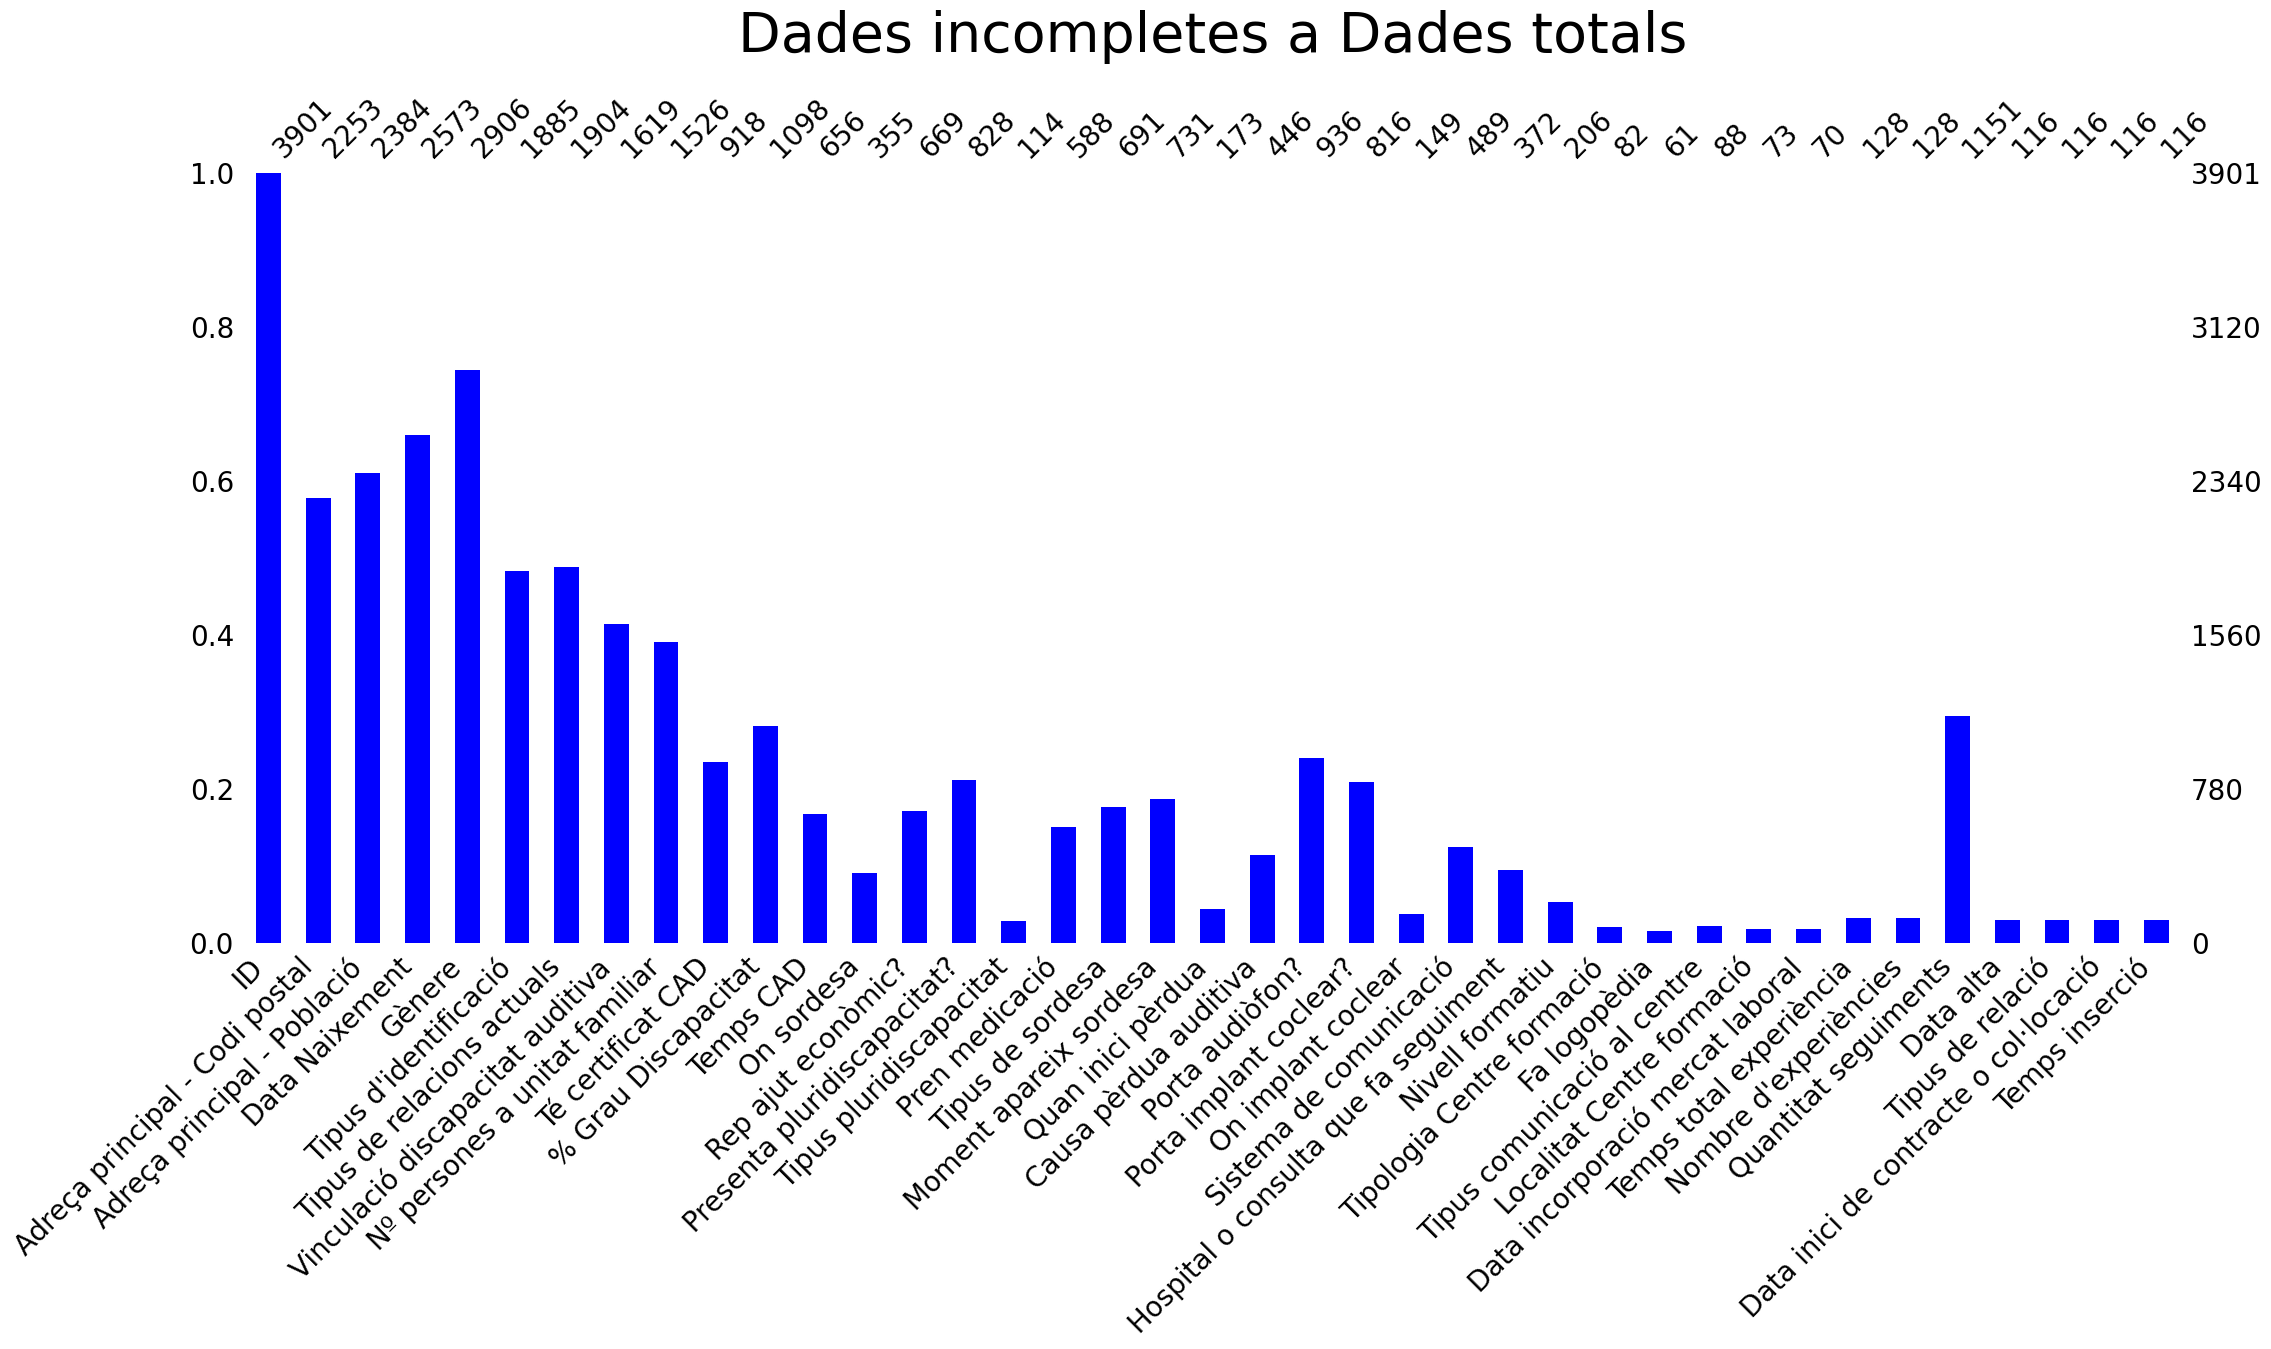

In [122]:
#detectem el nombre de dades inclompletes
import missingno as msno
import matplotlib.pyplot as plt
# Visualize the number of missing values as a bar chart
plt.title('Dades incompletes a Dades totals',fontsize=40, pad=30)
msno.bar(df, color='b',fontsize=20)

Tal com hem analitzat anteriorment hi ha una gran varietat de tipologia de persones recollides en la base de dades de l'entitat, la qual cosa prova que quan unim totes les persones hi hagi moltes dades no recollides ja que no són pertinents al tipus d'usuari. Per exemple es recullen les dades de persones d'empreses amb qui es treballa o familiars d'usuaris on la recollida de dades és molt limitada

In [123]:
#df a csv
df.to_csv('dades_totals.csv', index=False)

Per tal de fer la predicció del temps que triga una persona a trobar feina crearem una base de dades on només hi hagi les persones que han trobat feina

In [124]:
#creem un df amb les files on hi ha dades a la columna Temps inserció
df_ins = df.dropna(subset=['Temps inserció'])


<Axes: title={'center': "Dades incompletes a Dades totals amb temps d'inserció"}>

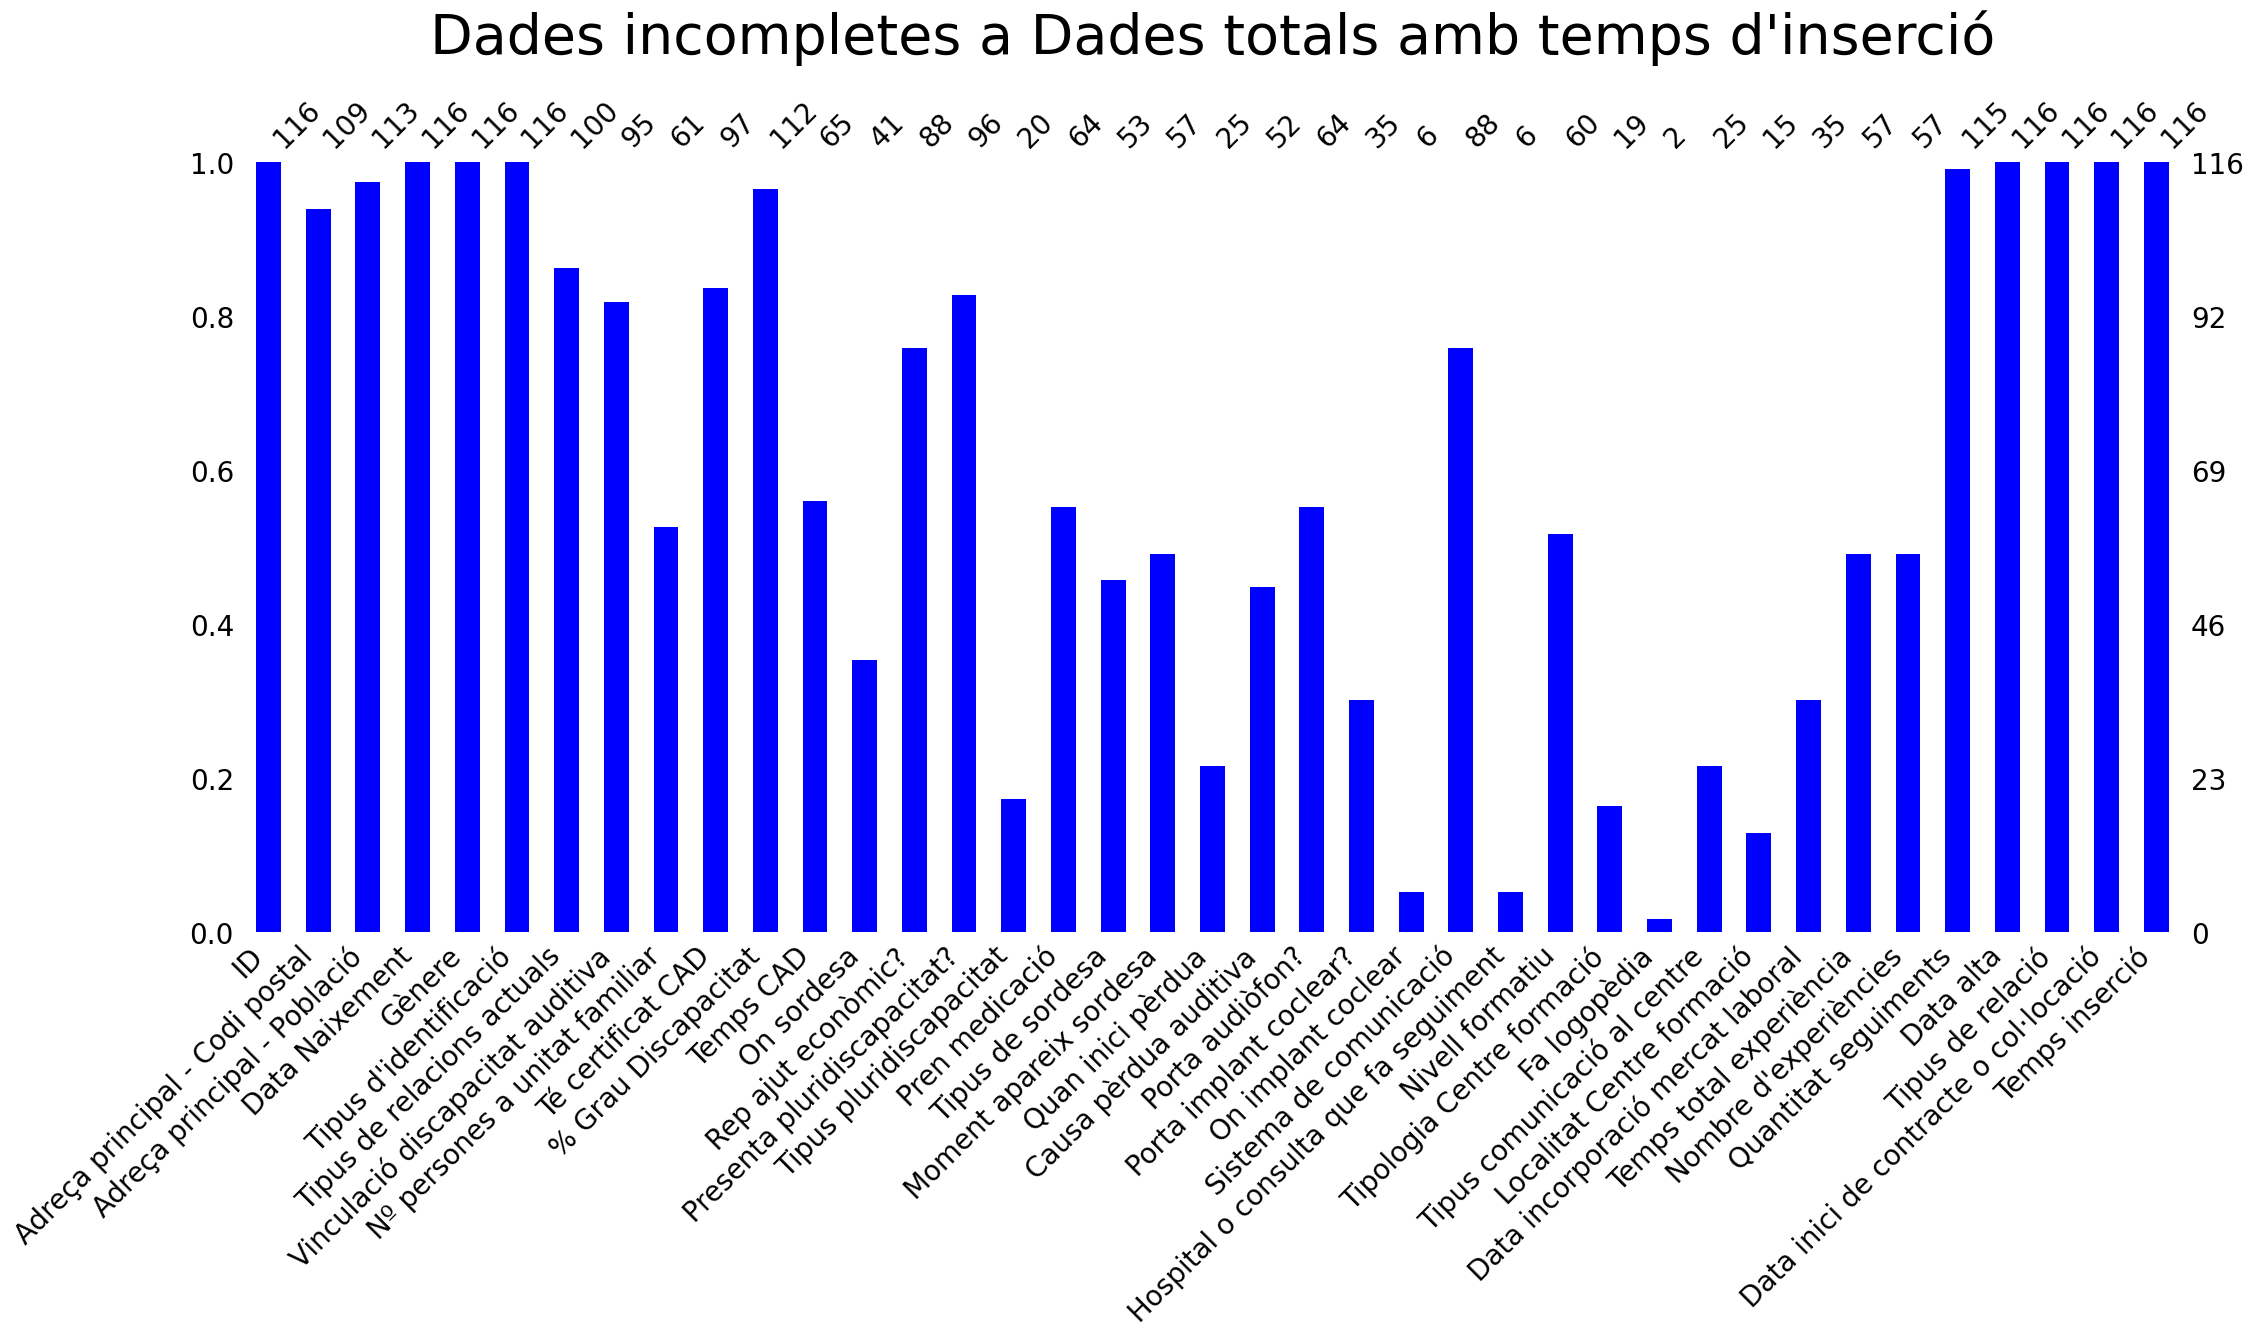

In [125]:
#detectem el nombre de dades inclompletes
import missingno as msno
import matplotlib.pyplot as plt
# Visualize the number of missing values as a bar chart
plt.title("Dades incompletes a Dades totals amb temps d'inserció",fontsize=40, pad=30)
msno.bar(df_ins, color='b',fontsize=20)

En aquest cas la falta de daddes és més significativa, ja que totes les persones que han trobat feina haurien de tenir més dades recollides

<Axes: >

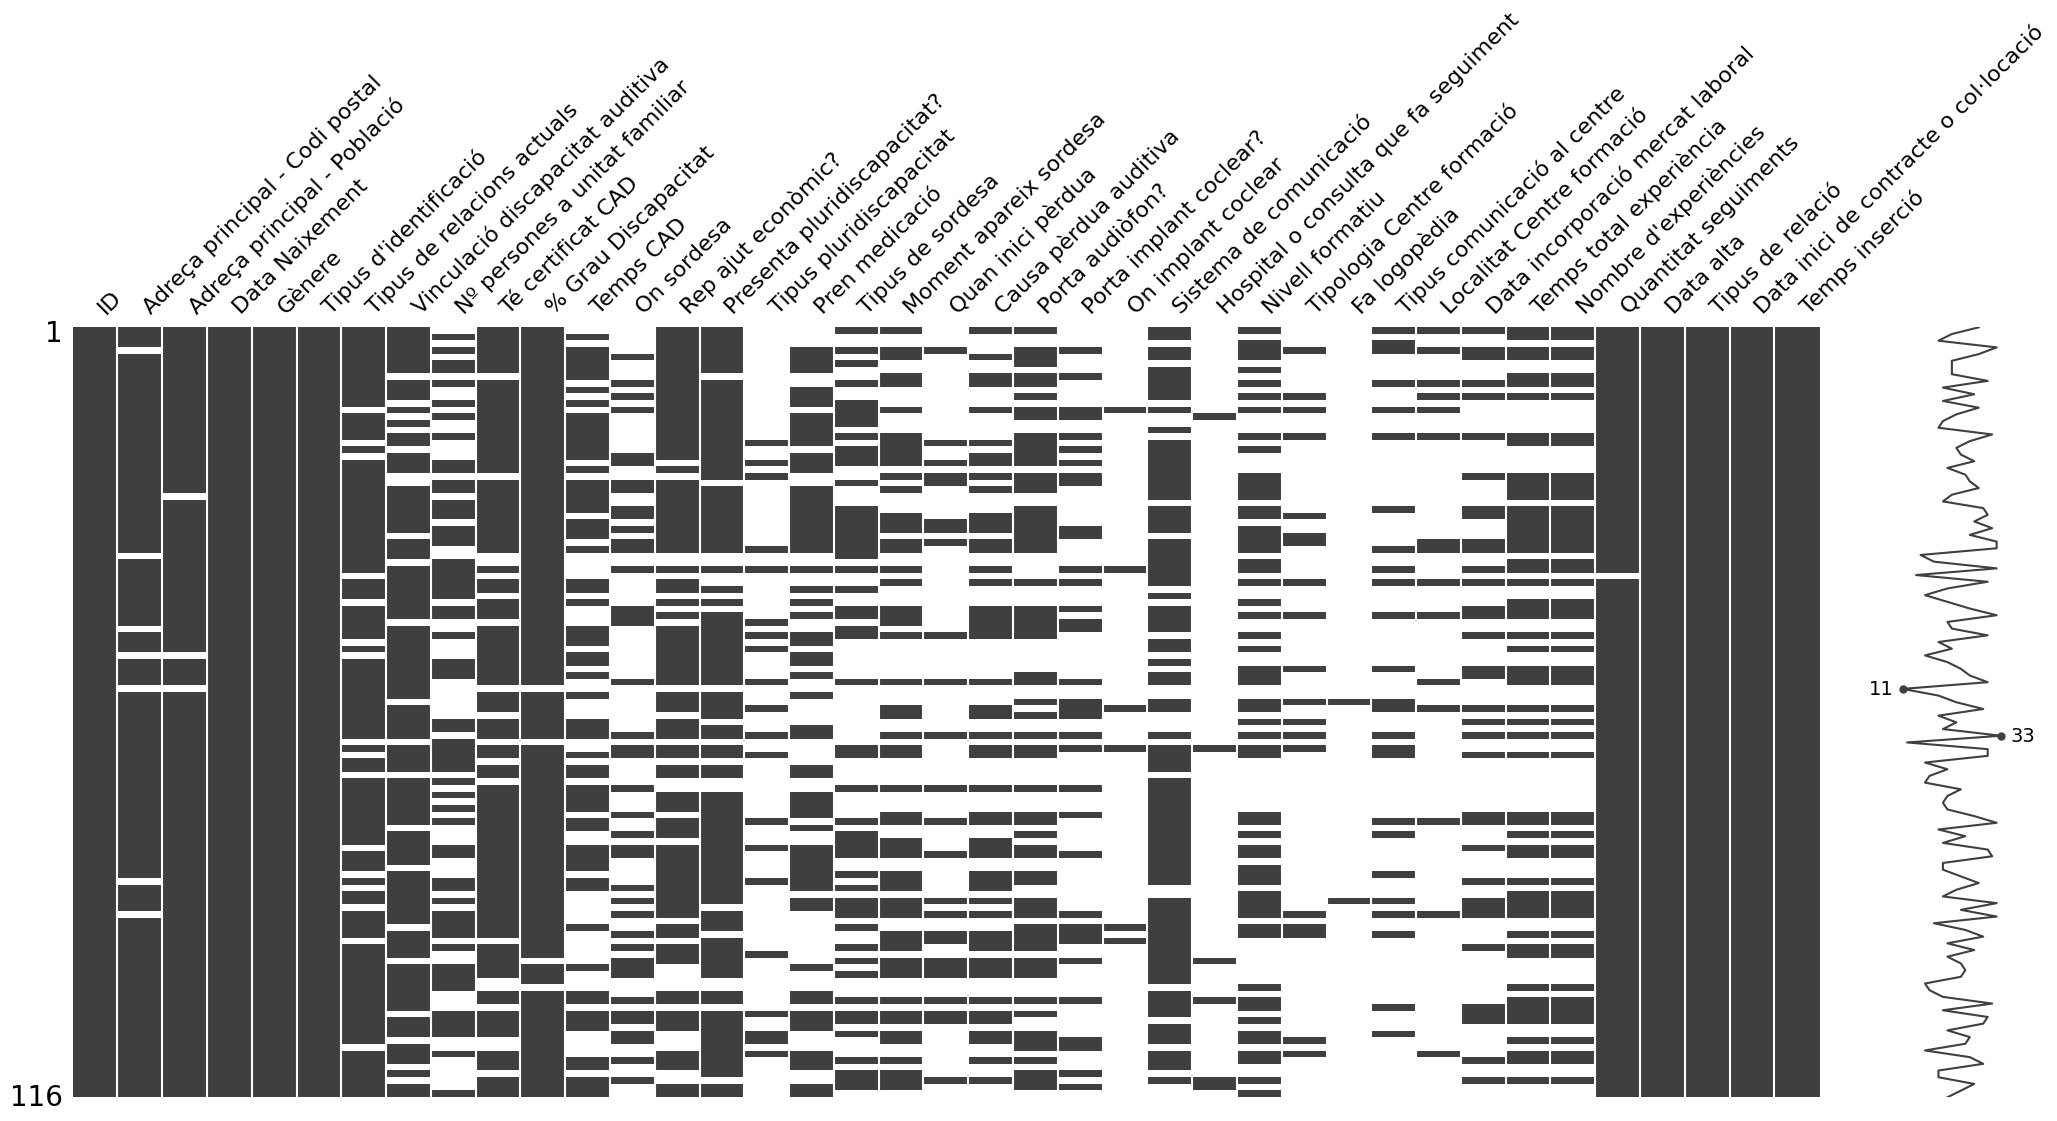

In [126]:
msno.matrix(df_ins)

Podem veure que la falta de dades en molts casos està situada en les mateixes entrades, per la qual cosa podem detectar que per una banda hi ha certes columnes on hi ha poques dades recollides i que també hi ha entrades on hi ha força falta d'inormació

In [127]:
#df_ins a csv
df_ins.to_csv('df_ins.csv', index=False)

Hem treballat amb models regressius per a fer una predicció de quan trigarà a trobar feina una persona a partir de les dades presents al csv df_ins. Per tant el target serà "Temps inserció".

També hem graficat la correlació de les característiques amb la previsió per tal de donar més informació al client envers quins factors poden tenir més influència en el temps que triga la persona a trobar feina

In [128]:
import pandas as pd

In [129]:
df=pd.read_csv('df_ins.csv')
df.head()

ID  Adreça principal - Codi postal  \
0  10031d51-3654-6bdd-ad97-5f69f0cdf888                          8172.0   
1  1156db83-09ae-9a70-c181-5bb4a0c04248                          8030.0   
2  130f8822-368d-f3d8-f843-5da710debfb2                         17857.0   
3  14d55c40-355c-dd4c-4459-5e0dc50e2155                             NaN   
4  159c61e1-06cd-5db8-70c7-5d8b435a33b9                          8820.0   

              Adreça principal - Població Data Naixement   Gènere  \
0                   SANT CUGAT DEL VALLES     03/03/1979   Femení   
1                               Barcelona     13/12/1985  Masculí   
2  Sant Joan de les Fonts (La Canya) OLOT     21/02/1985   Femení   
3                               Barcelona     22/10/1997  Masculí   
4                    EL PRAT DE LLOBREGAT     15/07/1965  Masculí   

  Tipus d'identificació                         Tipus de relacions actuals  \
0                   NIF                                   Participant SAES   
1                   NIF                                   Participant SAES   
2                   NIF  Persones Usuàries,Persones Sòcies Individuals,...   
3                   NIF  Persones Usuàries,Persones Sòcies Individuals,...   
4                   NIF                 Persones Usuàries,Participant SAES   

  Vinculació discapacitat auditiva  Nº persones a unitat familiar  \
0                       Afectat/da                            NaN   
1                       Afectat/da                            3.0   
2                       Afectat/da                            NaN   
3                       Afectat/da                            4.0   
4                       Afectat/da                            NaN   

  Té certificat CAD  ...  Tipus comunicació al centre  \
0                Sí  ...                         Oral   
1                Sí  ...                          NaN   
2                Sí  ...                         Oral   
3                Sí  ...                         Oral   
4                Sí  ...                          NaN   

  Localitat Centre formació Data incorporació mercat laboral  \
0     SANT CUGAT DEL VALLÈS                       2018-01-02   
1                       NaN                              NaN   
2                       NaN                              NaN   
3                 Barcelona                       2019-06-01   
4                       NaN                       1999-07-05   

  Temps total experiència Nombre d'experiències Quantitat seguiments  \
0                   365.0                   2.0                 20.0   
1                     0.0                   4.0                 77.0   
2                     NaN                   NaN                110.0   
3                   183.0                   1.0                 29.0   
4                  3185.0                   4.0                 51.0   

    Data alta             Tipus de relació  \
0  2021-12-14             Participant SAES   
1  2022-06-09             Participant SAES   
2  2021-09-01  Participant Grups de Suport   
3  2021-12-13             Participant SAES   
4  2019-09-10            Persones Usuàries   

  Data inici de contracte o col·locació Temps inserció  
0                            2022-02-14        62 days  
1                            2022-10-18       131 days  
2                            2022-03-28       208 days  
3                            2022-05-02       140 days  
4                            2019-12-16        97 days  

[5 rows x 39 columns]

Analitzem quines són les variables amb informació rellevant per a crear el model

In [130]:
#escollim les columnes amb informació interessant
df=df[['ID','Data Naixement','Gènere',"Tipus d'identificació",'Tipus de relacions actuals','Vinculació discapacitat auditiva','Nº persones a unitat familiar','Té certificat CAD',"% Grau Discapacitat",'Temps CAD','On sordesa','Rep ajut econòmic?','Presenta pluridiscapacitat?','Tipus pluridiscapacitat','Pren medicació','Tipus de sordesa','Moment apareix sordesa','Causa pèrdua auditiva','Porta audiòfon?','Porta implant coclear?','On implant coclear','Sistema de comunicació','Nivell formatiu','Data incorporació mercat laboral','Temps total experiència',"Nombre d'experiències",'Quantitat seguiments','Data inici de contracte o col·locació','Data alta','Temps inserció']]
df.head()

ID Data Naixement   Gènere  \
0  10031d51-3654-6bdd-ad97-5f69f0cdf888     03/03/1979   Femení   
1  1156db83-09ae-9a70-c181-5bb4a0c04248     13/12/1985  Masculí   
2  130f8822-368d-f3d8-f843-5da710debfb2     21/02/1985   Femení   
3  14d55c40-355c-dd4c-4459-5e0dc50e2155     22/10/1997  Masculí   
4  159c61e1-06cd-5db8-70c7-5d8b435a33b9     15/07/1965  Masculí   

  Tipus d'identificació                         Tipus de relacions actuals  \
0                   NIF                                   Participant SAES   
1                   NIF                                   Participant SAES   
2                   NIF  Persones Usuàries,Persones Sòcies Individuals,...   
3                   NIF  Persones Usuàries,Persones Sòcies Individuals,...   
4                   NIF                 Persones Usuàries,Participant SAES   

  Vinculació discapacitat auditiva  Nº persones a unitat familiar  \
0                       Afectat/da                            NaN   
1                       Afectat/da                            3.0   
2                       Afectat/da                            NaN   
3                       Afectat/da                            4.0   
4                       Afectat/da                            NaN   

  Té certificat CAD  % Grau Discapacitat  Temps CAD  ... On implant coclear  \
0                Sí                 33.0        NaN  ...                NaN   
1                Sí                 34.0  Permanent  ...                NaN   
2                Sí                 43.0        NaN  ...                NaN   
3                Sí                 53.0  Permanent  ...                NaN   
4                Sí                 45.0  Permanent  ...                NaN   

  Sistema de comunicació            Nivell formatiu  \
0                   Oral  Educació Primària (i EGB)   
1                Bimodal                        NaN   
2                    NaN                Universitat   
3                   Oral                Universitat   
4                   Oral  Educació Primària (i EGB)   

  Data incorporació mercat laboral Temps total experiència  \
0                       2018-01-02                   365.0   
1                              NaN                     0.0   
2                              NaN                     NaN   
3                       2019-06-01                   183.0   
4                       1999-07-05                  3185.0   

  Nombre d'experiències Quantitat seguiments  \
0                   2.0                 20.0   
1                   4.0                 77.0   
2                   NaN                110.0   
3                   1.0                 29.0   
4                   4.0                 51.0   

  Data inici de contracte o col·locació   Data alta Temps inserció  
0                            2022-02-14  2021-12-14        62 days  
1                            2022-10-18  2022-06-09       131 days  
2                            2022-03-28  2021-09-01       208 days  
3                            2022-05-02  2021-12-13       140 days  
4                            2019-12-16  2019-09-10        97 days  

[5 rows x 30 columns]

Canviem el tipus de dades de les variables per a poder treballar amb elles

In [131]:
#pasar dates a datetimes
df['Data incorporació mercat laboral'] = pd.to_datetime(df['Data incorporació mercat laboral'])
df['Data inici de contracte o col·locació'] = pd.to_datetime(df['Data inici de contracte o col·locació'])
df['Data alta'] = pd.to_datetime(df['Data alta'])


df.head()

ID Data Naixement   Gènere  \
0  10031d51-3654-6bdd-ad97-5f69f0cdf888     03/03/1979   Femení   
1  1156db83-09ae-9a70-c181-5bb4a0c04248     13/12/1985  Masculí   
2  130f8822-368d-f3d8-f843-5da710debfb2     21/02/1985   Femení   
3  14d55c40-355c-dd4c-4459-5e0dc50e2155     22/10/1997  Masculí   
4  159c61e1-06cd-5db8-70c7-5d8b435a33b9     15/07/1965  Masculí   

  Tipus d'identificació                         Tipus de relacions actuals  \
0                   NIF                                   Participant SAES   
1                   NIF                                   Participant SAES   
2                   NIF  Persones Usuàries,Persones Sòcies Individuals,...   
3                   NIF  Persones Usuàries,Persones Sòcies Individuals,...   
4                   NIF                 Persones Usuàries,Participant SAES   

  Vinculació discapacitat auditiva  Nº persones a unitat familiar  \
0                       Afectat/da                            NaN   
1                       Afectat/da                            3.0   
2                       Afectat/da                            NaN   
3                       Afectat/da                            4.0   
4                       Afectat/da                            NaN   

  Té certificat CAD  % Grau Discapacitat  Temps CAD  ... On implant coclear  \
0                Sí                 33.0        NaN  ...                NaN   
1                Sí                 34.0  Permanent  ...                NaN   
2                Sí                 43.0        NaN  ...                NaN   
3                Sí                 53.0  Permanent  ...                NaN   
4                Sí                 45.0  Permanent  ...                NaN   

  Sistema de comunicació            Nivell formatiu  \
0                   Oral  Educació Primària (i EGB)   
1                Bimodal                        NaN   
2                    NaN                Universitat   
3                   Oral                Universitat   
4                   Oral  Educació Primària (i EGB)   

  Data incorporació mercat laboral Temps total experiència  \
0                       2018-01-02                   365.0   
1                              NaT                     0.0   
2                              NaT                     NaN   
3                       2019-06-01                   183.0   
4                       1999-07-05                  3185.0   

  Nombre d'experiències Quantitat seguiments  \
0                   2.0                 20.0   
1                   4.0                 77.0   
2                   NaN                110.0   
3                   1.0                 29.0   
4                   4.0                 51.0   

  Data inici de contracte o col·locació  Data alta Temps inserció  
0                            2022-02-14 2021-12-14        62 days  
1                            2022-10-18 2022-06-09       131 days  
2                            2022-03-28 2021-09-01       208 days  
3                            2022-05-02 2021-12-13       140 days  
4                            2019-12-16 2019-09-10        97 days  

[5 rows x 30 columns]

Creem la variable edat, ja que ens dóna més informació que la data de naixement

In [132]:
import numpy as np
import pandas as pd

# Convertim la columna Data Naixement to datetime using dayfirst argument
df['Data Naixement'] = pd.to_datetime(df['Data Naixement'], dayfirst=True)

# Calculem l'edat i l'afegim al df
fecha_actual = pd.to_datetime('today')
df['Edat'] = ((fecha_actual - df['Data Naixement']) / np.timedelta64(1, 'Y')).astype(int)

# Eliminem la columna Data Naixement
df = df.drop('Data Naixement', axis=1)

df.head()


ID   Gènere Tipus d'identificació  \
0  10031d51-3654-6bdd-ad97-5f69f0cdf888   Femení                   NIF   
1  1156db83-09ae-9a70-c181-5bb4a0c04248  Masculí                   NIF   
2  130f8822-368d-f3d8-f843-5da710debfb2   Femení                   NIF   
3  14d55c40-355c-dd4c-4459-5e0dc50e2155  Masculí                   NIF   
4  159c61e1-06cd-5db8-70c7-5d8b435a33b9  Masculí                   NIF   

                          Tipus de relacions actuals  \
0                                   Participant SAES   
1                                   Participant SAES   
2  Persones Usuàries,Persones Sòcies Individuals,...   
3  Persones Usuàries,Persones Sòcies Individuals,...   
4                 Persones Usuàries,Participant SAES   

  Vinculació discapacitat auditiva  Nº persones a unitat familiar  \
0                       Afectat/da                            NaN   
1                       Afectat/da                            3.0   
2                       Afectat/da                            NaN   
3                       Afectat/da                            4.0   
4                       Afectat/da                            NaN   

  Té certificat CAD  % Grau Discapacitat  Temps CAD     On sordesa  ...  \
0                Sí                 33.0        NaN            NaN  ...   
1                Sí                 34.0  Permanent            NaN  ...   
2                Sí                 43.0        NaN            NaN  ...   
3                Sí                 53.0  Permanent            NaN  ...   
4                Sí                 45.0  Permanent  Unilateral OD  ...   

  Sistema de comunicació            Nivell formatiu  \
0                   Oral  Educació Primària (i EGB)   
1                Bimodal                        NaN   
2                    NaN                Universitat   
3                   Oral                Universitat   
4                   Oral  Educació Primària (i EGB)   

  Data incorporació mercat laboral Temps total experiència  \
0                       2018-01-02                   365.0   
1                              NaT                     0.0   
2                              NaT                     NaN   
3                       2019-06-01                   183.0   
4                       1999-07-05                  3185.0   

  Nombre d'experiències Quantitat seguiments  \
0                   2.0                 20.0   
1                   4.0                 77.0   
2                   NaN                110.0   
3                   1.0                 29.0   
4                   4.0                 51.0   

  Data inici de contracte o col·locació  Data alta Temps inserció Edat  
0                            2022-02-14 2021-12-14        62 days   44  
1                            2022-10-18 2022-06-09       131 days   37  
2                            2022-03-28 2021-09-01       208 days   38  
3                            2022-05-02 2021-12-13       140 days   25  
4                            2019-12-16 2019-09-10        97 days   58  

[5 rows x 30 columns]

Creem la variable edat en què es va incorporar al mercat laboral, ja que ens dóna més informació que la data de incorporació sense cap més context

In [133]:
#Convertir nans a Data incorporació mercat laboral a 0
df['Data incorporació mercat laboral'] = df['Data incorporació mercat laboral'].fillna(0)

# Convertim la columna Data Naixement a datetime
df['Data incorporació mercat laboral'] = pd.to_datetime(df['Data incorporació mercat laboral'])

# Calculem l'edat i l'afegim al df
fecha_actual = pd.to_datetime('today')
df['Edat incorporació al mercat laboral'] = ((fecha_actual - df['Data incorporació mercat laboral']) / np.timedelta64(1, 'Y')).astype(int)

# Eliminem la columna Data Naixement
df = df.drop('Data incorporació mercat laboral', axis=1)
df.head()

ID   Gènere Tipus d'identificació  \
0  10031d51-3654-6bdd-ad97-5f69f0cdf888   Femení                   NIF   
1  1156db83-09ae-9a70-c181-5bb4a0c04248  Masculí                   NIF   
2  130f8822-368d-f3d8-f843-5da710debfb2   Femení                   NIF   
3  14d55c40-355c-dd4c-4459-5e0dc50e2155  Masculí                   NIF   
4  159c61e1-06cd-5db8-70c7-5d8b435a33b9  Masculí                   NIF   

                          Tipus de relacions actuals  \
0                                   Participant SAES   
1                                   Participant SAES   
2  Persones Usuàries,Persones Sòcies Individuals,...   
3  Persones Usuàries,Persones Sòcies Individuals,...   
4                 Persones Usuàries,Participant SAES   

  Vinculació discapacitat auditiva  Nº persones a unitat familiar  \
0                       Afectat/da                            NaN   
1                       Afectat/da                            3.0   
2                       Afectat/da                            NaN   
3                       Afectat/da                            4.0   
4                       Afectat/da                            NaN   

  Té certificat CAD  % Grau Discapacitat  Temps CAD     On sordesa  ...  \
0                Sí                 33.0        NaN            NaN  ...   
1                Sí                 34.0  Permanent            NaN  ...   
2                Sí                 43.0        NaN            NaN  ...   
3                Sí                 53.0  Permanent            NaN  ...   
4                Sí                 45.0  Permanent  Unilateral OD  ...   

  Sistema de comunicació            Nivell formatiu Temps total experiència  \
0                   Oral  Educació Primària (i EGB)                   365.0   
1                Bimodal                        NaN                     0.0   
2                    NaN                Universitat                     NaN   
3                   Oral                Universitat                   183.0   
4                   Oral  Educació Primària (i EGB)                  3185.0   

  Nombre d'experiències Quantitat seguiments  \
0                   2.0                 20.0   
1                   4.0                 77.0   
2                   NaN                110.0   
3                   1.0                 29.0   
4                   4.0                 51.0   

  Data inici de contracte o col·locació  Data alta Temps inserció Edat  \
0                            2022-02-14 2021-12-14        62 days   44   
1                            2022-10-18 2022-06-09       131 days   37   
2                            2022-03-28 2021-09-01       208 days   38   
3                            2022-05-02 2021-12-13       140 days   25   
4                            2019-12-16 2019-09-10        97 days   58   

  Edat incorporació al mercat laboral  
0                                   5  
1                                  53  
2                                  53  
3                                   4  
4                                  24  

[5 rows x 30 columns]

In [134]:
df.dtypes

ID                                               object
Gènere                                           object
Tipus d'identificació                            object
Tipus de relacions actuals                       object
Vinculació discapacitat auditiva                 object
Nº persones a unitat familiar                   float64
Té certificat CAD                                object
% Grau Discapacitat                             float64
Temps CAD                                        object
On sordesa                                       object
Rep ajut econòmic?                               object
Presenta pluridiscapacitat?                      object
Tipus pluridiscapacitat                          object
Pren medicació                                   object
Tipus de sordesa                                 object
Moment apareix sordesa                           object
Causa pèrdua auditiva                            object
Porta audiòfon?                                 

In [135]:
#dummies
dummy_cols = ['Gènere', "Tipus d'identificació", 'Tipus de relacions actuals','Vinculació discapacitat auditiva','Temps CAD',
'On sordesa','Tipus pluridiscapacitat','Tipus de sordesa','Moment apareix sordesa','Causa pèrdua auditiva','On implant coclear','Sistema de comunicació','Nivell formatiu']
df = pd.get_dummies(df, columns=dummy_cols)
df.head()

ID  Nº persones a unitat familiar  \
0  10031d51-3654-6bdd-ad97-5f69f0cdf888                            NaN   
1  1156db83-09ae-9a70-c181-5bb4a0c04248                            3.0   
2  130f8822-368d-f3d8-f843-5da710debfb2                            NaN   
3  14d55c40-355c-dd4c-4459-5e0dc50e2155                            4.0   
4  159c61e1-06cd-5db8-70c7-5d8b435a33b9                            NaN   

  Té certificat CAD  % Grau Discapacitat Rep ajut econòmic?  \
0                Sí                 33.0                 No   
1                Sí                 34.0                 No   
2                Sí                 43.0                 No   
3                Sí                 53.0                 Sí   
4                Sí                 45.0                 No   

  Presenta pluridiscapacitat? Pren medicació Porta audiòfon?  \
0                          No            NaN              Sí   
1                          No            NaN             NaN   
2                          No            NaN             NaN   
3                          Sí             Sí              No   
4                          Sí             Sí              Sí   

  Porta implant coclear?  Temps total experiència  ...  \
0                    NaN                    365.0  ...   
1                    NaN                      0.0  ...   
2                    NaN                      NaN  ...   
3                     Sí                    183.0  ...   
4                    NaN                   3185.0  ...   

   Sistema de comunicació_Bimodal  Sistema de comunicació_Oral  \
0                           False                         True   
1                            True                        False   
2                           False                        False   
3                           False                         True   
4                           False                         True   

  Sistema de comunicació_Signes Nivell formatiu_Altra formació reglada  \
0                         False                                  False   
1                         False                                  False   
2                         False                                  False   
3                         False                                  False   
4                         False                                  False   

  Nivell formatiu_Batxillerat (i COU)  \
0                               False   
1                               False   
2                               False   
3                               False   
4                               False   

   Nivell formatiu_Educació Primària (i EGB)  \
0                                       True   
1                                      False   
2                                      False   
3                                      False   
4                                       True   

   Nivell formatiu_Educació Secundària  Nivell formatiu_Formació Professional  \
0                                False                                  False   
1                                False                                  False   
2                                False                                  False   
3                                False                                  False   
4                                False                                  False   

   Nivell formatiu_Formació no reglada  Nivell formatiu_Universitat  
0                                False                        False  
1                                False                        False  
2                                False                         True  
3                                False                         True  
4                                False                        False  

[5 rows x 88 columns]

In [136]:
#passem columnes a int y passem a 0 els nans
df[['Nº persones a unitat familiar', '% Grau Discapacitat', "Nombre d'experiències",'Quantitat seguiments']] = df[['Nº persones a unitat familiar', '% Grau Discapacitat', "Nombre d'experiències",'Quantitat seguiments']].fillna(0).astype(int)
df.head()

ID  Nº persones a unitat familiar  \
0  10031d51-3654-6bdd-ad97-5f69f0cdf888                              0   
1  1156db83-09ae-9a70-c181-5bb4a0c04248                              3   
2  130f8822-368d-f3d8-f843-5da710debfb2                              0   
3  14d55c40-355c-dd4c-4459-5e0dc50e2155                              4   
4  159c61e1-06cd-5db8-70c7-5d8b435a33b9                              0   

  Té certificat CAD  % Grau Discapacitat Rep ajut econòmic?  \
0                Sí                   33                 No   
1                Sí                   34                 No   
2                Sí                   43                 No   
3                Sí                   53                 Sí   
4                Sí                   45                 No   

  Presenta pluridiscapacitat? Pren medicació Porta audiòfon?  \
0                          No            NaN              Sí   
1                          No            NaN             NaN   
2                          No            NaN             NaN   
3                          Sí             Sí              No   
4                          Sí             Sí              Sí   

  Porta implant coclear?  Temps total experiència  ...  \
0                    NaN                    365.0  ...   
1                    NaN                      0.0  ...   
2                    NaN                      NaN  ...   
3                     Sí                    183.0  ...   
4                    NaN                   3185.0  ...   

   Sistema de comunicació_Bimodal  Sistema de comunicació_Oral  \
0                           False                         True   
1                            True                        False   
2                           False                        False   
3                           False                         True   
4                           False                         True   

  Sistema de comunicació_Signes Nivell formatiu_Altra formació reglada  \
0                         False                                  False   
1                         False                                  False   
2                         False                                  False   
3                         False                                  False   
4                         False                                  False   

  Nivell formatiu_Batxillerat (i COU)  \
0                               False   
1                               False   
2                               False   
3                               False   
4                               False   

   Nivell formatiu_Educació Primària (i EGB)  \
0                                       True   
1                                      False   
2                                      False   
3                                      False   
4                                       True   

   Nivell formatiu_Educació Secundària  Nivell formatiu_Formació Professional  \
0                                False                                  False   
1                                False                                  False   
2                                False                                  False   
3                                False                                  False   
4                                False                                  False   

   Nivell formatiu_Formació no reglada  Nivell formatiu_Universitat  
0                                False                        False  
1                                False                        False  
2                                False                         True  
3                                False                         True  
4                                False                        False  

[5 rows x 88 columns]

In [137]:
#passem a 0 i 1 les diferents columnes
#passem a 0 els nans entenent que són dades que la persona tècnica no ha introduït ja que el seu valor és 0
df[['Té certificat CAD', 'Rep ajut econòmic?', 'Presenta pluridiscapacitat?', 'Pren medicació', 'Porta audiòfon?', 'Porta implant coclear?']] = df[['Té certificat CAD', 'Rep ajut econòmic?', 'Presenta pluridiscapacitat?', 'Pren medicació', 'Porta audiòfon?', 'Porta implant coclear?']].replace({'Sí': 1, 'No': 0}).astype(float)

df[['Té certificat CAD', 'Rep ajut econòmic?', 'Presenta pluridiscapacitat?', 'Pren medicació', 'Porta audiòfon?', 'Porta implant coclear?']] = df[['Té certificat CAD', 'Rep ajut econòmic?', 'Presenta pluridiscapacitat?', 'Pren medicació', 'Porta audiòfon?', 'Porta implant coclear?']].fillna(0.0).astype(int)

df.head()


ID  Nº persones a unitat familiar  \
0  10031d51-3654-6bdd-ad97-5f69f0cdf888                              0   
1  1156db83-09ae-9a70-c181-5bb4a0c04248                              3   
2  130f8822-368d-f3d8-f843-5da710debfb2                              0   
3  14d55c40-355c-dd4c-4459-5e0dc50e2155                              4   
4  159c61e1-06cd-5db8-70c7-5d8b435a33b9                              0   

   Té certificat CAD  % Grau Discapacitat  Rep ajut econòmic?  \
0                  1                   33                   0   
1                  1                   34                   0   
2                  1                   43                   0   
3                  1                   53                   1   
4                  1                   45                   0   

   Presenta pluridiscapacitat?  Pren medicació  Porta audiòfon?  \
0                            0               0                1   
1                            0               0                0   
2                            0               0                0   
3                            1               1                0   
4                            1               1                1   

   Porta implant coclear?  Temps total experiència  ...  \
0                       0                    365.0  ...   
1                       0                      0.0  ...   
2                       0                      NaN  ...   
3                       1                    183.0  ...   
4                       0                   3185.0  ...   

   Sistema de comunicació_Bimodal  Sistema de comunicació_Oral  \
0                           False                         True   
1                            True                        False   
2                           False                        False   
3                           False                         True   
4                           False                         True   

  Sistema de comunicació_Signes Nivell formatiu_Altra formació reglada  \
0                         False                                  False   
1                         False                                  False   
2                         False                                  False   
3                         False                                  False   
4                         False                                  False   

  Nivell formatiu_Batxillerat (i COU)  \
0                               False   
1                               False   
2                               False   
3                               False   
4                               False   

   Nivell formatiu_Educació Primària (i EGB)  \
0                                       True   
1                                      False   
2                                      False   
3                                      False   
4                                       True   

   Nivell formatiu_Educació Secundària  Nivell formatiu_Formació Professional  \
0                                False                                  False   
1                                False                                  False   
2                                False                                  False   
3                                False                                  False   
4                                False                                  False   

   Nivell formatiu_Formació no reglada  Nivell formatiu_Universitat  
0                                False                        False  
1                                False                        False  
2                                False                         True  
3                                False                         True  
4                                False                        False  

[5 rows x 88 columns]

In [138]:
#passem Temps inserció a Timedelta
df['Temps inserció'] = pd.to_timedelta(df['Temps inserció'])


In [139]:
#eliminem valors de més de 500 dies a temps d'inserció  ja que valorem que la persona pot haver trobat feina, però no ho ha comunicat
df=df.loc[df['Temps inserció'] < pd.Timedelta(days=500)]

df.head()

ID  Nº persones a unitat familiar  \
0  10031d51-3654-6bdd-ad97-5f69f0cdf888                              0   
1  1156db83-09ae-9a70-c181-5bb4a0c04248                              3   
2  130f8822-368d-f3d8-f843-5da710debfb2                              0   
3  14d55c40-355c-dd4c-4459-5e0dc50e2155                              4   
4  159c61e1-06cd-5db8-70c7-5d8b435a33b9                              0   

   Té certificat CAD  % Grau Discapacitat  Rep ajut econòmic?  \
0                  1                   33                   0   
1                  1                   34                   0   
2                  1                   43                   0   
3                  1                   53                   1   
4                  1                   45                   0   

   Presenta pluridiscapacitat?  Pren medicació  Porta audiòfon?  \
0                            0               0                1   
1                            0               0                0   
2                            0               0                0   
3                            1               1                0   
4                            1               1                1   

   Porta implant coclear?  Temps total experiència  ...  \
0                       0                    365.0  ...   
1                       0                      0.0  ...   
2                       0                      NaN  ...   
3                       1                    183.0  ...   
4                       0                   3185.0  ...   

   Sistema de comunicació_Bimodal  Sistema de comunicació_Oral  \
0                           False                         True   
1                            True                        False   
2                           False                        False   
3                           False                         True   
4                           False                         True   

  Sistema de comunicació_Signes Nivell formatiu_Altra formació reglada  \
0                         False                                  False   
1                         False                                  False   
2                         False                                  False   
3                         False                                  False   
4                         False                                  False   

  Nivell formatiu_Batxillerat (i COU)  \
0                               False   
1                               False   
2                               False   
3                               False   
4                               False   

   Nivell formatiu_Educació Primària (i EGB)  \
0                                       True   
1                                      False   
2                                      False   
3                                      False   
4                                       True   

   Nivell formatiu_Educació Secundària  Nivell formatiu_Formació Professional  \
0                                False                                  False   
1                                False                                  False   
2                                False                                  False   
3                                False                                  False   
4                                False                                  False   

   Nivell formatiu_Formació no reglada  Nivell formatiu_Universitat  
0                                False                        False  
1                                False                        False  
2                                False                         True  
3                                False                         True  
4                                False                        False  

[5 rows x 88 columns]

In [140]:
#observem la quantitat de dades que ens quedem per a fer la predicció
df.shape

(81, 88)

# Machine Learning

In [141]:
#pasar nans a 0 a la columna Temps total experiència
df[['Temps total experiència']] = df[['Temps total experiència']].fillna(0)

In [142]:
#columnes a normalitzar
df_p= df[['Temps total experiència',"Nombre d'experiències",'Quantitat seguiments','Edat','% Grau Discapacitat']]

<Figure size 640x480 with 0 Axes>

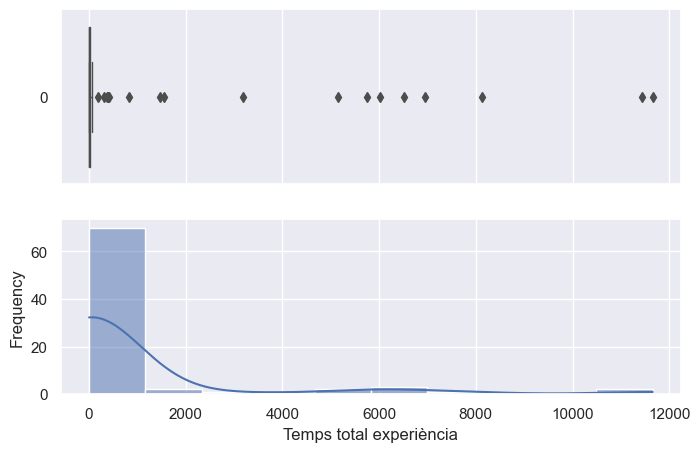

<Figure size 800x500 with 0 Axes>

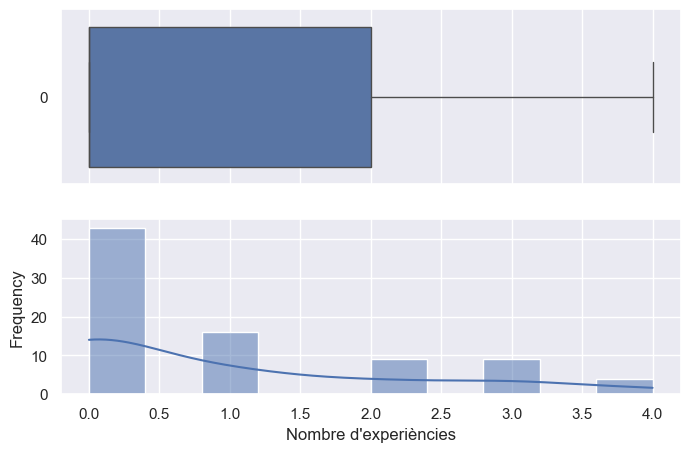

<Figure size 800x500 with 0 Axes>

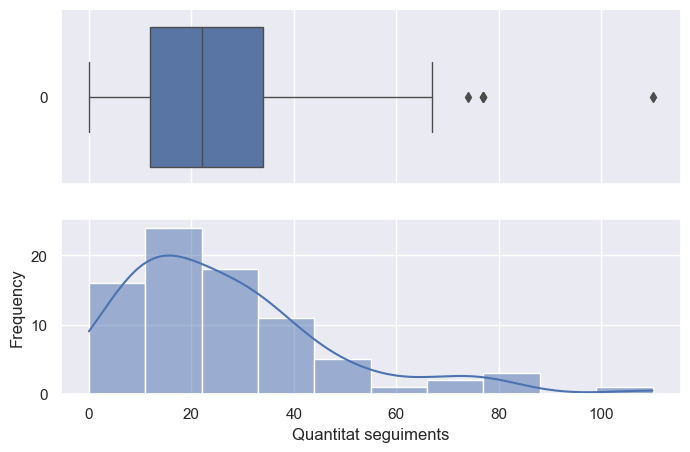

<Figure size 800x500 with 0 Axes>

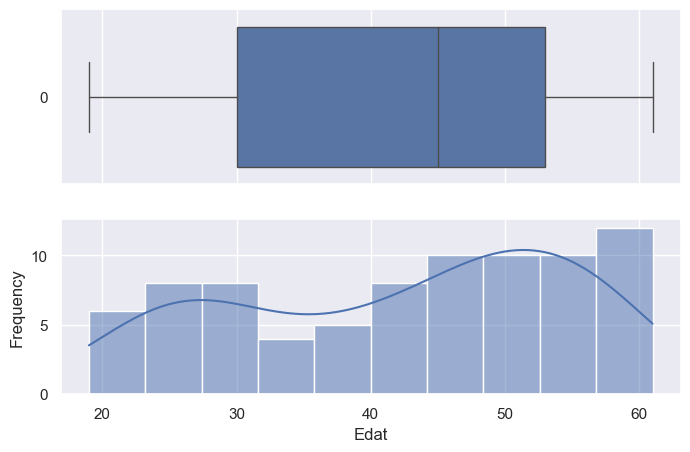

<Figure size 800x500 with 0 Axes>

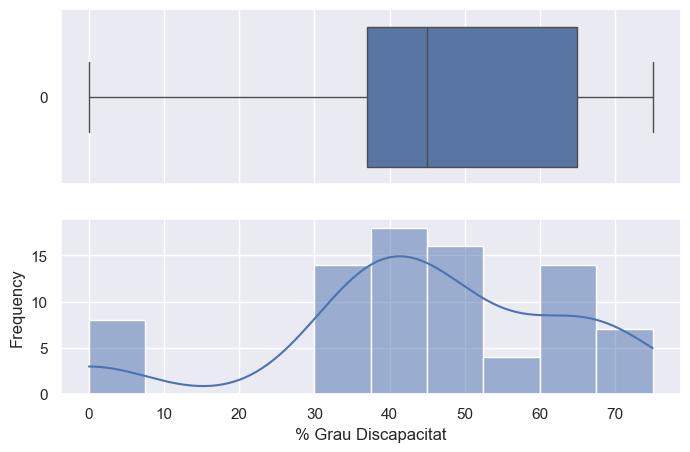

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
for i in df_p.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i],  ax=ax_box , linewidth= 1.0, orient='h')
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

In [144]:
from scipy import stats


print('Hipotesis nula Ho -> La mostra té una distribució normal')
print('Hipotesis alternativa H1 -> La mostra no té una distribució normal\n\n')

for i in df_p.columns:
    shapiro_test = stats.shapiro(df_p[i])
    print('Per la variable ', i, "con un p-value de ", shapiro_test.pvalue)
    if shapiro_test.pvalue>0.05:
        print('No podem refutar la hipòtesis nula\n')
    else:
        print("Podem refutar la hipòtesis nula\n")

Hipotesis nula Ho -> La mostra té una distribució normal
Hipotesis alternativa H1 -> La mostra no té una distribució normal


Per la variable  Temps total experiència con un p-value de  2.3825602144209057e-16
Podem refutar la hipòtesis nula

Per la variable  Nombre d'experiències con un p-value de  2.937995680074579e-10
Podem refutar la hipòtesis nula

Per la variable  Quantitat seguiments con un p-value de  7.059986160129483e-07
Podem refutar la hipòtesis nula

Per la variable  Edat con un p-value de  0.00017303759523201734
Podem refutar la hipòtesis nula

Per la variable  % Grau Discapacitat con un p-value de  5.327259259502171e-06
Podem refutar la hipòtesis nula



In [145]:
from sklearn import preprocessing 
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

columnsRobust = ["Nombre d'experiències",'Quantitat seguiments','Temps total experiència']
scaler = preprocessing.RobustScaler().fit(df[columnsRobust])
df[columnsRobust] = scaler.transform(df[columnsRobust])
columnsMinMax = ["Edat",'% Grau Discapacitat']
scaler = preprocessing.MinMaxScaler().fit(df[columnsMinMax])
df[columnsMinMax] = scaler.transform(df[columnsMinMax])


In [146]:
#convertim ID a index
df.set_index('ID', inplace=True)

In [147]:
df.dtypes

Nº persones a unitat familiar                  int64
Té certificat CAD                              int64
% Grau Discapacitat                          float64
Rep ajut econòmic?                             int64
Presenta pluridiscapacitat?                    int64
                                              ...   
Nivell formatiu_Educació Primària (i EGB)       bool
Nivell formatiu_Educació Secundària             bool
Nivell formatiu_Formació Professional           bool
Nivell formatiu_Formació no reglada             bool
Nivell formatiu_Universitat                     bool
Length: 87, dtype: object

In [148]:
df.head()

Nº persones a unitat familiar  \
ID                                                                    
10031d51-3654-6bdd-ad97-5f69f0cdf888                              0   
1156db83-09ae-9a70-c181-5bb4a0c04248                              3   
130f8822-368d-f3d8-f843-5da710debfb2                              0   
14d55c40-355c-dd4c-4459-5e0dc50e2155                              4   
159c61e1-06cd-5db8-70c7-5d8b435a33b9                              0   

                                      Té certificat CAD  % Grau Discapacitat  \
ID                                                                             
10031d51-3654-6bdd-ad97-5f69f0cdf888                  1             0.440000   
1156db83-09ae-9a70-c181-5bb4a0c04248                  1             0.453333   
130f8822-368d-f3d8-f843-5da710debfb2                  1             0.573333   
14d55c40-355c-dd4c-4459-5e0dc50e2155                  1             0.706667   
159c61e1-06cd-5db8-70c7-5d8b435a33b9                  1             0.600000   

                                      Rep ajut econòmic?  \
ID                                                         
10031d51-3654-6bdd-ad97-5f69f0cdf888                   0   
1156db83-09ae-9a70-c181-5bb4a0c04248                   0   
130f8822-368d-f3d8-f843-5da710debfb2                   0   
14d55c40-355c-dd4c-4459-5e0dc50e2155                   1   
159c61e1-06cd-5db8-70c7-5d8b435a33b9                   0   

                                      Presenta pluridiscapacitat?  \
ID                                                                  
10031d51-3654-6bdd-ad97-5f69f0cdf888                            0   
1156db83-09ae-9a70-c181-5bb4a0c04248                            0   
130f8822-368d-f3d8-f843-5da710debfb2                            0   
14d55c40-355c-dd4c-4459-5e0dc50e2155                            1   
159c61e1-06cd-5db8-70c7-5d8b435a33b9                            1   

                                      Pren medicació  Porta audiòfon?  \
ID                                                                      
10031d51-3654-6bdd-ad97-5f69f0cdf888               0                1   
1156db83-09ae-9a70-c181-5bb4a0c04248               0                0   
130f8822-368d-f3d8-f843-5da710debfb2               0                0   
14d55c40-355c-dd4c-4459-5e0dc50e2155               1                0   
159c61e1-06cd-5db8-70c7-5d8b435a33b9               1                1   

                                      Porta implant coclear?  \
ID                                                             
10031d51-3654-6bdd-ad97-5f69f0cdf888                       0   
1156db83-09ae-9a70-c181-5bb4a0c04248                       0   
130f8822-368d-f3d8-f843-5da710debfb2                       0   
14d55c40-355c-dd4c-4459-5e0dc50e2155                       1   
159c61e1-06cd-5db8-70c7-5d8b435a33b9                       0   

                                      Temps total experiència  \
ID                                                              
10031d51-3654-6bdd-ad97-5f69f0cdf888                12.586207   
1156db83-09ae-9a70-c181-5bb4a0c04248                 0.000000   
130f8822-368d-f3d8-f843-5da710debfb2                 0.000000   
14d55c40-355c-dd4c-4459-5e0dc50e2155                 6.310345   
159c61e1-06cd-5db8-70c7-5d8b435a33b9               109.827586   

                                      Nombre d'experiències  ...  \
ID                                                           ...   
10031d51-3654-6bdd-ad97-5f69f0cdf888                    1.0  ...   
1156db83-09ae-9a70-c181-5bb4a0c04248                    2.0  ...   
130f8822-368d-f3d8-f843-5da710debfb2                    0.0  ...   
14d55c40-355c-dd4c-4459-5e0dc50e2155                    0.5  ...   
159c61e1-06cd-5db8-70c7-5d8b435a33b9                    2.0  ...   

                                      Sistema de comunicació_Bimodal  \
ID                                                                     
10031d51-3654-6bdd-ad97-5f69f0cdf888

In [149]:
import pandas as pd

# Suponiendo que df es tu DataFrame
columnas_datetime = df.select_dtypes(include=['datetime64']).columns

print(columnas_datetime)


Index(['Data inici de contracte o col·locació', 'Data alta'], dtype='object')


In [150]:
#eliminar columnas 'Data inici de contracte o col·locació' i 'Data alta' i 'Adreça principal - Codi postal'
df = df.drop(['Data inici de contracte o col·locació', 'Data alta'], axis=1)
df.head()
         

Nº persones a unitat familiar  \
ID                                                                    
10031d51-3654-6bdd-ad97-5f69f0cdf888                              0   
1156db83-09ae-9a70-c181-5bb4a0c04248                              3   
130f8822-368d-f3d8-f843-5da710debfb2                              0   
14d55c40-355c-dd4c-4459-5e0dc50e2155                              4   
159c61e1-06cd-5db8-70c7-5d8b435a33b9                              0   

                                      Té certificat CAD  % Grau Discapacitat  \
ID                                                                             
10031d51-3654-6bdd-ad97-5f69f0cdf888                  1             0.440000   
1156db83-09ae-9a70-c181-5bb4a0c04248                  1             0.453333   
130f8822-368d-f3d8-f843-5da710debfb2                  1             0.573333   
14d55c40-355c-dd4c-4459-5e0dc50e2155                  1             0.706667   
159c61e1-06cd-5db8-70c7-5d8b435a33b9                  1             0.600000   

                                      Rep ajut econòmic?  \
ID                                                         
10031d51-3654-6bdd-ad97-5f69f0cdf888                   0   
1156db83-09ae-9a70-c181-5bb4a0c04248                   0   
130f8822-368d-f3d8-f843-5da710debfb2                   0   
14d55c40-355c-dd4c-4459-5e0dc50e2155                   1   
159c61e1-06cd-5db8-70c7-5d8b435a33b9                   0   

                                      Presenta pluridiscapacitat?  \
ID                                                                  
10031d51-3654-6bdd-ad97-5f69f0cdf888                            0   
1156db83-09ae-9a70-c181-5bb4a0c04248                            0   
130f8822-368d-f3d8-f843-5da710debfb2                            0   
14d55c40-355c-dd4c-4459-5e0dc50e2155                            1   
159c61e1-06cd-5db8-70c7-5d8b435a33b9                            1   

                                      Pren medicació  Porta audiòfon?  \
ID                                                                      
10031d51-3654-6bdd-ad97-5f69f0cdf888               0                1   
1156db83-09ae-9a70-c181-5bb4a0c04248               0                0   
130f8822-368d-f3d8-f843-5da710debfb2               0                0   
14d55c40-355c-dd4c-4459-5e0dc50e2155               1                0   
159c61e1-06cd-5db8-70c7-5d8b435a33b9               1                1   

                                      Porta implant coclear?  \
ID                                                             
10031d51-3654-6bdd-ad97-5f69f0cdf888                       0   
1156db83-09ae-9a70-c181-5bb4a0c04248                       0   
130f8822-368d-f3d8-f843-5da710debfb2                       0   
14d55c40-355c-dd4c-4459-5e0dc50e2155                       1   
159c61e1-06cd-5db8-70c7-5d8b435a33b9                       0   

                                      Temps total experiència  \
ID                                                              
10031d51-3654-6bdd-ad97-5f69f0cdf888                12.586207   
1156db83-09ae-9a70-c181-5bb4a0c04248                 0.000000   
130f8822-368d-f3d8-f843-5da710debfb2                 0.000000   
14d55c40-355c-dd4c-4459-5e0dc50e2155                 6.310345   
159c61e1-06cd-5db8-70c7-5d8b435a33b9               109.827586   

                                      Nombre d'experiències  ...  \
ID                                                           ...   
10031d51-3654-6bdd-ad97-5f69f0cdf888                    1.0  ...   
1156db83-09ae-9a70-c181-5bb4a0c04248                    2.0  ...   
130f8822-368d-f3d8-f843-5da710debfb2                    0.0  ...   
14d55c40-355c-dd4c-4459-5e0dc50e2155                    0.5  ...   
159c61e1-06cd-5db8-70c7-5d8b435a33b9                    2.0  ...   

                                      Sistema de comunicació_Bimodal  \
ID                                                                     
10031d51-3654-6bdd-ad97-5f69f0cdf888

In [151]:
#primera prova amb diferents models regressius
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# separem les variables independents i la depenent
X = df.drop("Temps inserció", axis=1)
y = df["Temps inserció"]

#passar Temps inserció a int
y = y / np.timedelta64(1, 'D')

# dividir el conjunt de dades en Train i Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# crear una llista de models
models = [
LinearRegression(),
Ridge(),
Lasso(),
ElasticNet(),
DecisionTreeRegressor(),
ExtraTreeRegressor(),
RandomForestRegressor(),
GradientBoostingRegressor(),
AdaBoostRegressor(),
SVR(kernel='linear'),
SVR(kernel='rbf'),
KNeighborsRegressor(),
MLPRegressor(),
GaussianProcessRegressor()
]

# entrenar i evaluar cada model de la llista
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(type(model).__name__)
    print("RMSE: ", mean_squared_error(y_test, y_pred, squared=False))
    print("MAE: ", mean_absolute_error(y_test, y_pred))
    print("R2: ", r2_score(y_test, y_pred))
    print()

LinearRegression
RMSE:  915.2699480665499
MAE:  799.9354648982861
R2:  -94.80929717318676

Ridge
RMSE:  169.64342891905991
MAE:  136.41641872938266
R2:  -2.2914202175352587

Lasso
RMSE:  173.38298744841538
MAE:  142.2192495054186
R2:  -2.4381293501761654

ElasticNet
RMSE:  127.6799064917284
MAE:  110.04443452727422
R2:  -0.8644655370776086

DecisionTreeRegressor
RMSE:  215.71295029060477
MAE:  183.92307692307693
R2:  -4.321838434833217

ExtraTreeRegressor
RMSE:  173.5396208362805
MAE:  125.84615384615384
R2:  -2.4443441363768637

RandomForestRegressor
RMSE:  151.40887480339705
MAE:  126.3076923076923
R2:  -1.6218745764615914

GradientBoostingRegressor
RMSE:  158.3538494663603
MAE:  129.67505365674162
R2:  -1.8679164747864427

AdaBoostRegressor
RMSE:  152.11310969677888
MAE:  128.46704917996126
R2:  -1.6463210905916097

SVR
RMSE:  115.1937594536923
MAE:  97.6449500536702
R2:  -0.5176343667298486

SVR
RMSE:  106.09333244755337
MAE:  93.18738210585903
R2:  -0.2873167805266241

KNeighborsR

In [152]:
#fem crossvalidation amb els millors resultats
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# crear un diccionario para almacenar los resultados de cada modelo
results_dict = {'Model': [], 'RMSE': [], 'MAE': [], 'R2': []}

# separem les variables independents i la depenent
X = df.drop("Temps inserció", axis=1)
y = df["Temps inserció"]

#passar Temps inserció a int
y = y / np.timedelta64(1, 'D')

# dividir el conjunt de dades en Train i Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# crear una llista de models
models = [ElasticNet(), RandomForestRegressor(), AdaBoostRegressor(),
          SVR(kernel='linear'), SVR(kernel='rbf'), KNeighborsRegressor()]

# entrenar i evaluar cada model de la llista
for model in models:
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    mae_scores = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(type(model).__name__)
    print("RMSE (5-fold CV): ", rmse_scores.mean())
    print("MAE (5-fold CV): ", mae_scores.mean())
    print("R2 (5-fold CV): ", r2_scores.mean())
    print()

    # agregar los resultados del modelo al diccionario
    results_dict['Model'].append(type(model).__name__)
    results_dict['RMSE'].append(rmse_scores.mean())
    results_dict['MAE'].append(mae_scores.mean())
    results_dict['R2'].append(r2_scores.mean())



# crear un DataFrame a partir del diccionario
results_df = pd.DataFrame(results_dict)

ElasticNet
RMSE (5-fold CV):  128.1037911704625
MAE (5-fold CV):  108.67485188830202
R2 (5-fold CV):  -0.22742881698161374

RandomForestRegressor
RMSE (5-fold CV):  144.56937710116398
MAE (5-fold CV):  121.19680147058823
R2 (5-fold CV):  -0.5566610489244159

AdaBoostRegressor
RMSE (5-fold CV):  142.5364722316624
MAE (5-fold CV):  122.24465501603807
R2 (5-fold CV):  -0.5703334624231914

SVR
RMSE (5-fold CV):  128.89316776717925
MAE (5-fold CV):  107.52487801803974
R2 (5-fold CV):  -0.23455943173931693

SVR
RMSE (5-fold CV):  124.87343049250148
MAE (5-fold CV):  103.62779172932908
R2 (5-fold CV):  -0.1588673263777965

KNeighborsRegressor
RMSE (5-fold CV):  140.19956651129286
MAE (5-fold CV):  117.09132352941177
R2 (5-fold CV):  -0.4863103941764054



In [153]:
results_df

Model        RMSE         MAE        R2
0             ElasticNet  128.103791  108.674852 -0.227429
1  RandomForestRegressor  144.569377  121.196801 -0.556661
2      AdaBoostRegressor  142.536472  122.244655 -0.570333
3                    SVR  128.893168  107.524878 -0.234559
4                    SVR  124.873430  103.627792 -0.158867
5    KNeighborsRegressor  140.199567  117.091324 -0.486310

A partir dels resultats podem extreure que el model que s'adapta millor és SVR amb un marge d'error de 101 dies.
Cal donar una importància relativa a les dades, ja que disposem de poques dades, per la qual cosa aquest correlació tindrà variacions importants a partir de l'entrada de noves dades.

In [154]:
#fem un llistat amb la correlació entre característiques i target
corr_matrix = X_train.corrwith(y_train).sort_values(ascending=False)

In [155]:
#creem un df amb tots els valors absoluts majors a 0.20
df_corr = pd.DataFrame(corr_matrix)
df_corr = df_corr.reset_index()
df_corr = df_corr.rename(columns={0: 'Valor'})
df_corr = df_corr.rename(columns={'index': 'Factor'})
df_corr.dropna()
df_corr_np = df_corr[(df_corr['Valor'] > 0.14) | (df_corr['Valor'] < -0.14)]
df_corr_np

Factor     Valor
0                                Quantitat seguiments  0.304742
1   Tipus de relacions actuals_Persones Sòcies Ind...  0.283680
2                                       Gènere_Femení  0.193359
3   Tipus de relacions actuals_Persones Usuàries,P...  0.192356
4                     Causa pèrdua auditiva_Adquirida  0.173007
5                      Tipus pluridiscapacitat_Altres  0.172954
6                           Tipus d'identificació_NIF  0.164330
7   Tipus de relacions actuals_Participant Xarxa d...  0.161639
8                                 % Grau Discapacitat  0.148415
58                             Tipus de sordesa_Mixta -0.144154
59  Tipus de relacions actuals_Persones Usuàries,P... -0.149117
60                  Causa pèrdua auditiva_Desconeguda -0.150879
61  Tipus de relacions actuals_Persones Sòcies Fam... -0.152095
62                             Porta implant coclear? -0.156788
63                     Causa pèrdua auditiva_Genètica -0.163603
64                          Tipus d'identificació_NIE -0.164330
65  Tipus de relacions actuals_Participant Xarxa d... -0.167921
66             Nivell formatiu_Altra formació reglada -0.179889
67  Tipus de relacions actuals_Persones Sòcies Ind... -0.179889
68                                     Gènere_Masculí -0.193359
69                Nivell formatiu_Batxillerat (i COU) -0.195988
70                      On implant coclear_Oïda Dreta -0.201708
71                Moment apareix sordesa_Postlocutiva -0.339201

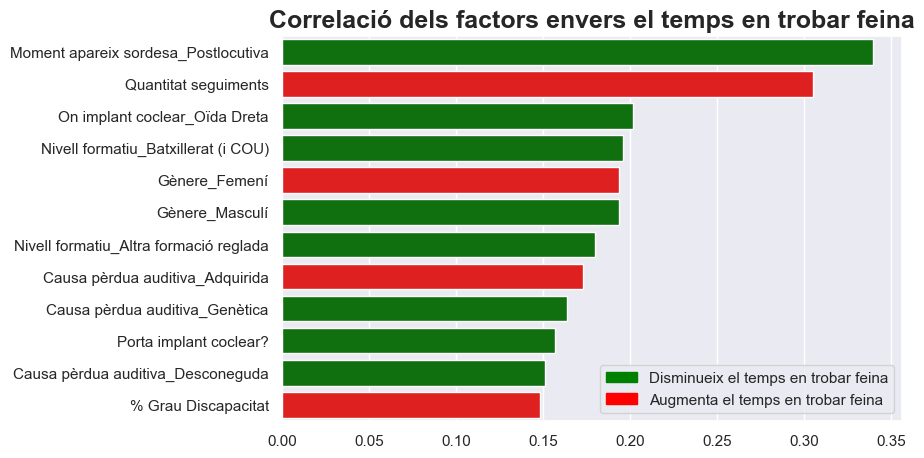

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


# Ordenar el dataframe por el valor absoluto de la columna 'Valor' 
# sin modificar los valores originales en el dataframe
df_corr_np_sorted = df_corr_np.reindex(df_corr_np['Valor'].abs().sort_values(ascending=False).index)

# Filtrar y eliminar las filas donde 'Factor' comienza con 'Tipus'
df_corr_np_sorted = df_corr_np_sorted[~df_corr_np_sorted['Factor'].str.startswith('Tipus')]

# Crear la paleta de colores basada en los valores originales del dataframe ordenado
palette = ["green" if x < 0 else "red" for x in df_corr_np_sorted['Valor']]

# Convertir la columna 'Valor' del dataframe ordenado a su valor absoluto
df_corr_np_sorted['Valor'] = df_corr_np_sorted['Valor'].abs()

# Crear gráfico de barras horizontales
plt.title('Correlació dels factors envers el temps en trobar feina', fontsize=18,loc='center', fontweight='bold')
ax = sns.barplot(x='Valor', y='Factor', data=df_corr_np_sorted, palette=palette)

# Quitar el nombre de 'Valor' y 'Factor' de la leyenda
ax.set_xlabel('')
ax.set_ylabel('')

# Añadir leyenda personalizada
legend_handles = [mpatches.Patch(color='green', label='Disminueix el temps en trobar feina'),
                  mpatches.Patch(color='red', label='Augmenta el temps en trobar feina')]
plt.legend(handles=legend_handles, loc='best', )

plt.show()


Com podem veure que el fet que la persona es comuniqui oralment i que tingui una formació universitària seran dos dels factors més importants per a que el temps per a trobar feina sigui menor.
Per altra banda la formació professional i que la persona tingui NIF seran factors que propiciaran un augment en el temps a trobar feina.
Cal donar una importància relativa a les dades, ja que disposem de poques dades, per la qual cosa aquest correlació tindrà variacions importants a partir de l'entrada de noves dades.